## 1. Installation

In [1]:
%%capture
import os, re

if "COLAB_" not in "".join(os.environ.keys()):
    !pip install unsloth
else:
    # Do this only in Colab notebooks! Otherwise use pip install unsloth
    import torch; v = re.match(r"[0-9]{1,}\.[0-9]{1,}", str(torch.__version__)).group(0)
    xformers = "xformers==" + ("0.0.33.post1" if v=="2.9" else "0.0.32.post2" if v=="2.8" else "0.0.29.post3")
    !pip install --no-deps bitsandbytes accelerate {xformers} peft trl triton cut_cross_entropy unsloth_zoo
    !pip install sentencepiece protobuf "datasets==4.3.0" "huggingface_hub>=0.34.0" hf_transfer
    !pip install --no-deps unsloth
!pip install transformers==4.56.2
!pip install --no-deps trl==0.22.2
!pip install jiwer einops addict easydict
!pip uninstall -y tensorflow protobuf
!pip install -q tensorflow protobuf 

## 2. Environment Setup (Colab / Kaggle)

In [2]:
# Mount Google Drive only for Colab
IS_KAGGLE = "KAGGLE_KERNEL_RUN_TYPE" in os.environ

if not IS_KAGGLE:
    print("\n📁 Mounting Google Drive...")
    from google.colab import drive
    drive.mount('/content/drive')
    print("✅ Google Drive mounted!")
else:
    print("\n📁 Using Kaggle environment settings")
    print("✅ Kaggle input/output paths will be used")


📁 Using Kaggle environment settings
✅ Kaggle input/output paths will be used


## 3. Choose Model to Evaluate

Select which model to evaluate:
- **Baseline**: Pretrained DeepSeek OCR (before finetuning)
- **Finetuned**: LoRA finetuned model

In [3]:
# ⚠️ SELECT MODEL TO EVALUATE
# Set to 'baseline' or 'finetuned'
MODEL_TYPE = 'baseline'  # Change this to 'baseline' to evaluate pretrained model

print(f"\n🎯 Selected model: {MODEL_TYPE.upper()}")


🎯 Selected model: BASELINE


In [4]:
from unsloth import FastVisionModel
import torch
from transformers import AutoModel
from huggingface_hub import snapshot_download

os.environ["UNSLOTH_WARN_UNINITIALIZED"] = '0'

# Download baseline model
snapshot_download("unsloth/DeepSeek-OCR", local_dir="deepseek_ocr")
MODEL_PATH = "./deepseek_ocr"
LORA_PATH = None
    
if MODEL_TYPE != 'baseline':  # finetuned
    print("\n📦 Loading finetuned model...")
    # Setup model path based on environment
    if not IS_KAGGLE:
        # ⚠️ UPDATE THIS PATH TO YOUR FINETUNED MODEL ON GOOGLE DRIVE
        LORA_PATH = '/content/drive/MyDrive/deepseek_ocr_lora'
        print(f"📦 Colab: Loading adapter from: {LORA_PATH}")
    else:
        # ⚠️ UPDATE 'your-model-folder' to match your Kaggle input
        LORA_PATH = '/kaggle/input/deepseek-ocr-vi/gguf/default/1/deepseek_ocr_lora'  # Change this to your model path
        print(f"📦 Kaggle: Loading adapter from: {LORA_PATH}")
else:
    print("\n📦 Loading baseline (pretrained) model...")


# Load model
model, tokenizer = FastVisionModel.from_pretrained(
    model_name=MODEL_PATH,
    load_in_4bit=False,
    auto_model=AutoModel,
    trust_remote_code=True,
    unsloth_force_compile=True,
    use_gradient_checkpointing="unsloth",
)

if LORA_PATH:
    model.load_adapter(LORA_PATH)

FastVisionModel.for_inference(model)

print(f"✅ Model loaded successfully!")
print(f"✓ Evaluating: {MODEL_TYPE.upper()} model")

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


.gitattributes: 0.00B [00:00, ?B/s]

README-checkpoint.md: 0.00B [00:00, ?B/s]

LICENSE: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

assets/fig1.png:   0%|          | 0.00/396k [00:00<?, ?B/s]

assets/show1.jpg:   0%|          | 0.00/117k [00:00<?, ?B/s]

assets/show2.jpg:   0%|          | 0.00/216k [00:00<?, ?B/s]

assets/show3.jpg:   0%|          | 0.00/247k [00:00<?, ?B/s]

assets/show4.jpg:   0%|          | 0.00/269k [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

configuration_deepseek_v2.py: 0.00B [00:00, ?B/s]

conversation.py: 0.00B [00:00, ?B/s]

deepencoder.py: 0.00B [00:00, ?B/s]

model-00001-of-000001.safetensors:   0%|          | 0.00/6.67G [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

modeling_deepseekocr.py: 0.00B [00:00, ?B/s]

modeling_deepseekv2.py: 0.00B [00:00, ?B/s]

processor_config.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/801 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.



📦 Loading baseline (pretrained) model...
Unsloth: WARNING `trust_remote_code` is True.
Are you certain you want to do remote code execution?
==((====))==  Unsloth 2025.12.7: Fast Deepseekocr patching. Transformers: 4.56.2.
   \\   /|    Tesla T4. Num GPUs = 2. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.8.0+cu126. CUDA: 7.5. CUDA Toolkit: 12.6. Triton: 3.4.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.32.post2. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.
You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.


Unsloth: QLoRA and full finetuning all not selected. Switching to 16bit LoRA.


Some weights of DeepseekOCRForCausalLM were not initialized from the model checkpoint at ./deepseek_ocr and are newly initialized: ['model.vision_model.embeddings.position_ids']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Model loaded successfully!
✓ Evaluating: BASELINE model


## 4. Download and Extract Test Dataset

**Colab:** Update `ZIP_PATH` to your Google Drive location

**Kaggle:** Add dataset to notebook, it will be available at `/kaggle/input/`

In [5]:
import zipfile
import json
from PIL import Image
from tqdm import tqdm

# Setup paths based on environment
if not IS_KAGGLE:
    # ⚠️ UPDATE THIS PATH TO YOUR ZIP FILE ON GOOGLE DRIVE
    ZIP_PATH = '/content/drive/MyDrive/UIT_HWDB_word.zip'
    EXTRACT_DIR = '/content/UIT_HWDB_word'
    
    print(f"📦 Colab: Extracting dataset from: {ZIP_PATH}")
    print(f"📂 Extracting to: {EXTRACT_DIR}")
    
    # Extract zip file
    with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
        zip_ref.extractall('/content/')
    
    print(f"✅ Extraction complete!")
    
else:
    # Kaggle settings
    # ⚠️ UPDATE 'your-dataset-name' to match your Kaggle dataset
    KAGGLE_INPUT = '/kaggle/input/uit-hwdb-word/UIT_HWDB_word'  # Change this to your dataset name
    
    # Check if zip file exists in Kaggle input
    if os.path.exists(KAGGLE_INPUT):
        zip_files = [f for f in os.listdir(KAGGLE_INPUT) if f.endswith('.zip')]
        
        if zip_files:
            # Extract from zip
            ZIP_PATH = os.path.join(KAGGLE_INPUT, zip_files[0])
            EXTRACT_DIR = '/kaggle/working/UIT_HWDB_word'
            
            print(f"📦 Kaggle: Extracting dataset from: {ZIP_PATH}")
            print(f"📂 Extracting to: {EXTRACT_DIR}")
            
            with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
                zip_ref.extractall('/kaggle/working/')
            
            print(f"✅ Extraction complete!")
        else:
            # Assume dataset is already extracted in Kaggle input
            EXTRACT_DIR = KAGGLE_INPUT
            print(f"📂 Kaggle: Using dataset from: {EXTRACT_DIR}")
    else:
        # Fallback to local path
        EXTRACT_DIR = '../data/UIT_HWDB_word'
        print(f"📂 Local: Using dataset from: {EXTRACT_DIR}")

# Set test directory
TEST_DIR = os.path.join(EXTRACT_DIR, 'test_data')

print(f"\n✓ Test directory: {TEST_DIR}")
print(f"✓ Test exists: {os.path.exists(TEST_DIR)}")

📂 Kaggle: Using dataset from: /kaggle/input/uit-hwdb-word/UIT_HWDB_word

✓ Test directory: /kaggle/input/uit-hwdb-word/UIT_HWDB_word/test_data
✓ Test exists: True


## 5. Load Test Dataset

In [6]:
def load_test_dataset(base_dir):
    """
    Load test dataset with image paths and ground truth labels.
    Returns list of tuples: (image_path, ground_truth_text)
    """
    test_samples = []
    folders = sorted(
        [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))],
        key=lambda x: int(x)
    )

    for folder in tqdm(folders, desc=f"Loading {os.path.basename(base_dir)}"):
        label_path = os.path.join(base_dir, folder, 'label.json')
        if not os.path.exists(label_path):
            continue

        # Load labels
        with open(label_path, 'r', encoding='utf-8') as f:
            labels = json.load(f)

        # Process each image
        for img_name, label in labels.items():
            img_path = os.path.join(base_dir, folder, img_name)
            if not os.path.exists(img_path):
                continue

            test_samples.append({
                'image_path': img_path,
                'ground_truth': label.strip()
            })

    return test_samples

# Load test dataset
print("\n📥 Loading test data...")
test_dataset = load_test_dataset(TEST_DIR)
print(f"✅ Loaded {len(test_dataset):,} test samples")


📥 Loading test data...


Loading test_data: 100%|██████████| 6/6 [00:07<00:00,  1.23s/it]

✅ Loaded 2,881 test samples


## 6. Define CER Metric

Character Error Rate (CER) measures the edit distance between predicted and ground truth text at character level.

In [7]:
from jiwer import cer

def calculate_cer(predictions, references):
    """
    Calculate Character Error Rate (CER) for a list of predictions.
    
    Args:
        predictions: List of predicted texts
        references: List of ground truth texts
    
    Returns:
        float: Average CER score (0-1, lower is better)
    """
    return cer(references, predictions)

# Test the metric
test_pred = "xin chào"
test_ref = "xin chao"
print(f"Example CER: {calculate_cer([test_pred], [test_ref]):.4f}")
print(f"Perfect match CER: {calculate_cer(['test'], ['test']):.4f}")

Example CER: 0.1250
Perfect match CER: 0.0000


## 7. Run Inference on Test Set

This will run inference on all test samples. You can limit the number for faster testing.

In [8]:
import tempfile
from tqdm import tqdm

def run_inference(model, tokenizer, test_dataset, max_samples=None):
    """
    Run inference on test dataset.
    
    Args:
        model: Loaded model
        tokenizer: Model tokenizer
        test_dataset: List of test samples
        max_samples: Maximum number of samples to evaluate (None = all)
    
    Returns:
        predictions: List of predicted texts
        ground_truths: List of ground truth texts
    """
    predictions = []
    ground_truths = []
    
    # Limit samples if specified
    samples_to_process = test_dataset[:max_samples] if max_samples else test_dataset
    
    prompt = "<image>\nFree OCR. "
    
    for sample in tqdm(samples_to_process, desc="Running inference"):
        try:
            # Run inference
            result = model.infer(
                tokenizer,
                prompt=prompt,
                image_file=sample['image_path'],
                output_path='./output',
                base_size=384,
                image_size=384,
                crop_mode=False,
                save_results=False,
                test_compress=False,
                eval_mode=True
            )
            
            predictions.append(result.strip())
            ground_truths.append(sample['ground_truth'])
            
        except Exception as e:
            print(f"\n⚠️ Error processing {sample['image_path']}: {e}")
            # Add empty prediction to maintain alignment
            predictions.append("")
            ground_truths.append(sample['ground_truth'])
    
    return predictions, ground_truths

# Run inference on test set
print("\n🔄 Running inference on test set...")
predictions, ground_truths = run_inference(model, tokenizer, test_dataset)

print(f"\n✅ Completed inference on {len(predictions):,} samples")


🔄 Running inference on test set...


Running inference:   0%|          | 0/2881 [00:00<?, ?it/s]

directly resize


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Running inference:   0%|          | 1/2881 [00:09<7:41:47,  9.62s/it]

directly resize


Running inference:   0%|          | 2/2881 [00:10<3:39:45,  4.58s/it]

directly resize


Running inference:   0%|          | 3/2881 [00:11<2:10:31,  2.72s/it]

directly resize


Running inference:   0%|          | 4/2881 [00:11<1:29:18,  1.86s/it]

directly resize


Running inference:   0%|          | 5/2881 [00:12<1:04:50,  1.35s/it]

directly resize


Running inference:   0%|          | 6/2881 [00:12<50:06,  1.05s/it]  

directly resize


Running inference:   0%|          | 7/2881 [00:12<39:19,  1.22it/s]

directly resize


Running inference:   0%|          | 8/2881 [00:13<35:52,  1.33it/s]

directly resize


Running inference:   0%|          | 9/2881 [00:13<30:00,  1.60it/s]

directly resize


Running inference:   0%|          | 10/2881 [00:14<30:10,  1.59it/s]

directly resize


Running inference:   0%|          | 11/2881 [00:15<31:09,  1.53it/s]

directly resize


Running inference:   0%|          | 12/2881 [00:15<31:04,  1.54it/s]

directly resize


Running inference:   0%|          | 13/2881 [00:16<32:40,  1.46it/s]

directly resize


Running inference:   0%|          | 14/2881 [00:17<31:16,  1.53it/s]

directly resize


Running inference:   1%|          | 15/2881 [00:17<26:08,  1.83it/s]

directly resize


Running inference:   1%|          | 16/2881 [00:17<23:22,  2.04it/s]

directly resize


Running inference:   1%|          | 17/2881 [00:18<21:21,  2.24it/s]

directly resize


Running inference:   1%|          | 18/2881 [00:18<22:05,  2.16it/s]

directly resize


Running inference:   1%|          | 19/2881 [00:19<24:44,  1.93it/s]

directly resize


Running inference:   1%|          | 20/2881 [00:19<24:40,  1.93it/s]

directly resize


Running inference:   1%|          | 21/2881 [00:20<22:21,  2.13it/s]

directly resize


Running inference:   1%|          | 22/2881 [00:20<20:03,  2.38it/s]

directly resize


Running inference:   1%|          | 23/2881 [00:21<22:35,  2.11it/s]

directly resize


Running inference:   1%|          | 24/2881 [00:21<22:54,  2.08it/s]

directly resize


Running inference:   1%|          | 25/2881 [00:22<21:50,  2.18it/s]

directly resize


Running inference:   1%|          | 26/2881 [00:22<23:41,  2.01it/s]

directly resize


Running inference:   1%|          | 27/2881 [00:23<23:48,  2.00it/s]

directly resize


Running inference:   1%|          | 28/2881 [00:23<25:06,  1.89it/s]

directly resize


Running inference:   1%|          | 29/2881 [00:24<24:00,  1.98it/s]

directly resize


Running inference:   1%|          | 30/2881 [00:24<23:10,  2.05it/s]

directly resize


Running inference:   1%|          | 31/2881 [00:25<21:58,  2.16it/s]

directly resize


Running inference:   1%|          | 32/2881 [00:25<19:35,  2.42it/s]

directly resize


Running inference:   1%|          | 33/2881 [00:25<19:23,  2.45it/s]

directly resize


Running inference:   1%|          | 34/2881 [00:26<18:37,  2.55it/s]

directly resize


Running inference:   1%|          | 35/2881 [00:26<17:19,  2.74it/s]

directly resize


Running inference:   1%|          | 36/2881 [00:27<26:34,  1.78it/s]

directly resize


Running inference:   1%|▏         | 37/2881 [00:28<28:30,  1.66it/s]

directly resize


Running inference:   1%|▏         | 38/2881 [00:28<29:05,  1.63it/s]

directly resize


Running inference:   1%|▏         | 39/2881 [00:29<32:53,  1.44it/s]

directly resize


Running inference:   1%|▏         | 40/2881 [00:30<28:46,  1.65it/s]

directly resize


Running inference:   1%|▏         | 41/2881 [00:30<25:07,  1.88it/s]

directly resize


Running inference:   1%|▏         | 42/2881 [00:30<25:23,  1.86it/s]

directly resize


Running inference:   1%|▏         | 43/2881 [00:31<22:42,  2.08it/s]

directly resize


Running inference:   2%|▏         | 44/2881 [00:32<26:25,  1.79it/s]

directly resize


Running inference:   2%|▏         | 45/2881 [00:32<25:28,  1.86it/s]

directly resize


Running inference:   2%|▏         | 46/2881 [00:33<29:03,  1.63it/s]

directly resize


Running inference:   2%|▏         | 47/2881 [00:33<25:55,  1.82it/s]

directly resize


Running inference:   2%|▏         | 48/2881 [00:34<23:50,  1.98it/s]

directly resize


Running inference:   2%|▏         | 49/2881 [00:34<21:37,  2.18it/s]

directly resize


Running inference:   2%|▏         | 50/2881 [00:35<22:12,  2.12it/s]

directly resize


Running inference:   2%|▏         | 51/2881 [00:35<23:12,  2.03it/s]

directly resize


Running inference:   2%|▏         | 52/2881 [00:35<21:13,  2.22it/s]

directly resize


Running inference:   2%|▏         | 53/2881 [00:36<23:11,  2.03it/s]

directly resize


Running inference:   2%|▏         | 54/2881 [00:36<22:11,  2.12it/s]

directly resize


Running inference:   2%|▏         | 55/2881 [00:37<24:38,  1.91it/s]

directly resize


Running inference:   2%|▏         | 56/2881 [00:38<26:34,  1.77it/s]

directly resize


Running inference:   2%|▏         | 57/2881 [00:38<25:34,  1.84it/s]

directly resize


Running inference:   2%|▏         | 58/2881 [00:39<26:16,  1.79it/s]

directly resize


Running inference:   2%|▏         | 59/2881 [00:39<24:04,  1.95it/s]

directly resize


Running inference:   2%|▏         | 60/2881 [00:40<22:35,  2.08it/s]

directly resize


Running inference:   2%|▏         | 61/2881 [00:40<20:43,  2.27it/s]

directly resize


Running inference:   2%|▏         | 62/2881 [00:40<20:53,  2.25it/s]

directly resize


Running inference:   2%|▏         | 63/2881 [00:41<19:37,  2.39it/s]

directly resize


Running inference:   2%|▏         | 64/2881 [00:41<19:20,  2.43it/s]

directly resize


Running inference:   2%|▏         | 65/2881 [00:42<22:01,  2.13it/s]

directly resize


Running inference:   2%|▏         | 66/2881 [00:43<30:07,  1.56it/s]

directly resize


Running inference:   2%|▏         | 67/2881 [00:43<28:14,  1.66it/s]

directly resize


Running inference:   2%|▏         | 68/2881 [00:44<24:04,  1.95it/s]

directly resize


Running inference:   2%|▏         | 69/2881 [00:44<21:00,  2.23it/s]

directly resize


Running inference:   2%|▏         | 70/2881 [00:45<28:27,  1.65it/s]

directly resize


Running inference:   2%|▏         | 71/2881 [00:45<26:16,  1.78it/s]

directly resize


Running inference:   2%|▏         | 72/2881 [00:46<25:28,  1.84it/s]

directly resize


Running inference:   3%|▎         | 73/2881 [00:47<30:39,  1.53it/s]

directly resize


Running inference:   3%|▎         | 74/2881 [00:47<30:26,  1.54it/s]

directly resize


Running inference:   3%|▎         | 75/2881 [00:48<26:08,  1.79it/s]

directly resize


Running inference:   3%|▎         | 76/2881 [00:48<23:43,  1.97it/s]

directly resize


Running inference:   3%|▎         | 77/2881 [00:49<22:48,  2.05it/s]

directly resize


Running inference:   3%|▎         | 78/2881 [00:49<21:28,  2.18it/s]

directly resize


Running inference:   3%|▎         | 79/2881 [00:49<20:44,  2.25it/s]

directly resize


Running inference:   3%|▎         | 80/2881 [00:50<22:46,  2.05it/s]

directly resize


Running inference:   3%|▎         | 81/2881 [00:50<20:53,  2.23it/s]

directly resize


Running inference:   3%|▎         | 82/2881 [00:51<18:50,  2.48it/s]

directly resize


Running inference:   3%|▎         | 83/2881 [00:51<18:09,  2.57it/s]

directly resize


Running inference:   3%|▎         | 84/2881 [00:51<17:43,  2.63it/s]

directly resize


Running inference:   3%|▎         | 85/2881 [00:52<18:07,  2.57it/s]

directly resize


Running inference:   3%|▎         | 86/2881 [00:52<19:38,  2.37it/s]

directly resize


Running inference:   3%|▎         | 87/2881 [00:53<23:01,  2.02it/s]

directly resize


Running inference:   3%|▎         | 88/2881 [00:54<28:23,  1.64it/s]

directly resize


Running inference:   3%|▎         | 89/2881 [00:54<26:43,  1.74it/s]

directly resize


Running inference:   3%|▎         | 90/2881 [00:55<29:03,  1.60it/s]

directly resize


Running inference:   3%|▎         | 91/2881 [00:56<26:38,  1.74it/s]

directly resize


Running inference:   3%|▎         | 92/2881 [00:56<24:10,  1.92it/s]

directly resize


Running inference:   3%|▎         | 93/2881 [00:56<24:01,  1.93it/s]

directly resize


Running inference:   3%|▎         | 94/2881 [00:57<21:21,  2.17it/s]

directly resize


Running inference:   3%|▎         | 95/2881 [00:57<25:13,  1.84it/s]

directly resize


Running inference:   3%|▎         | 96/2881 [01:00<51:49,  1.12s/it]

directly resize


Running inference:   3%|▎         | 97/2881 [01:00<41:13,  1.13it/s]

directly resize


Running inference:   3%|▎         | 98/2881 [01:01<43:13,  1.07it/s]

directly resize


Running inference:   3%|▎         | 99/2881 [01:02<37:51,  1.22it/s]

directly resize


Running inference:   3%|▎         | 100/2881 [01:03<35:21,  1.31it/s]

directly resize


Running inference:   4%|▎         | 101/2881 [01:03<28:54,  1.60it/s]

directly resize


Running inference:   4%|▎         | 102/2881 [01:03<25:07,  1.84it/s]

directly resize


Running inference:   4%|▎         | 103/2881 [01:04<25:18,  1.83it/s]

directly resize


Running inference:   4%|▎         | 104/2881 [01:04<26:35,  1.74it/s]

directly resize


Running inference:   4%|▎         | 105/2881 [01:05<22:49,  2.03it/s]

directly resize


Running inference:   4%|▎         | 106/2881 [01:05<22:48,  2.03it/s]

directly resize


Running inference:   4%|▎         | 107/2881 [01:05<20:48,  2.22it/s]

directly resize


Running inference:   4%|▎         | 108/2881 [01:06<19:18,  2.39it/s]

directly resize


Running inference:   4%|▍         | 109/2881 [01:06<18:16,  2.53it/s]

directly resize


Running inference:   4%|▍         | 110/2881 [01:07<17:52,  2.58it/s]

directly resize


Running inference:   4%|▍         | 111/2881 [01:07<23:09,  1.99it/s]

directly resize


Running inference:   4%|▍         | 112/2881 [01:08<20:29,  2.25it/s]

directly resize


Running inference:   4%|▍         | 113/2881 [01:08<19:54,  2.32it/s]

directly resize


Running inference:   4%|▍         | 114/2881 [01:09<24:12,  1.91it/s]

directly resize


Running inference:   4%|▍         | 115/2881 [01:09<23:08,  1.99it/s]

directly resize


Running inference:   4%|▍         | 116/2881 [01:10<21:22,  2.16it/s]

directly resize


Running inference:   4%|▍         | 117/2881 [01:10<19:05,  2.41it/s]

directly resize


Running inference:   4%|▍         | 118/2881 [01:10<18:52,  2.44it/s]

directly resize


Running inference:   4%|▍         | 119/2881 [01:11<19:28,  2.36it/s]

directly resize


Running inference:   4%|▍         | 120/2881 [01:11<19:07,  2.41it/s]

directly resize


Running inference:   4%|▍         | 121/2881 [01:12<18:59,  2.42it/s]

directly resize


Running inference:   4%|▍         | 122/2881 [01:12<18:46,  2.45it/s]

directly resize


Running inference:   4%|▍         | 123/2881 [01:13<20:52,  2.20it/s]

directly resize


Running inference:   4%|▍         | 124/2881 [01:13<26:53,  1.71it/s]

directly resize


Running inference:   4%|▍         | 125/2881 [01:14<24:17,  1.89it/s]

directly resize


Running inference:   4%|▍         | 126/2881 [01:14<24:31,  1.87it/s]

directly resize


Running inference:   4%|▍         | 127/2881 [01:15<21:59,  2.09it/s]

directly resize


Running inference:   4%|▍         | 128/2881 [01:15<21:31,  2.13it/s]

directly resize


Running inference:   4%|▍         | 129/2881 [01:16<24:38,  1.86it/s]

directly resize


Running inference:   5%|▍         | 130/2881 [01:16<22:01,  2.08it/s]

directly resize


Running inference:   5%|▍         | 131/2881 [01:17<22:00,  2.08it/s]

directly resize


Running inference:   5%|▍         | 132/2881 [01:17<24:17,  1.89it/s]

directly resize


Running inference:   5%|▍         | 133/2881 [01:18<22:49,  2.01it/s]

directly resize


Running inference:   5%|▍         | 134/2881 [01:18<20:46,  2.20it/s]

directly resize


Running inference:   5%|▍         | 135/2881 [01:18<19:59,  2.29it/s]

directly resize


Running inference:   5%|▍         | 136/2881 [01:19<19:25,  2.36it/s]

directly resize


Running inference:   5%|▍         | 137/2881 [01:19<21:34,  2.12it/s]

directly resize


Running inference:   5%|▍         | 138/2881 [01:20<24:20,  1.88it/s]

directly resize


Running inference:   5%|▍         | 139/2881 [01:20<21:57,  2.08it/s]

directly resize


Running inference:   5%|▍         | 140/2881 [01:21<21:26,  2.13it/s]

directly resize


Running inference:   5%|▍         | 141/2881 [01:22<23:08,  1.97it/s]

directly resize


Running inference:   5%|▍         | 142/2881 [01:22<22:53,  1.99it/s]

directly resize


Running inference:   5%|▍         | 143/2881 [01:22<21:35,  2.11it/s]

directly resize


Running inference:   5%|▍         | 144/2881 [01:23<20:39,  2.21it/s]

directly resize


Running inference:   5%|▌         | 145/2881 [01:23<20:38,  2.21it/s]

directly resize


Running inference:   5%|▌         | 146/2881 [01:24<22:27,  2.03it/s]

directly resize


Running inference:   5%|▌         | 147/2881 [01:24<21:17,  2.14it/s]

directly resize


Running inference:   5%|▌         | 148/2881 [01:25<22:56,  1.99it/s]

directly resize


Running inference:   5%|▌         | 149/2881 [01:26<24:55,  1.83it/s]

directly resize


Running inference:   5%|▌         | 150/2881 [01:26<24:45,  1.84it/s]

directly resize


Running inference:   5%|▌         | 151/2881 [01:26<23:14,  1.96it/s]

directly resize


Running inference:   5%|▌         | 152/2881 [01:27<23:23,  1.94it/s]

directly resize


Running inference:   5%|▌         | 153/2881 [01:27<21:13,  2.14it/s]

directly resize


Running inference:   5%|▌         | 154/2881 [01:28<19:42,  2.31it/s]

directly resize


Running inference:   5%|▌         | 155/2881 [01:28<21:49,  2.08it/s]

directly resize


Running inference:   5%|▌         | 156/2881 [01:29<19:59,  2.27it/s]

directly resize


Running inference:   5%|▌         | 157/2881 [01:30<30:35,  1.48it/s]

directly resize


Running inference:   5%|▌         | 158/2881 [01:30<26:07,  1.74it/s]

directly resize


Running inference:   6%|▌         | 159/2881 [01:31<23:51,  1.90it/s]

directly resize


Running inference:   6%|▌         | 160/2881 [01:31<21:30,  2.11it/s]

directly resize


Running inference:   6%|▌         | 161/2881 [01:32<23:44,  1.91it/s]

directly resize


Running inference:   6%|▌         | 162/2881 [01:32<21:17,  2.13it/s]

directly resize


Running inference:   6%|▌         | 163/2881 [01:32<19:01,  2.38it/s]

directly resize


Running inference:   6%|▌         | 164/2881 [01:33<18:45,  2.41it/s]

directly resize


Running inference:   6%|▌         | 165/2881 [01:33<23:21,  1.94it/s]

directly resize


Running inference:   6%|▌         | 166/2881 [01:34<22:59,  1.97it/s]

directly resize


Running inference:   6%|▌         | 167/2881 [01:35<32:07,  1.41it/s]

directly resize


Running inference:   6%|▌         | 168/2881 [01:36<27:59,  1.62it/s]

directly resize


Running inference:   6%|▌         | 169/2881 [01:36<27:37,  1.64it/s]

directly resize


Running inference:   6%|▌         | 170/2881 [01:37<24:50,  1.82it/s]

directly resize


Running inference:   6%|▌         | 171/2881 [01:37<22:31,  2.01it/s]

directly resize


Running inference:   6%|▌         | 172/2881 [01:37<21:59,  2.05it/s]

directly resize


Running inference:   6%|▌         | 173/2881 [01:38<20:15,  2.23it/s]

directly resize


Running inference:   6%|▌         | 174/2881 [01:38<20:18,  2.22it/s]

directly resize


Running inference:   6%|▌         | 175/2881 [01:39<19:38,  2.30it/s]

directly resize


Running inference:   6%|▌         | 176/2881 [01:40<27:11,  1.66it/s]

directly resize


Running inference:   6%|▌         | 177/2881 [01:40<23:51,  1.89it/s]

directly resize


Running inference:   6%|▌         | 178/2881 [01:41<26:59,  1.67it/s]

directly resize


Running inference:   6%|▌         | 179/2881 [01:41<23:41,  1.90it/s]

directly resize


Running inference:   6%|▌         | 180/2881 [01:41<21:20,  2.11it/s]

directly resize


Running inference:   6%|▋         | 181/2881 [01:42<20:27,  2.20it/s]

directly resize


Running inference:   6%|▋         | 182/2881 [01:42<19:43,  2.28it/s]

directly resize


Running inference:   6%|▋         | 183/2881 [01:43<19:18,  2.33it/s]

directly resize


Running inference:   6%|▋         | 184/2881 [01:43<19:06,  2.35it/s]

directly resize


Running inference:   6%|▋         | 185/2881 [01:43<18:50,  2.38it/s]

directly resize


Running inference:   6%|▋         | 186/2881 [01:44<17:20,  2.59it/s]

directly resize


Running inference:   6%|▋         | 187/2881 [01:44<16:13,  2.77it/s]

directly resize


Running inference:   7%|▋         | 188/2881 [01:44<16:05,  2.79it/s]

directly resize


Running inference:   7%|▋         | 189/2881 [01:45<18:37,  2.41it/s]

directly resize


Running inference:   7%|▋         | 190/2881 [01:45<18:04,  2.48it/s]

directly resize


Running inference:   7%|▋         | 191/2881 [01:46<17:58,  2.49it/s]

directly resize


Running inference:   7%|▋         | 192/2881 [01:46<17:20,  2.58it/s]

directly resize


Running inference:   7%|▋         | 193/2881 [01:47<18:13,  2.46it/s]

directly resize


Running inference:   7%|▋         | 194/2881 [01:48<26:11,  1.71it/s]

directly resize


Running inference:   7%|▋         | 195/2881 [01:48<25:30,  1.75it/s]

directly resize


Running inference:   7%|▋         | 196/2881 [01:48<22:31,  1.99it/s]

directly resize


Running inference:   7%|▋         | 197/2881 [01:49<20:24,  2.19it/s]

directly resize


Running inference:   7%|▋         | 198/2881 [01:49<18:53,  2.37it/s]

directly resize


Running inference:   7%|▋         | 199/2881 [01:50<20:34,  2.17it/s]

directly resize


Running inference:   7%|▋         | 200/2881 [01:50<20:22,  2.19it/s]

directly resize


Running inference:   7%|▋         | 201/2881 [01:50<19:00,  2.35it/s]

directly resize


Running inference:   7%|▋         | 202/2881 [01:51<18:03,  2.47it/s]

directly resize


Running inference:   7%|▋         | 203/2881 [01:51<17:13,  2.59it/s]

directly resize


Running inference:   7%|▋         | 204/2881 [01:52<17:24,  2.56it/s]

directly resize


Running inference:   7%|▋         | 205/2881 [01:52<16:15,  2.74it/s]

directly resize


Running inference:   7%|▋         | 206/2881 [01:52<17:17,  2.58it/s]

directly resize


Running inference:   7%|▋         | 207/2881 [01:53<21:56,  2.03it/s]

directly resize


Running inference:   7%|▋         | 208/2881 [01:54<22:38,  1.97it/s]

directly resize


Running inference:   7%|▋         | 209/2881 [01:54<20:33,  2.17it/s]

directly resize


Running inference:   7%|▋         | 210/2881 [01:54<19:03,  2.34it/s]

directly resize


Running inference:   7%|▋         | 211/2881 [01:55<24:34,  1.81it/s]

directly resize


Running inference:   7%|▋         | 212/2881 [01:56<27:48,  1.60it/s]

directly resize


Running inference:   7%|▋         | 213/2881 [01:56<26:57,  1.65it/s]

directly resize


Running inference:   7%|▋         | 214/2881 [01:57<26:28,  1.68it/s]

directly resize


Running inference:   7%|▋         | 215/2881 [01:57<23:54,  1.86it/s]

directly resize


Running inference:   7%|▋         | 216/2881 [01:58<24:40,  1.80it/s]

directly resize


Running inference:   8%|▊         | 217/2881 [01:58<22:01,  2.02it/s]

directly resize


Running inference:   8%|▊         | 218/2881 [01:59<23:21,  1.90it/s]

directly resize


Running inference:   8%|▊         | 219/2881 [02:00<24:15,  1.83it/s]

directly resize


Running inference:   8%|▊         | 220/2881 [02:00<23:44,  1.87it/s]

directly resize


Running inference:   8%|▊         | 221/2881 [02:01<26:29,  1.67it/s]

directly resize


Running inference:   8%|▊         | 222/2881 [02:01<26:28,  1.67it/s]

directly resize


Running inference:   8%|▊         | 223/2881 [02:02<24:20,  1.82it/s]

directly resize


Running inference:   8%|▊         | 224/2881 [02:03<30:39,  1.44it/s]

directly resize


Running inference:   8%|▊         | 225/2881 [02:03<26:46,  1.65it/s]

directly resize


Running inference:   8%|▊         | 226/2881 [02:04<23:26,  1.89it/s]

directly resize


Running inference:   8%|▊         | 227/2881 [02:04<24:11,  1.83it/s]

directly resize


Running inference:   8%|▊         | 228/2881 [02:05<25:27,  1.74it/s]

directly resize


Running inference:   8%|▊         | 229/2881 [02:05<24:28,  1.81it/s]

directly resize


Running inference:   8%|▊         | 230/2881 [02:06<23:02,  1.92it/s]

directly resize


Running inference:   8%|▊         | 231/2881 [02:06<24:38,  1.79it/s]

directly resize


Running inference:   8%|▊         | 232/2881 [02:07<26:08,  1.69it/s]

directly resize


Running inference:   8%|▊         | 233/2881 [02:08<24:16,  1.82it/s]

directly resize


Running inference:   8%|▊         | 234/2881 [02:08<22:06,  1.99it/s]

directly resize


Running inference:   8%|▊         | 235/2881 [02:09<22:39,  1.95it/s]

directly resize


Running inference:   8%|▊         | 236/2881 [02:09<21:04,  2.09it/s]

directly resize


Running inference:   8%|▊         | 237/2881 [02:09<20:39,  2.13it/s]

directly resize


Running inference:   8%|▊         | 238/2881 [02:10<19:12,  2.29it/s]

directly resize


Running inference:   8%|▊         | 239/2881 [02:10<18:38,  2.36it/s]

directly resize


Running inference:   8%|▊         | 240/2881 [02:10<17:41,  2.49it/s]

directly resize


Running inference:   8%|▊         | 241/2881 [02:11<17:02,  2.58it/s]

directly resize


Running inference:   8%|▊         | 242/2881 [02:11<19:57,  2.20it/s]

directly resize


Running inference:   8%|▊         | 243/2881 [02:12<21:12,  2.07it/s]

directly resize


Running inference:   8%|▊         | 244/2881 [02:12<20:24,  2.15it/s]

directly resize


Running inference:   9%|▊         | 245/2881 [02:13<21:07,  2.08it/s]

directly resize


Running inference:   9%|▊         | 246/2881 [02:13<19:25,  2.26it/s]

directly resize


Running inference:   9%|▊         | 247/2881 [02:14<17:38,  2.49it/s]

directly resize


Running inference:   9%|▊         | 248/2881 [02:14<17:03,  2.57it/s]

directly resize


Running inference:   9%|▊         | 249/2881 [02:14<17:13,  2.55it/s]

directly resize


Running inference:   9%|▊         | 250/2881 [02:15<18:42,  2.34it/s]

directly resize


Running inference:   9%|▊         | 251/2881 [02:15<20:22,  2.15it/s]

directly resize


Running inference:   9%|▊         | 252/2881 [02:16<19:00,  2.30it/s]

directly resize


Running inference:   9%|▉         | 253/2881 [02:16<18:32,  2.36it/s]

directly resize


Running inference:   9%|▉         | 254/2881 [02:17<23:11,  1.89it/s]

directly resize


Running inference:   9%|▉         | 255/2881 [02:17<20:09,  2.17it/s]

directly resize


Running inference:   9%|▉         | 256/2881 [02:18<19:26,  2.25it/s]

directly resize


Running inference:   9%|▉         | 257/2881 [02:18<18:11,  2.40it/s]

directly resize


Running inference:   9%|▉         | 258/2881 [02:18<17:25,  2.51it/s]

directly resize


Running inference:   9%|▉         | 259/2881 [02:19<16:50,  2.59it/s]

directly resize


Running inference:   9%|▉         | 260/2881 [02:19<18:20,  2.38it/s]

directly resize


Running inference:   9%|▉         | 261/2881 [02:20<18:53,  2.31it/s]

directly resize


Running inference:   9%|▉         | 262/2881 [02:20<18:07,  2.41it/s]

directly resize


Running inference:   9%|▉         | 263/2881 [02:20<18:34,  2.35it/s]

directly resize


Running inference:   9%|▉         | 264/2881 [02:21<17:35,  2.48it/s]

directly resize


Running inference:   9%|▉         | 265/2881 [02:21<16:13,  2.69it/s]

directly resize


Running inference:   9%|▉         | 266/2881 [02:22<16:32,  2.64it/s]

directly resize


Running inference:   9%|▉         | 267/2881 [02:22<15:28,  2.82it/s]

directly resize


Running inference:   9%|▉         | 268/2881 [02:22<15:18,  2.85it/s]

directly resize


Running inference:   9%|▉         | 269/2881 [02:23<15:54,  2.74it/s]

directly resize


Running inference:   9%|▉         | 270/2881 [02:23<16:38,  2.61it/s]

directly resize


Running inference:   9%|▉         | 271/2881 [02:23<17:34,  2.47it/s]

directly resize


Running inference:   9%|▉         | 272/2881 [02:24<18:43,  2.32it/s]

directly resize


Running inference:   9%|▉         | 273/2881 [02:24<20:08,  2.16it/s]

directly resize


Running inference:  10%|▉         | 274/2881 [02:25<18:35,  2.34it/s]

directly resize


Running inference:  10%|▉         | 275/2881 [02:25<16:56,  2.56it/s]

directly resize


Running inference:  10%|▉         | 276/2881 [02:25<16:20,  2.66it/s]

directly resize


Running inference:  10%|▉         | 277/2881 [02:26<17:14,  2.52it/s]

directly resize


Running inference:  10%|▉         | 278/2881 [02:26<17:08,  2.53it/s]

directly resize


Running inference:  10%|▉         | 279/2881 [02:27<17:05,  2.54it/s]

directly resize


Running inference:  10%|▉         | 280/2881 [02:27<17:40,  2.45it/s]

directly resize


Running inference:  10%|▉         | 281/2881 [02:28<18:07,  2.39it/s]

directly resize


Running inference:  10%|▉         | 282/2881 [02:28<17:09,  2.52it/s]

directly resize


Running inference:  10%|▉         | 283/2881 [02:28<16:46,  2.58it/s]

directly resize


Running inference:  10%|▉         | 284/2881 [02:29<17:33,  2.47it/s]

directly resize


Running inference:  10%|▉         | 285/2881 [02:29<16:54,  2.56it/s]

directly resize


Running inference:  10%|▉         | 286/2881 [02:29<15:42,  2.75it/s]

directly resize


Running inference:  10%|▉         | 287/2881 [02:30<16:03,  2.69it/s]

directly resize


Running inference:  10%|▉         | 288/2881 [02:30<15:42,  2.75it/s]

directly resize


Running inference:  10%|█         | 289/2881 [02:30<15:33,  2.78it/s]

directly resize


Running inference:  10%|█         | 290/2881 [02:32<24:06,  1.79it/s]

directly resize


Running inference:  10%|█         | 291/2881 [02:32<21:15,  2.03it/s]

directly resize


Running inference:  10%|█         | 292/2881 [02:32<19:15,  2.24it/s]

directly resize


Running inference:  10%|█         | 293/2881 [02:32<17:22,  2.48it/s]

directly resize


Running inference:  10%|█         | 294/2881 [02:33<17:49,  2.42it/s]

directly resize


Running inference:  10%|█         | 295/2881 [02:33<16:23,  2.63it/s]

directly resize


Running inference:  10%|█         | 296/2881 [02:34<15:26,  2.79it/s]

directly resize


Running inference:  10%|█         | 297/2881 [02:34<16:36,  2.59it/s]

directly resize


Running inference:  10%|█         | 298/2881 [02:34<15:32,  2.77it/s]

directly resize


Running inference:  10%|█         | 299/2881 [02:35<19:09,  2.25it/s]

directly resize


Running inference:  10%|█         | 300/2881 [02:37<44:58,  1.05s/it]

directly resize


Running inference:  10%|█         | 301/2881 [02:38<36:15,  1.19it/s]

directly resize


Running inference:  10%|█         | 302/2881 [02:38<29:54,  1.44it/s]

directly resize


Running inference:  11%|█         | 303/2881 [02:39<29:15,  1.47it/s]

directly resize


Running inference:  11%|█         | 304/2881 [02:39<25:30,  1.68it/s]

directly resize


Running inference:  11%|█         | 305/2881 [02:39<22:20,  1.92it/s]

directly resize


Running inference:  11%|█         | 306/2881 [02:40<20:22,  2.11it/s]

directly resize


Running inference:  11%|█         | 307/2881 [02:40<18:06,  2.37it/s]

directly resize


Running inference:  11%|█         | 308/2881 [02:41<17:14,  2.49it/s]

directly resize


Running inference:  11%|█         | 309/2881 [02:41<16:32,  2.59it/s]

directly resize


Running inference:  11%|█         | 310/2881 [02:41<17:13,  2.49it/s]

directly resize


Running inference:  11%|█         | 311/2881 [02:42<15:51,  2.70it/s]

directly resize


Running inference:  11%|█         | 312/2881 [02:43<23:39,  1.81it/s]

directly resize


Running inference:  11%|█         | 313/2881 [02:43<20:59,  2.04it/s]

directly resize


Running inference:  11%|█         | 314/2881 [02:43<19:44,  2.17it/s]

directly resize


Running inference:  11%|█         | 315/2881 [02:44<18:53,  2.26it/s]

directly resize


Running inference:  11%|█         | 316/2881 [02:44<16:58,  2.52it/s]

directly resize


Running inference:  11%|█         | 317/2881 [02:45<18:16,  2.34it/s]

directly resize


Running inference:  11%|█         | 318/2881 [02:45<17:17,  2.47it/s]

directly resize


Running inference:  11%|█         | 319/2881 [02:46<22:50,  1.87it/s]

directly resize


Running inference:  11%|█         | 320/2881 [02:46<26:08,  1.63it/s]

directly resize


Running inference:  11%|█         | 321/2881 [02:47<24:21,  1.75it/s]

directly resize


Running inference:  11%|█         | 322/2881 [02:47<20:56,  2.04it/s]

directly resize


Running inference:  11%|█         | 323/2881 [02:48<20:28,  2.08it/s]

directly resize


Running inference:  11%|█         | 324/2881 [02:48<18:51,  2.26it/s]

directly resize


Running inference:  11%|█▏        | 325/2881 [02:49<23:00,  1.85it/s]

directly resize


Running inference:  11%|█▏        | 326/2881 [02:49<21:06,  2.02it/s]

directly resize


Running inference:  11%|█▏        | 327/2881 [02:50<19:14,  2.21it/s]

directly resize


Running inference:  11%|█▏        | 328/2881 [02:50<17:51,  2.38it/s]

directly resize


Running inference:  11%|█▏        | 329/2881 [02:50<16:15,  2.62it/s]

directly resize


Running inference:  11%|█▏        | 330/2881 [02:51<18:24,  2.31it/s]

directly resize


Running inference:  11%|█▏        | 331/2881 [02:51<17:50,  2.38it/s]

directly resize


Running inference:  12%|█▏        | 332/2881 [02:52<18:07,  2.34it/s]

directly resize


Running inference:  12%|█▏        | 333/2881 [02:52<16:28,  2.58it/s]

directly resize


Running inference:  12%|█▏        | 334/2881 [02:52<15:53,  2.67it/s]

directly resize


Running inference:  12%|█▏        | 335/2881 [02:53<16:51,  2.52it/s]

directly resize


Running inference:  12%|█▏        | 336/2881 [02:53<17:25,  2.43it/s]

directly resize


Running inference:  12%|█▏        | 337/2881 [02:53<16:36,  2.55it/s]

directly resize


Running inference:  12%|█▏        | 338/2881 [02:54<15:25,  2.75it/s]

directly resize


Running inference:  12%|█▏        | 339/2881 [02:54<15:17,  2.77it/s]

directly resize


Running inference:  12%|█▏        | 340/2881 [02:55<18:13,  2.32it/s]

directly resize


Running inference:  12%|█▏        | 341/2881 [02:55<16:36,  2.55it/s]

directly resize


Running inference:  12%|█▏        | 342/2881 [02:55<16:01,  2.64it/s]

directly resize


Running inference:  12%|█▏        | 343/2881 [02:56<15:34,  2.71it/s]

directly resize


Running inference:  12%|█▏        | 344/2881 [02:56<17:10,  2.46it/s]

directly resize


Running inference:  12%|█▏        | 345/2881 [02:57<16:35,  2.55it/s]

directly resize


Running inference:  12%|█▏        | 346/2881 [02:57<16:28,  2.56it/s]

directly resize


Running inference:  12%|█▏        | 347/2881 [02:57<16:04,  2.63it/s]

directly resize


Running inference:  12%|█▏        | 348/2881 [02:58<15:00,  2.81it/s]

directly resize


Running inference:  12%|█▏        | 349/2881 [02:58<14:57,  2.82it/s]

directly resize


Running inference:  12%|█▏        | 350/2881 [02:58<14:17,  2.95it/s]

directly resize


Running inference:  12%|█▏        | 351/2881 [02:59<14:25,  2.92it/s]

directly resize


Running inference:  12%|█▏        | 352/2881 [02:59<14:33,  2.90it/s]

directly resize


Running inference:  12%|█▏        | 353/2881 [02:59<13:56,  3.02it/s]

directly resize


Running inference:  12%|█▏        | 354/2881 [03:00<14:52,  2.83it/s]

directly resize


Running inference:  12%|█▏        | 355/2881 [03:00<15:31,  2.71it/s]

directly resize


Running inference:  12%|█▏        | 356/2881 [03:00<15:51,  2.65it/s]

directly resize


Running inference:  12%|█▏        | 357/2881 [03:01<15:44,  2.67it/s]

directly resize


Running inference:  12%|█▏        | 358/2881 [03:01<16:40,  2.52it/s]

directly resize


Running inference:  12%|█▏        | 359/2881 [03:02<16:45,  2.51it/s]

directly resize


Running inference:  12%|█▏        | 360/2881 [03:02<17:14,  2.44it/s]

directly resize


Running inference:  13%|█▎        | 361/2881 [03:02<15:49,  2.65it/s]

directly resize


Running inference:  13%|█▎        | 362/2881 [03:03<16:42,  2.51it/s]

directly resize


Running inference:  13%|█▎        | 363/2881 [03:03<16:01,  2.62it/s]

directly resize


Running inference:  13%|█▎        | 364/2881 [03:04<15:39,  2.68it/s]

directly resize


Running inference:  13%|█▎        | 365/2881 [03:04<16:30,  2.54it/s]

directly resize


Running inference:  13%|█▎        | 366/2881 [03:04<15:16,  2.74it/s]

directly resize


Running inference:  13%|█▎        | 367/2881 [03:05<15:32,  2.69it/s]

directly resize


Running inference:  13%|█▎        | 368/2881 [03:05<15:09,  2.76it/s]

directly resize


Running inference:  13%|█▎        | 369/2881 [03:05<15:33,  2.69it/s]

directly resize


Running inference:  13%|█▎        | 370/2881 [03:06<15:13,  2.75it/s]

directly resize


Running inference:  13%|█▎        | 371/2881 [03:06<14:15,  2.93it/s]

directly resize


Running inference:  13%|█▎        | 372/2881 [03:06<14:56,  2.80it/s]

directly resize


Running inference:  13%|█▎        | 373/2881 [03:07<15:04,  2.77it/s]

directly resize


Running inference:  13%|█▎        | 374/2881 [03:07<14:18,  2.92it/s]

directly resize


Running inference:  13%|█▎        | 375/2881 [03:08<14:58,  2.79it/s]

directly resize


Running inference:  13%|█▎        | 376/2881 [03:08<14:51,  2.81it/s]

directly resize


Running inference:  13%|█▎        | 377/2881 [03:08<15:22,  2.72it/s]

directly resize


Running inference:  13%|█▎        | 378/2881 [03:09<14:29,  2.88it/s]

directly resize


Running inference:  13%|█▎        | 379/2881 [03:09<16:16,  2.56it/s]

directly resize


Running inference:  13%|█▎        | 380/2881 [03:10<16:55,  2.46it/s]

directly resize


Running inference:  13%|█▎        | 381/2881 [03:10<16:07,  2.58it/s]

directly resize


Running inference:  13%|█▎        | 382/2881 [03:10<16:15,  2.56it/s]

directly resize


Running inference:  13%|█▎        | 383/2881 [03:11<15:09,  2.75it/s]

directly resize


Running inference:  13%|█▎        | 384/2881 [03:11<17:56,  2.32it/s]

directly resize


Running inference:  13%|█▎        | 385/2881 [03:12<16:58,  2.45it/s]

directly resize


Running inference:  13%|█▎        | 386/2881 [03:12<16:47,  2.48it/s]

directly resize


Running inference:  13%|█▎        | 387/2881 [03:12<16:09,  2.57it/s]

directly resize


Running inference:  13%|█▎        | 388/2881 [03:13<16:15,  2.56it/s]

directly resize


Running inference:  14%|█▎        | 389/2881 [03:13<16:14,  2.56it/s]

directly resize


Running inference:  14%|█▎        | 390/2881 [03:13<15:07,  2.74it/s]

directly resize


Running inference:  14%|█▎        | 391/2881 [03:14<15:30,  2.68it/s]

directly resize


Running inference:  14%|█▎        | 392/2881 [03:14<15:53,  2.61it/s]

directly resize


Running inference:  14%|█▎        | 393/2881 [03:15<20:16,  2.04it/s]

directly resize


Running inference:  14%|█▎        | 394/2881 [03:15<17:54,  2.32it/s]

directly resize


Running inference:  14%|█▎        | 395/2881 [03:16<17:26,  2.38it/s]

directly resize


Running inference:  14%|█▎        | 396/2881 [03:16<17:01,  2.43it/s]

directly resize


Running inference:  14%|█▍        | 397/2881 [03:16<16:15,  2.55it/s]

directly resize


Running inference:  14%|█▍        | 398/2881 [03:17<16:42,  2.48it/s]

directly resize


Running inference:  14%|█▍        | 399/2881 [03:17<15:59,  2.59it/s]

directly resize


Running inference:  14%|█▍        | 400/2881 [03:18<18:36,  2.22it/s]

directly resize


Running inference:  14%|█▍        | 401/2881 [03:18<16:43,  2.47it/s]

directly resize


Running inference:  14%|█▍        | 402/2881 [03:18<16:01,  2.58it/s]

directly resize


Running inference:  14%|█▍        | 403/2881 [03:19<15:32,  2.66it/s]

directly resize


Running inference:  14%|█▍        | 404/2881 [03:19<14:39,  2.82it/s]

directly resize


Running inference:  14%|█▍        | 405/2881 [03:19<14:33,  2.83it/s]

directly resize


Running inference:  14%|█▍        | 406/2881 [03:20<15:48,  2.61it/s]

directly resize


Running inference:  14%|█▍        | 407/2881 [03:20<15:18,  2.69it/s]

directly resize


Running inference:  14%|█▍        | 408/2881 [03:20<15:06,  2.73it/s]

directly resize


Running inference:  14%|█▍        | 409/2881 [03:21<19:36,  2.10it/s]

directly resize


Running inference:  14%|█▍        | 410/2881 [03:22<18:14,  2.26it/s]

directly resize


Running inference:  14%|█▍        | 411/2881 [03:22<17:14,  2.39it/s]

directly resize


Running inference:  14%|█▍        | 412/2881 [03:22<15:43,  2.62it/s]

directly resize


Running inference:  14%|█▍        | 413/2881 [03:23<15:17,  2.69it/s]

directly resize


Running inference:  14%|█▍        | 414/2881 [03:23<15:02,  2.73it/s]

directly resize


Running inference:  14%|█▍        | 415/2881 [03:23<14:13,  2.89it/s]

directly resize


Running inference:  14%|█▍        | 416/2881 [03:24<13:45,  2.99it/s]

directly resize


Running inference:  14%|█▍        | 417/2881 [03:24<15:13,  2.70it/s]

directly resize


Running inference:  15%|█▍        | 418/2881 [03:25<16:49,  2.44it/s]

directly resize


Running inference:  15%|█▍        | 419/2881 [03:25<16:04,  2.55it/s]

directly resize


Running inference:  15%|█▍        | 420/2881 [03:25<16:03,  2.55it/s]

directly resize


Running inference:  15%|█▍        | 421/2881 [03:26<14:54,  2.75it/s]

directly resize


Running inference:  15%|█▍        | 422/2881 [03:26<18:18,  2.24it/s]

directly resize


Running inference:  15%|█▍        | 423/2881 [03:27<18:41,  2.19it/s]

directly resize


Running inference:  15%|█▍        | 424/2881 [03:27<20:18,  2.02it/s]

directly resize


Running inference:  15%|█▍        | 425/2881 [03:28<18:32,  2.21it/s]

directly resize


Running inference:  15%|█▍        | 426/2881 [03:28<17:47,  2.30it/s]

directly resize


Running inference:  15%|█▍        | 427/2881 [03:28<17:23,  2.35it/s]

directly resize


Running inference:  15%|█▍        | 428/2881 [03:29<17:01,  2.40it/s]

directly resize


Running inference:  15%|█▍        | 429/2881 [03:29<16:11,  2.52it/s]

directly resize


Running inference:  15%|█▍        | 430/2881 [03:29<14:57,  2.73it/s]

directly resize


Running inference:  15%|█▍        | 431/2881 [03:30<15:50,  2.58it/s]

directly resize


Running inference:  15%|█▍        | 432/2881 [03:30<15:52,  2.57it/s]

directly resize


Running inference:  15%|█▌        | 433/2881 [03:31<14:50,  2.75it/s]

directly resize


Running inference:  15%|█▌        | 434/2881 [03:31<14:07,  2.89it/s]

directly resize


Running inference:  15%|█▌        | 435/2881 [03:31<14:44,  2.76it/s]

directly resize


Running inference:  15%|█▌        | 436/2881 [03:32<15:08,  2.69it/s]

directly resize


Running inference:  15%|█▌        | 437/2881 [03:32<16:37,  2.45it/s]

directly resize


Running inference:  15%|█▌        | 438/2881 [03:33<17:39,  2.31it/s]

directly resize


Running inference:  15%|█▌        | 439/2881 [03:33<15:58,  2.55it/s]

directly resize


Running inference:  15%|█▌        | 440/2881 [03:33<17:11,  2.37it/s]

directly resize


Running inference:  15%|█▌        | 441/2881 [03:34<16:19,  2.49it/s]

directly resize


Running inference:  15%|█▌        | 442/2881 [03:34<16:14,  2.50it/s]

directly resize


Running inference:  15%|█▌        | 443/2881 [03:35<17:22,  2.34it/s]

directly resize


Running inference:  15%|█▌        | 444/2881 [03:35<17:31,  2.32it/s]

directly resize


Running inference:  15%|█▌        | 445/2881 [03:35<15:56,  2.55it/s]

directly resize


Running inference:  15%|█▌        | 446/2881 [03:36<15:55,  2.55it/s]

directly resize


Running inference:  16%|█▌        | 447/2881 [03:36<14:44,  2.75it/s]

directly resize


Running inference:  16%|█▌        | 448/2881 [03:36<14:47,  2.74it/s]

directly resize


Running inference:  16%|█▌        | 449/2881 [03:37<14:32,  2.79it/s]

directly resize


Running inference:  16%|█▌        | 450/2881 [03:37<14:29,  2.79it/s]

directly resize


Running inference:  16%|█▌        | 451/2881 [03:37<13:50,  2.92it/s]

directly resize


Running inference:  16%|█▌        | 452/2881 [03:38<13:56,  2.90it/s]

directly resize


Running inference:  16%|█▌        | 453/2881 [03:38<13:54,  2.91it/s]

directly resize


Running inference:  16%|█▌        | 454/2881 [03:39<13:56,  2.90it/s]

directly resize


Running inference:  16%|█▌        | 455/2881 [03:39<14:28,  2.79it/s]

directly resize


Running inference:  16%|█▌        | 456/2881 [03:39<15:59,  2.53it/s]

directly resize


Running inference:  16%|█▌        | 457/2881 [03:40<15:21,  2.63it/s]

directly resize


Running inference:  16%|█▌        | 458/2881 [03:40<15:33,  2.60it/s]

directly resize


Running inference:  16%|█▌        | 459/2881 [03:41<19:55,  2.03it/s]

directly resize


Running inference:  16%|█▌        | 460/2881 [03:41<20:32,  1.96it/s]

directly resize


Running inference:  16%|█▌        | 461/2881 [03:42<19:14,  2.10it/s]

directly resize


Running inference:  16%|█▌        | 462/2881 [03:42<18:07,  2.22it/s]

directly resize


Running inference:  16%|█▌        | 463/2881 [03:43<17:30,  2.30it/s]

directly resize


Running inference:  16%|█▌        | 464/2881 [03:43<17:36,  2.29it/s]

directly resize


Running inference:  16%|█▌        | 465/2881 [03:43<17:08,  2.35it/s]

directly resize


Running inference:  16%|█▌        | 466/2881 [03:44<17:21,  2.32it/s]

directly resize


Running inference:  16%|█▌        | 467/2881 [03:44<18:42,  2.15it/s]

directly resize


Running inference:  16%|█▌        | 468/2881 [03:45<17:14,  2.33it/s]

directly resize


Running inference:  16%|█▋        | 469/2881 [03:45<15:37,  2.57it/s]

directly resize


Running inference:  16%|█▋        | 470/2881 [03:46<18:38,  2.16it/s]

directly resize


Running inference:  16%|█▋        | 471/2881 [03:46<19:00,  2.11it/s]

directly resize


Running inference:  16%|█▋        | 472/2881 [03:47<21:59,  1.83it/s]

directly resize


Running inference:  16%|█▋        | 473/2881 [03:47<19:40,  2.04it/s]

directly resize


Running inference:  16%|█▋        | 474/2881 [03:48<17:57,  2.23it/s]

directly resize


Running inference:  16%|█▋        | 475/2881 [03:48<16:45,  2.39it/s]

directly resize


Running inference:  17%|█▋        | 476/2881 [03:48<15:51,  2.53it/s]

directly resize


Running inference:  17%|█▋        | 477/2881 [03:49<15:48,  2.53it/s]

directly resize


Running inference:  17%|█▋        | 478/2881 [03:49<14:41,  2.73it/s]

directly resize


Running inference:  17%|█▋        | 479/2881 [03:49<13:47,  2.90it/s]

directly resize


Running inference:  17%|█▋        | 480/2881 [03:50<14:18,  2.80it/s]

directly resize


Running inference:  17%|█▋        | 481/2881 [03:50<14:43,  2.72it/s]

directly resize


Running inference:  17%|█▋        | 482/2881 [03:50<14:24,  2.78it/s]

directly resize


Running inference:  17%|█▋        | 483/2881 [03:51<16:31,  2.42it/s]

directly resize


Running inference:  17%|█▋        | 484/2881 [03:51<15:41,  2.55it/s]

directly resize


Running inference:  17%|█▋        | 485/2881 [03:52<15:08,  2.64it/s]

directly resize


Running inference:  17%|█▋        | 486/2881 [03:52<15:19,  2.61it/s]

directly resize


Running inference:  17%|█▋        | 487/2881 [03:52<14:15,  2.80it/s]

directly resize


Running inference:  17%|█▋        | 488/2881 [03:53<14:38,  2.72it/s]

directly resize


Running inference:  17%|█▋        | 489/2881 [03:53<14:22,  2.77it/s]

directly resize


Running inference:  17%|█▋        | 490/2881 [03:53<14:14,  2.80it/s]

directly resize


Running inference:  17%|█▋        | 491/2881 [03:54<13:43,  2.90it/s]

directly resize


Running inference:  17%|█▋        | 492/2881 [03:55<22:55,  1.74it/s]

directly resize


Running inference:  17%|█▋        | 493/2881 [03:55<20:14,  1.97it/s]

directly resize


Running inference:  17%|█▋        | 494/2881 [03:56<18:23,  2.16it/s]

directly resize


Running inference:  17%|█▋        | 495/2881 [03:56<16:28,  2.41it/s]

directly resize


Running inference:  17%|█▋        | 496/2881 [03:56<17:57,  2.21it/s]

directly resize


Running inference:  17%|█▋        | 497/2881 [03:57<18:07,  2.19it/s]

directly resize


Running inference:  17%|█▋        | 498/2881 [03:57<16:15,  2.44it/s]

directly resize


Running inference:  17%|█▋        | 499/2881 [03:58<14:59,  2.65it/s]

directly resize


Running inference:  17%|█▋        | 500/2881 [03:58<14:00,  2.83it/s]

directly resize


Running inference:  17%|█▋        | 501/2881 [03:58<13:20,  2.97it/s]

directly resize


Running inference:  17%|█▋        | 502/2881 [03:59<14:41,  2.70it/s]

directly resize


Running inference:  17%|█▋        | 503/2881 [03:59<14:25,  2.75it/s]

directly resize


Running inference:  17%|█▋        | 504/2881 [03:59<14:08,  2.80it/s]

directly resize


Running inference:  18%|█▊        | 505/2881 [04:00<16:57,  2.34it/s]

directly resize


Running inference:  18%|█▊        | 506/2881 [04:00<15:27,  2.56it/s]

directly resize


Running inference:  18%|█▊        | 507/2881 [04:01<15:23,  2.57it/s]

directly resize


Running inference:  18%|█▊        | 508/2881 [04:01<14:16,  2.77it/s]

directly resize


Running inference:  18%|█▊        | 509/2881 [04:01<14:04,  2.81it/s]

directly resize


Running inference:  18%|█▊        | 510/2881 [04:02<14:13,  2.78it/s]

directly resize


Running inference:  18%|█▊        | 511/2881 [04:02<13:28,  2.93it/s]

directly resize


Running inference:  18%|█▊        | 512/2881 [04:02<13:29,  2.93it/s]

directly resize


Running inference:  18%|█▊        | 513/2881 [04:03<13:34,  2.91it/s]

directly resize


Running inference:  18%|█▊        | 514/2881 [04:03<13:04,  3.02it/s]

directly resize


Running inference:  18%|█▊        | 515/2881 [04:03<13:16,  2.97it/s]

directly resize


Running inference:  18%|█▊        | 516/2881 [04:04<13:22,  2.95it/s]

directly resize


Running inference:  18%|█▊        | 517/2881 [04:04<13:58,  2.82it/s]

directly resize


Running inference:  18%|█▊        | 518/2881 [04:04<13:51,  2.84it/s]

directly resize


Running inference:  18%|█▊        | 519/2881 [04:05<13:17,  2.96it/s]

directly resize


Running inference:  18%|█▊        | 520/2881 [04:05<13:54,  2.83it/s]

directly resize


Running inference:  18%|█▊        | 521/2881 [04:05<13:24,  2.93it/s]

directly resize


Running inference:  18%|█▊        | 522/2881 [04:06<13:59,  2.81it/s]

directly resize


Running inference:  18%|█▊        | 523/2881 [04:06<14:27,  2.72it/s]

directly resize


Running inference:  18%|█▊        | 524/2881 [04:06<14:55,  2.63it/s]

directly resize


Running inference:  18%|█▊        | 525/2881 [04:07<14:56,  2.63it/s]

directly resize


Running inference:  18%|█▊        | 526/2881 [04:07<14:34,  2.69it/s]

directly resize


Running inference:  18%|█▊        | 527/2881 [04:08<16:33,  2.37it/s]

directly resize


Running inference:  18%|█▊        | 528/2881 [04:08<16:17,  2.41it/s]

directly resize


Running inference:  18%|█▊        | 529/2881 [04:09<16:03,  2.44it/s]

directly resize


Running inference:  18%|█▊        | 530/2881 [04:09<15:52,  2.47it/s]

directly resize


Running inference:  18%|█▊        | 531/2881 [04:09<15:13,  2.57it/s]

directly resize


Running inference:  18%|█▊        | 532/2881 [04:10<14:07,  2.77it/s]

directly resize


Running inference:  19%|█▊        | 533/2881 [04:10<13:17,  2.94it/s]

directly resize


Running inference:  19%|█▊        | 534/2881 [04:10<13:17,  2.94it/s]

directly resize


Running inference:  19%|█▊        | 535/2881 [04:11<14:58,  2.61it/s]

directly resize


Running inference:  19%|█▊        | 536/2881 [04:11<15:06,  2.59it/s]

directly resize


Running inference:  19%|█▊        | 537/2881 [04:12<15:45,  2.48it/s]

directly resize


Running inference:  19%|█▊        | 538/2881 [04:12<15:02,  2.60it/s]

directly resize


Running inference:  19%|█▊        | 539/2881 [04:12<14:07,  2.76it/s]

directly resize


Running inference:  19%|█▊        | 540/2881 [04:13<18:31,  2.11it/s]

directly resize


Running inference:  19%|█▉        | 541/2881 [04:13<18:08,  2.15it/s]

directly resize


Running inference:  19%|█▉        | 542/2881 [04:14<16:46,  2.32it/s]

directly resize


Running inference:  19%|█▉        | 543/2881 [04:14<15:51,  2.46it/s]

directly resize


Running inference:  19%|█▉        | 544/2881 [04:14<15:09,  2.57it/s]

directly resize


Running inference:  19%|█▉        | 545/2881 [04:15<15:09,  2.57it/s]

directly resize


Running inference:  19%|█▉        | 546/2881 [04:15<15:09,  2.57it/s]

directly resize


Running inference:  19%|█▉        | 547/2881 [04:16<14:46,  2.63it/s]

directly resize


Running inference:  19%|█▉        | 548/2881 [04:16<14:22,  2.71it/s]

directly resize


Running inference:  19%|█▉        | 549/2881 [04:16<14:04,  2.76it/s]

directly resize


Running inference:  19%|█▉        | 550/2881 [04:17<14:03,  2.76it/s]

directly resize


Running inference:  19%|█▉        | 551/2881 [04:17<13:31,  2.87it/s]

directly resize


Running inference:  19%|█▉        | 552/2881 [04:17<14:07,  2.75it/s]

directly resize


Running inference:  19%|█▉        | 553/2881 [04:18<14:04,  2.76it/s]

directly resize


Running inference:  19%|█▉        | 554/2881 [04:18<15:06,  2.57it/s]

directly resize


Running inference:  19%|█▉        | 555/2881 [04:18<14:05,  2.75it/s]

directly resize


Running inference:  19%|█▉        | 556/2881 [04:19<13:54,  2.79it/s]

directly resize


Running inference:  19%|█▉        | 557/2881 [04:19<13:55,  2.78it/s]

directly resize


Running inference:  19%|█▉        | 558/2881 [04:19<13:48,  2.80it/s]

directly resize


Running inference:  19%|█▉        | 559/2881 [04:20<13:41,  2.83it/s]

directly resize


Running inference:  19%|█▉        | 560/2881 [04:20<13:36,  2.84it/s]

directly resize


Running inference:  19%|█▉        | 561/2881 [04:21<13:35,  2.84it/s]

directly resize


Running inference:  20%|█▉        | 562/2881 [04:21<13:29,  2.86it/s]

directly resize


Running inference:  20%|█▉        | 563/2881 [04:21<14:02,  2.75it/s]

directly resize


Running inference:  20%|█▉        | 564/2881 [04:22<13:36,  2.84it/s]

directly resize


Running inference:  20%|█▉        | 565/2881 [04:22<14:40,  2.63it/s]

directly resize


Running inference:  20%|█▉        | 566/2881 [04:22<14:54,  2.59it/s]

directly resize


Running inference:  20%|█▉        | 567/2881 [04:23<13:55,  2.77it/s]

directly resize


Running inference:  20%|█▉        | 568/2881 [04:23<13:19,  2.89it/s]

directly resize


Running inference:  20%|█▉        | 569/2881 [04:23<12:43,  3.03it/s]

directly resize


Running inference:  20%|█▉        | 570/2881 [04:24<12:20,  3.12it/s]

directly resize


Running inference:  20%|█▉        | 571/2881 [04:24<12:12,  3.15it/s]

directly resize


Running inference:  20%|█▉        | 572/2881 [04:24<12:27,  3.09it/s]

directly resize


Running inference:  20%|█▉        | 573/2881 [04:25<13:47,  2.79it/s]

directly resize


Running inference:  20%|█▉        | 574/2881 [04:26<21:34,  1.78it/s]

directly resize


Running inference:  20%|█▉        | 575/2881 [04:26<19:44,  1.95it/s]

directly resize


Running inference:  20%|█▉        | 576/2881 [04:27<19:16,  1.99it/s]

directly resize


Running inference:  20%|██        | 577/2881 [04:27<17:05,  2.25it/s]

directly resize


Running inference:  20%|██        | 578/2881 [04:28<18:47,  2.04it/s]

directly resize


Running inference:  20%|██        | 579/2881 [04:28<16:35,  2.31it/s]

directly resize


Running inference:  20%|██        | 580/2881 [04:28<15:40,  2.45it/s]

directly resize


Running inference:  20%|██        | 581/2881 [04:29<15:03,  2.55it/s]

directly resize


Running inference:  20%|██        | 582/2881 [04:29<13:53,  2.76it/s]

directly resize


Running inference:  20%|██        | 583/2881 [04:29<16:37,  2.30it/s]

directly resize


Running inference:  20%|██        | 584/2881 [04:30<15:36,  2.45it/s]

directly resize


Running inference:  20%|██        | 585/2881 [04:30<15:26,  2.48it/s]

directly resize


Running inference:  20%|██        | 586/2881 [04:31<14:52,  2.57it/s]

directly resize


Running inference:  20%|██        | 587/2881 [04:31<20:23,  1.88it/s]

directly resize


Running inference:  20%|██        | 588/2881 [04:32<18:16,  2.09it/s]

directly resize


Running inference:  20%|██        | 589/2881 [04:32<16:46,  2.28it/s]

directly resize


Running inference:  20%|██        | 590/2881 [04:32<15:45,  2.42it/s]

directly resize


Running inference:  21%|██        | 591/2881 [04:33<14:28,  2.64it/s]

directly resize


Running inference:  21%|██        | 592/2881 [04:33<15:43,  2.43it/s]

directly resize


Running inference:  21%|██        | 593/2881 [04:34<14:29,  2.63it/s]

directly resize


Running inference:  21%|██        | 594/2881 [04:34<14:39,  2.60it/s]

directly resize


Running inference:  21%|██        | 595/2881 [04:34<14:11,  2.68it/s]

directly resize


Running inference:  21%|██        | 596/2881 [04:35<14:37,  2.60it/s]

directly resize


Running inference:  21%|██        | 597/2881 [04:35<13:37,  2.80it/s]

directly resize


Running inference:  21%|██        | 598/2881 [04:35<14:00,  2.72it/s]

directly resize


Running inference:  21%|██        | 599/2881 [04:36<13:48,  2.76it/s]

directly resize


Running inference:  21%|██        | 600/2881 [04:36<14:08,  2.69it/s]

directly resize


Running inference:  21%|██        | 601/2881 [04:36<13:18,  2.86it/s]

directly resize


Running inference:  21%|██        | 602/2881 [04:37<13:02,  2.91it/s]

directly resize


Running inference:  21%|██        | 603/2881 [04:37<13:03,  2.91it/s]

directly resize


Running inference:  21%|██        | 604/2881 [04:37<13:04,  2.90it/s]

directly resize


Running inference:  21%|██        | 605/2881 [04:38<15:17,  2.48it/s]

directly resize


Running inference:  21%|██        | 606/2881 [04:38<14:40,  2.58it/s]

directly resize


Running inference:  21%|██        | 607/2881 [04:39<14:09,  2.68it/s]

directly resize


Running inference:  21%|██        | 608/2881 [04:39<13:15,  2.86it/s]

directly resize


Running inference:  21%|██        | 609/2881 [04:39<13:14,  2.86it/s]

directly resize


Running inference:  21%|██        | 610/2881 [04:40<13:15,  2.85it/s]

directly resize


Running inference:  21%|██        | 611/2881 [04:40<13:20,  2.84it/s]

directly resize


Running inference:  21%|██        | 612/2881 [04:40<12:43,  2.97it/s]

directly resize


Running inference:  21%|██▏       | 613/2881 [04:41<12:48,  2.95it/s]

directly resize


Running inference:  21%|██▏       | 614/2881 [04:41<15:43,  2.40it/s]

directly resize


Running inference:  21%|██▏       | 615/2881 [04:42<14:24,  2.62it/s]

directly resize


Running inference:  21%|██▏       | 616/2881 [04:42<13:26,  2.81it/s]

directly resize


Running inference:  21%|██▏       | 617/2881 [04:42<13:53,  2.71it/s]

directly resize


Running inference:  21%|██▏       | 618/2881 [04:43<13:49,  2.73it/s]

directly resize


Running inference:  21%|██▏       | 619/2881 [04:43<14:12,  2.65it/s]

directly resize


Running inference:  22%|██▏       | 620/2881 [04:44<15:33,  2.42it/s]

directly resize


Running inference:  22%|██▏       | 621/2881 [04:44<14:57,  2.52it/s]

directly resize


Running inference:  22%|██▏       | 622/2881 [04:44<14:22,  2.62it/s]

directly resize


Running inference:  22%|██▏       | 623/2881 [04:45<13:27,  2.80it/s]

directly resize


Running inference:  22%|██▏       | 624/2881 [04:45<13:15,  2.84it/s]

directly resize


Running inference:  22%|██▏       | 625/2881 [04:45<13:09,  2.86it/s]

directly resize


Running inference:  22%|██▏       | 626/2881 [04:46<12:34,  2.99it/s]

directly resize


Running inference:  22%|██▏       | 627/2881 [04:46<16:06,  2.33it/s]

directly resize


Running inference:  22%|██▏       | 628/2881 [04:47<15:22,  2.44it/s]

directly resize


Running inference:  22%|██▏       | 629/2881 [04:47<14:28,  2.59it/s]

directly resize


Running inference:  22%|██▏       | 630/2881 [04:47<15:15,  2.46it/s]

directly resize


Running inference:  22%|██▏       | 631/2881 [04:48<15:10,  2.47it/s]

directly resize


Running inference:  22%|██▏       | 632/2881 [04:48<14:33,  2.57it/s]

directly resize


Running inference:  22%|██▏       | 633/2881 [04:49<15:12,  2.46it/s]

directly resize


Running inference:  22%|██▏       | 634/2881 [04:49<14:35,  2.57it/s]

directly resize


Running inference:  22%|██▏       | 635/2881 [04:49<15:43,  2.38it/s]

directly resize


Running inference:  22%|██▏       | 636/2881 [04:50<16:01,  2.34it/s]

directly resize


Running inference:  22%|██▏       | 637/2881 [04:50<15:38,  2.39it/s]

directly resize


Running inference:  22%|██▏       | 638/2881 [04:51<15:22,  2.43it/s]

directly resize


Running inference:  22%|██▏       | 639/2881 [04:51<19:55,  1.87it/s]

directly resize


Running inference:  22%|██▏       | 640/2881 [04:52<17:15,  2.16it/s]

directly resize


Running inference:  22%|██▏       | 641/2881 [04:52<16:57,  2.20it/s]

directly resize


Running inference:  22%|██▏       | 642/2881 [04:52<15:09,  2.46it/s]

directly resize


Running inference:  22%|██▏       | 643/2881 [04:53<13:56,  2.68it/s]

directly resize


Running inference:  22%|██▏       | 644/2881 [04:53<14:42,  2.54it/s]

directly resize


Running inference:  22%|██▏       | 645/2881 [04:54<14:47,  2.52it/s]

directly resize


Running inference:  22%|██▏       | 646/2881 [04:54<14:15,  2.61it/s]

directly resize


Running inference:  22%|██▏       | 647/2881 [04:54<13:52,  2.68it/s]

directly resize


Running inference:  22%|██▏       | 648/2881 [04:55<13:34,  2.74it/s]

directly resize


Running inference:  23%|██▎       | 649/2881 [04:55<17:41,  2.10it/s]

directly resize


Running inference:  23%|██▎       | 650/2881 [04:56<16:14,  2.29it/s]

directly resize


Running inference:  23%|██▎       | 651/2881 [04:56<16:20,  2.27it/s]

directly resize


Running inference:  23%|██▎       | 652/2881 [04:56<14:58,  2.48it/s]

directly resize


Running inference:  23%|██▎       | 653/2881 [04:57<14:38,  2.54it/s]

directly resize


Running inference:  23%|██▎       | 654/2881 [04:57<14:07,  2.63it/s]

directly resize


Running inference:  23%|██▎       | 655/2881 [04:58<13:16,  2.80it/s]

directly resize


Running inference:  23%|██▎       | 656/2881 [04:58<13:43,  2.70it/s]

directly resize


Running inference:  23%|██▎       | 657/2881 [04:58<14:07,  2.62it/s]

directly resize


Running inference:  23%|██▎       | 658/2881 [04:59<13:09,  2.81it/s]

directly resize


Running inference:  23%|██▎       | 659/2881 [04:59<13:01,  2.84it/s]

directly resize


Running inference:  23%|██▎       | 660/2881 [05:00<15:10,  2.44it/s]

directly resize


Running inference:  23%|██▎       | 661/2881 [05:00<14:57,  2.47it/s]

directly resize


Running inference:  23%|██▎       | 662/2881 [05:00<14:21,  2.58it/s]

directly resize


Running inference:  23%|██▎       | 663/2881 [05:01<13:22,  2.76it/s]

directly resize


Running inference:  23%|██▎       | 664/2881 [05:01<13:50,  2.67it/s]

directly resize


Running inference:  23%|██▎       | 665/2881 [05:01<12:58,  2.85it/s]

directly resize


Running inference:  23%|██▎       | 666/2881 [05:02<12:59,  2.84it/s]

directly resize


Running inference:  23%|██▎       | 667/2881 [05:02<13:05,  2.82it/s]

directly resize


Running inference:  23%|██▎       | 668/2881 [05:02<12:59,  2.84it/s]

directly resize


Running inference:  23%|██▎       | 669/2881 [05:03<17:39,  2.09it/s]

directly resize


Running inference:  23%|██▎       | 670/2881 [05:03<16:50,  2.19it/s]

directly resize


Running inference:  23%|██▎       | 671/2881 [05:04<15:35,  2.36it/s]

directly resize


Running inference:  23%|██▎       | 672/2881 [05:04<16:47,  2.19it/s]

directly resize


Running inference:  23%|██▎       | 673/2881 [05:05<15:08,  2.43it/s]

directly resize


Running inference:  23%|██▎       | 674/2881 [05:05<14:24,  2.55it/s]

directly resize


Running inference:  23%|██▎       | 675/2881 [05:05<13:55,  2.64it/s]

directly resize


Running inference:  23%|██▎       | 676/2881 [05:06<13:31,  2.72it/s]

directly resize


Running inference:  23%|██▎       | 677/2881 [05:06<17:33,  2.09it/s]

directly resize


Running inference:  24%|██▎       | 678/2881 [05:07<18:03,  2.03it/s]

directly resize


Running inference:  24%|██▎       | 679/2881 [05:07<17:35,  2.09it/s]

directly resize


Running inference:  24%|██▎       | 680/2881 [05:08<16:04,  2.28it/s]

directly resize


Running inference:  24%|██▎       | 681/2881 [05:08<15:00,  2.44it/s]

directly resize


Running inference:  24%|██▎       | 682/2881 [05:08<14:16,  2.57it/s]

directly resize


Running inference:  24%|██▎       | 683/2881 [05:09<14:15,  2.57it/s]

directly resize


Running inference:  24%|██▎       | 684/2881 [05:10<18:45,  1.95it/s]

directly resize


Running inference:  24%|██▍       | 685/2881 [05:10<16:58,  2.16it/s]

directly resize


Running inference:  24%|██▍       | 686/2881 [05:10<16:48,  2.18it/s]

directly resize


Running inference:  24%|██▍       | 687/2881 [05:11<15:59,  2.29it/s]

directly resize


Running inference:  24%|██▍       | 688/2881 [05:11<16:03,  2.28it/s]

directly resize


Running inference:  24%|██▍       | 689/2881 [05:12<15:04,  2.42it/s]

directly resize


Running inference:  24%|██▍       | 690/2881 [05:12<14:17,  2.56it/s]

directly resize


Running inference:  24%|██▍       | 691/2881 [05:12<13:26,  2.72it/s]

directly resize


Running inference:  24%|██▍       | 692/2881 [05:13<13:14,  2.76it/s]

directly resize


Running inference:  24%|██▍       | 693/2881 [05:13<12:33,  2.91it/s]

directly resize


Running inference:  24%|██▍       | 694/2881 [05:13<13:08,  2.77it/s]

directly resize


Running inference:  24%|██▍       | 695/2881 [05:14<15:08,  2.41it/s]

directly resize


Running inference:  24%|██▍       | 696/2881 [05:14<14:25,  2.52it/s]

directly resize


Running inference:  24%|██▍       | 697/2881 [05:15<16:58,  2.14it/s]

directly resize


Running inference:  24%|██▍       | 698/2881 [05:15<16:38,  2.19it/s]

directly resize


Running inference:  24%|██▍       | 699/2881 [05:16<16:08,  2.25it/s]

directly resize


Running inference:  24%|██▍       | 700/2881 [05:16<15:31,  2.34it/s]

directly resize


Running inference:  24%|██▍       | 701/2881 [05:16<14:43,  2.47it/s]

directly resize


Running inference:  24%|██▍       | 702/2881 [05:17<14:52,  2.44it/s]

directly resize


Running inference:  24%|██▍       | 703/2881 [05:17<15:11,  2.39it/s]

directly resize


Running inference:  24%|██▍       | 704/2881 [05:18<13:51,  2.62it/s]

directly resize


Running inference:  24%|██▍       | 705/2881 [05:18<14:25,  2.52it/s]

directly resize


Running inference:  25%|██▍       | 706/2881 [05:18<13:48,  2.62it/s]

directly resize


Running inference:  25%|██▍       | 707/2881 [05:19<13:27,  2.69it/s]

directly resize


Running inference:  25%|██▍       | 708/2881 [05:19<13:43,  2.64it/s]

directly resize


Running inference:  25%|██▍       | 709/2881 [05:19<13:23,  2.70it/s]

directly resize


Running inference:  25%|██▍       | 710/2881 [05:20<12:34,  2.88it/s]

directly resize


Running inference:  25%|██▍       | 711/2881 [05:20<12:33,  2.88it/s]

directly resize


Running inference:  25%|██▍       | 712/2881 [05:21<15:07,  2.39it/s]

directly resize


Running inference:  25%|██▍       | 713/2881 [05:21<14:17,  2.53it/s]

directly resize


Running inference:  25%|██▍       | 714/2881 [05:22<15:25,  2.34it/s]

directly resize


Running inference:  25%|██▍       | 715/2881 [05:22<17:40,  2.04it/s]

directly resize


Running inference:  25%|██▍       | 716/2881 [05:22<15:40,  2.30it/s]

directly resize


Running inference:  25%|██▍       | 717/2881 [05:23<14:12,  2.54it/s]

directly resize


Running inference:  25%|██▍       | 718/2881 [05:23<14:44,  2.44it/s]

directly resize


Running inference:  25%|██▍       | 719/2881 [05:24<17:06,  2.11it/s]

directly resize


Running inference:  25%|██▍       | 720/2881 [05:24<15:42,  2.29it/s]

directly resize


Running inference:  25%|██▌       | 721/2881 [05:25<14:41,  2.45it/s]

directly resize


Running inference:  25%|██▌       | 722/2881 [05:25<13:30,  2.66it/s]

directly resize


Running inference:  25%|██▌       | 723/2881 [05:25<13:51,  2.59it/s]

directly resize


Running inference:  25%|██▌       | 724/2881 [05:26<13:33,  2.65it/s]

directly resize


Running inference:  25%|██▌       | 725/2881 [05:26<13:09,  2.73it/s]

directly resize


Running inference:  25%|██▌       | 726/2881 [05:26<12:59,  2.77it/s]

directly resize


Running inference:  25%|██▌       | 727/2881 [05:27<14:52,  2.41it/s]

directly resize


Running inference:  25%|██▌       | 728/2881 [05:27<16:28,  2.18it/s]

directly resize


Running inference:  25%|██▌       | 729/2881 [05:28<14:45,  2.43it/s]

directly resize


Running inference:  25%|██▌       | 730/2881 [05:28<14:34,  2.46it/s]

directly resize


Running inference:  25%|██▌       | 731/2881 [05:28<13:57,  2.57it/s]

directly resize


Running inference:  25%|██▌       | 732/2881 [05:29<14:34,  2.46it/s]

directly resize


Running inference:  25%|██▌       | 733/2881 [05:29<13:27,  2.66it/s]

directly resize


Running inference:  25%|██▌       | 734/2881 [05:30<13:10,  2.72it/s]

directly resize


Running inference:  26%|██▌       | 735/2881 [05:30<12:57,  2.76it/s]

directly resize


Running inference:  26%|██▌       | 736/2881 [05:30<13:22,  2.67it/s]

directly resize


Running inference:  26%|██▌       | 737/2881 [05:31<13:08,  2.72it/s]

directly resize


Running inference:  26%|██▌       | 738/2881 [05:31<13:00,  2.75it/s]

directly resize


Running inference:  26%|██▌       | 739/2881 [05:31<12:23,  2.88it/s]

directly resize


Running inference:  26%|██▌       | 740/2881 [05:32<12:28,  2.86it/s]

directly resize


Running inference:  26%|██▌       | 741/2881 [05:32<12:26,  2.87it/s]

directly resize


Running inference:  26%|██▌       | 742/2881 [05:32<11:57,  2.98it/s]

directly resize


Running inference:  26%|██▌       | 743/2881 [05:33<11:33,  3.08it/s]

directly resize


Running inference:  26%|██▌       | 744/2881 [05:33<12:14,  2.91it/s]

directly resize


Running inference:  26%|██▌       | 745/2881 [05:33<12:20,  2.88it/s]

directly resize


Running inference:  26%|██▌       | 746/2881 [05:34<12:23,  2.87it/s]

directly resize


Running inference:  26%|██▌       | 747/2881 [05:34<13:30,  2.63it/s]

directly resize


Running inference:  26%|██▌       | 748/2881 [05:34<12:42,  2.80it/s]

directly resize


Running inference:  26%|██▌       | 749/2881 [05:35<12:02,  2.95it/s]

directly resize


Running inference:  26%|██▌       | 750/2881 [05:35<12:03,  2.95it/s]

directly resize


Running inference:  26%|██▌       | 751/2881 [05:36<16:13,  2.19it/s]

directly resize


Running inference:  26%|██▌       | 752/2881 [05:36<15:02,  2.36it/s]

directly resize


Running inference:  26%|██▌       | 753/2881 [05:37<14:17,  2.48it/s]

directly resize


Running inference:  26%|██▌       | 754/2881 [05:37<13:59,  2.53it/s]

directly resize


Running inference:  26%|██▌       | 755/2881 [05:38<16:37,  2.13it/s]

directly resize


Running inference:  26%|██▌       | 756/2881 [05:38<14:47,  2.40it/s]

directly resize


Running inference:  26%|██▋       | 757/2881 [05:38<14:10,  2.50it/s]

directly resize


Running inference:  26%|██▋       | 758/2881 [05:39<14:08,  2.50it/s]

directly resize


Running inference:  26%|██▋       | 759/2881 [05:39<14:03,  2.52it/s]

directly resize


Running inference:  26%|██▋       | 760/2881 [05:39<13:36,  2.60it/s]

directly resize


Running inference:  26%|██▋       | 761/2881 [05:40<17:47,  1.99it/s]

directly resize


Running inference:  26%|██▋       | 762/2881 [05:41<17:46,  1.99it/s]

directly resize


Running inference:  26%|██▋       | 763/2881 [05:41<15:35,  2.26it/s]

directly resize


Running inference:  27%|██▋       | 764/2881 [05:41<14:37,  2.41it/s]

directly resize


Running inference:  27%|██▋       | 765/2881 [05:42<16:23,  2.15it/s]

directly resize


Running inference:  27%|██▋       | 766/2881 [05:42<15:46,  2.23it/s]

directly resize


Running inference:  27%|██▋       | 767/2881 [05:43<14:45,  2.39it/s]

directly resize


Running inference:  27%|██▋       | 768/2881 [05:43<14:56,  2.36it/s]

directly resize


Running inference:  27%|██▋       | 769/2881 [05:43<13:39,  2.58it/s]

directly resize


Running inference:  27%|██▋       | 770/2881 [05:44<15:15,  2.31it/s]

directly resize


Running inference:  27%|██▋       | 771/2881 [05:44<14:21,  2.45it/s]

directly resize


Running inference:  27%|██▋       | 772/2881 [05:45<13:08,  2.67it/s]

directly resize


Running inference:  27%|██▋       | 773/2881 [05:45<12:48,  2.74it/s]

directly resize


Running inference:  27%|██▋       | 774/2881 [05:45<12:37,  2.78it/s]

directly resize


Running inference:  27%|██▋       | 775/2881 [05:46<13:28,  2.60it/s]

directly resize


Running inference:  27%|██▋       | 776/2881 [05:46<12:31,  2.80it/s]

directly resize


Running inference:  27%|██▋       | 777/2881 [05:46<13:28,  2.60it/s]

directly resize


Running inference:  27%|██▋       | 778/2881 [05:47<13:21,  2.62it/s]

directly resize


Running inference:  27%|██▋       | 779/2881 [05:47<12:57,  2.70it/s]

directly resize


Running inference:  27%|██▋       | 780/2881 [05:48<14:48,  2.36it/s]

directly resize


Running inference:  27%|██▋       | 781/2881 [05:48<13:59,  2.50it/s]

directly resize


Running inference:  27%|██▋       | 782/2881 [05:48<14:26,  2.42it/s]

directly resize


Running inference:  27%|██▋       | 783/2881 [05:49<13:42,  2.55it/s]

directly resize


Running inference:  27%|██▋       | 784/2881 [05:49<13:14,  2.64it/s]

directly resize


Running inference:  27%|██▋       | 785/2881 [05:50<13:03,  2.68it/s]

directly resize


Running inference:  27%|██▋       | 786/2881 [05:50<13:18,  2.62it/s]

directly resize


Running inference:  27%|██▋       | 787/2881 [05:50<12:52,  2.71it/s]

directly resize


Running inference:  27%|██▋       | 788/2881 [05:51<13:06,  2.66it/s]

directly resize


Running inference:  27%|██▋       | 789/2881 [05:51<13:12,  2.64it/s]

directly resize


Running inference:  27%|██▋       | 790/2881 [05:51<12:25,  2.81it/s]

directly resize


Running inference:  27%|██▋       | 791/2881 [05:52<12:20,  2.82it/s]

directly resize


Running inference:  27%|██▋       | 792/2881 [05:52<12:16,  2.84it/s]

directly resize


Running inference:  28%|██▊       | 793/2881 [05:52<12:11,  2.85it/s]

directly resize


Running inference:  28%|██▊       | 794/2881 [05:53<15:02,  2.31it/s]

directly resize


Running inference:  28%|██▊       | 795/2881 [05:53<14:38,  2.38it/s]

directly resize


Running inference:  28%|██▊       | 796/2881 [05:54<13:22,  2.60it/s]

directly resize


Running inference:  28%|██▊       | 797/2881 [05:54<12:57,  2.68it/s]

directly resize


Running inference:  28%|██▊       | 798/2881 [05:54<12:41,  2.74it/s]

directly resize


Running inference:  28%|██▊       | 799/2881 [05:55<15:56,  2.18it/s]

directly resize


Running inference:  28%|██▊       | 800/2881 [05:55<15:18,  2.27it/s]

directly resize


Running inference:  28%|██▊       | 801/2881 [05:56<13:48,  2.51it/s]

directly resize


Running inference:  28%|██▊       | 802/2881 [05:56<13:13,  2.62it/s]

directly resize


Running inference:  28%|██▊       | 803/2881 [05:57<13:57,  2.48it/s]

directly resize


Running inference:  28%|██▊       | 804/2881 [05:57<13:38,  2.54it/s]

directly resize


Running inference:  28%|██▊       | 805/2881 [05:57<13:09,  2.63it/s]

directly resize


Running inference:  28%|██▊       | 806/2881 [05:58<12:48,  2.70it/s]

directly resize


Running inference:  28%|██▊       | 807/2881 [06:01<46:51,  1.36s/it]

directly resize


Running inference:  28%|██▊       | 808/2881 [06:02<36:56,  1.07s/it]

directly resize


Running inference:  28%|██▊       | 809/2881 [06:02<33:55,  1.02it/s]

directly resize


Running inference:  28%|██▊       | 810/2881 [06:03<27:21,  1.26it/s]

directly resize


Running inference:  28%|██▊       | 811/2881 [06:03<22:44,  1.52it/s]

directly resize


Running inference:  28%|██▊       | 812/2881 [06:04<20:04,  1.72it/s]

directly resize


Running inference:  28%|██▊       | 813/2881 [06:04<18:03,  1.91it/s]

directly resize


Running inference:  28%|██▊       | 814/2881 [06:04<16:15,  2.12it/s]

directly resize


Running inference:  28%|██▊       | 815/2881 [06:05<14:28,  2.38it/s]

directly resize


Running inference:  28%|██▊       | 816/2881 [06:05<13:12,  2.61it/s]

directly resize


Running inference:  28%|██▊       | 817/2881 [06:06<18:21,  1.87it/s]

directly resize


Running inference:  28%|██▊       | 818/2881 [06:06<15:52,  2.16it/s]

directly resize


Running inference:  28%|██▊       | 819/2881 [06:06<15:13,  2.26it/s]

directly resize


Running inference:  28%|██▊       | 820/2881 [06:07<14:31,  2.36it/s]

directly resize


Running inference:  28%|██▊       | 821/2881 [06:07<13:45,  2.50it/s]

directly resize


Running inference:  29%|██▊       | 822/2881 [06:08<13:40,  2.51it/s]

directly resize


Running inference:  29%|██▊       | 823/2881 [06:08<13:34,  2.53it/s]

directly resize


Running inference:  29%|██▊       | 824/2881 [06:08<13:02,  2.63it/s]

directly resize


Running inference:  29%|██▊       | 825/2881 [06:09<13:10,  2.60it/s]

directly resize


Running inference:  29%|██▊       | 826/2881 [06:09<12:43,  2.69it/s]

directly resize


Running inference:  29%|██▊       | 827/2881 [06:09<12:54,  2.65it/s]

directly resize


Running inference:  29%|██▊       | 828/2881 [06:10<12:32,  2.73it/s]

directly resize


Running inference:  29%|██▉       | 829/2881 [06:10<13:46,  2.48it/s]

directly resize


Running inference:  29%|██▉       | 830/2881 [06:11<13:38,  2.51it/s]

directly resize


Running inference:  29%|██▉       | 831/2881 [06:11<13:02,  2.62it/s]

directly resize


Running inference:  29%|██▉       | 832/2881 [06:11<13:07,  2.60it/s]

directly resize


Running inference:  29%|██▉       | 833/2881 [06:12<12:44,  2.68it/s]

directly resize


Running inference:  29%|██▉       | 834/2881 [06:12<12:28,  2.73it/s]

directly resize


Running inference:  29%|██▉       | 835/2881 [06:12<11:45,  2.90it/s]

directly resize


Running inference:  29%|██▉       | 836/2881 [06:13<11:44,  2.90it/s]

directly resize


Running inference:  29%|██▉       | 837/2881 [06:13<11:44,  2.90it/s]

directly resize


Running inference:  29%|██▉       | 838/2881 [06:13<12:15,  2.78it/s]

directly resize


Running inference:  29%|██▉       | 839/2881 [06:15<19:25,  1.75it/s]

directly resize


Running inference:  29%|██▉       | 840/2881 [06:15<16:40,  2.04it/s]

directly resize


Running inference:  29%|██▉       | 841/2881 [06:15<15:09,  2.24it/s]

directly resize


Running inference:  29%|██▉       | 842/2881 [06:16<15:41,  2.16it/s]

directly resize


Running inference:  29%|██▉       | 843/2881 [06:16<14:00,  2.43it/s]

directly resize


Running inference:  29%|██▉       | 844/2881 [06:16<14:18,  2.37it/s]

directly resize


Running inference:  29%|██▉       | 845/2881 [06:17<14:15,  2.38it/s]

directly resize


Running inference:  29%|██▉       | 846/2881 [06:17<13:01,  2.61it/s]

directly resize


Running inference:  29%|██▉       | 847/2881 [06:18<13:21,  2.54it/s]

directly resize


Running inference:  29%|██▉       | 848/2881 [06:18<13:52,  2.44it/s]

directly resize


Running inference:  29%|██▉       | 849/2881 [06:19<15:09,  2.23it/s]

directly resize


Running inference:  30%|██▉       | 850/2881 [06:19<14:08,  2.39it/s]

directly resize


Running inference:  30%|██▉       | 851/2881 [06:19<13:55,  2.43it/s]

directly resize


Running inference:  30%|██▉       | 852/2881 [06:20<15:14,  2.22it/s]

directly resize


Running inference:  30%|██▉       | 853/2881 [06:20<15:09,  2.23it/s]

directly resize


Running inference:  30%|██▉       | 854/2881 [06:21<15:38,  2.16it/s]

directly resize


Running inference:  30%|██▉       | 855/2881 [06:21<14:54,  2.26it/s]

directly resize


Running inference:  30%|██▉       | 856/2881 [06:22<15:22,  2.20it/s]

directly resize


Running inference:  30%|██▉       | 857/2881 [06:22<13:43,  2.46it/s]

directly resize


Running inference:  30%|██▉       | 858/2881 [06:22<13:02,  2.58it/s]

directly resize


Running inference:  30%|██▉       | 859/2881 [06:23<13:05,  2.58it/s]

directly resize


Running inference:  30%|██▉       | 860/2881 [06:23<12:34,  2.68it/s]

directly resize


Running inference:  30%|██▉       | 861/2881 [06:23<12:22,  2.72it/s]

directly resize


Running inference:  30%|██▉       | 862/2881 [06:24<16:29,  2.04it/s]

directly resize


Running inference:  30%|██▉       | 863/2881 [06:25<15:34,  2.16it/s]

directly resize


Running inference:  30%|██▉       | 864/2881 [06:25<13:57,  2.41it/s]

directly resize


Running inference:  30%|███       | 865/2881 [06:25<12:47,  2.63it/s]

directly resize


Running inference:  30%|███       | 866/2881 [06:26<12:59,  2.58it/s]

directly resize


Running inference:  30%|███       | 867/2881 [06:26<12:44,  2.63it/s]

directly resize


Running inference:  30%|███       | 868/2881 [06:26<12:29,  2.69it/s]

directly resize


Running inference:  30%|███       | 869/2881 [06:27<11:54,  2.82it/s]

directly resize


Running inference:  30%|███       | 870/2881 [06:27<13:06,  2.56it/s]

directly resize


Running inference:  30%|███       | 871/2881 [06:27<12:07,  2.76it/s]

directly resize


Running inference:  30%|███       | 872/2881 [06:28<13:27,  2.49it/s]

directly resize


Running inference:  30%|███       | 873/2881 [06:28<12:29,  2.68it/s]

directly resize


Running inference:  30%|███       | 874/2881 [06:29<14:12,  2.35it/s]

directly resize


Running inference:  30%|███       | 875/2881 [06:29<13:52,  2.41it/s]

directly resize


Running inference:  30%|███       | 876/2881 [06:29<13:12,  2.53it/s]

directly resize


Running inference:  30%|███       | 877/2881 [06:30<14:10,  2.36it/s]

directly resize


Running inference:  30%|███       | 878/2881 [06:30<12:51,  2.60it/s]

directly resize


Running inference:  31%|███       | 879/2881 [06:31<15:54,  2.10it/s]

directly resize


Running inference:  31%|███       | 880/2881 [06:31<15:35,  2.14it/s]

directly resize


Running inference:  31%|███       | 881/2881 [06:32<14:22,  2.32it/s]

directly resize


Running inference:  31%|███       | 882/2881 [06:32<13:32,  2.46it/s]

directly resize


Running inference:  31%|███       | 883/2881 [06:32<12:27,  2.67it/s]

directly resize


Running inference:  31%|███       | 884/2881 [06:33<11:45,  2.83it/s]

directly resize


Running inference:  31%|███       | 885/2881 [06:33<11:39,  2.85it/s]

directly resize


Running inference:  31%|███       | 886/2881 [06:33<11:16,  2.95it/s]

directly resize


Running inference:  31%|███       | 887/2881 [06:34<11:53,  2.79it/s]

directly resize


Running inference:  31%|███       | 888/2881 [06:34<13:42,  2.42it/s]

directly resize


Running inference:  31%|███       | 889/2881 [06:35<13:06,  2.53it/s]

directly resize


Running inference:  31%|███       | 890/2881 [06:35<13:04,  2.54it/s]

directly resize


Running inference:  31%|███       | 891/2881 [06:35<13:04,  2.54it/s]

directly resize


Running inference:  31%|███       | 892/2881 [06:36<12:06,  2.74it/s]

directly resize


Running inference:  31%|███       | 893/2881 [06:36<14:20,  2.31it/s]

directly resize


Running inference:  31%|███       | 894/2881 [06:37<14:16,  2.32it/s]

directly resize


Running inference:  31%|███       | 895/2881 [06:37<14:02,  2.36it/s]

directly resize


Running inference:  31%|███       | 896/2881 [06:37<13:19,  2.48it/s]

directly resize


Running inference:  31%|███       | 897/2881 [06:38<12:45,  2.59it/s]

directly resize


Running inference:  31%|███       | 898/2881 [06:38<11:48,  2.80it/s]

directly resize


Running inference:  31%|███       | 899/2881 [06:38<11:39,  2.83it/s]

directly resize


Running inference:  31%|███       | 900/2881 [06:39<12:55,  2.56it/s]

directly resize


Running inference:  31%|███▏      | 901/2881 [06:39<11:57,  2.76it/s]

directly resize


Running inference:  31%|███▏      | 902/2881 [06:40<11:46,  2.80it/s]

directly resize


Running inference:  31%|███▏      | 903/2881 [06:40<15:02,  2.19it/s]

directly resize


Running inference:  31%|███▏      | 904/2881 [06:41<13:55,  2.37it/s]

directly resize


Running inference:  31%|███▏      | 905/2881 [06:41<14:06,  2.33it/s]

directly resize


Running inference:  31%|███▏      | 906/2881 [06:42<17:09,  1.92it/s]

directly resize


Running inference:  31%|███▏      | 907/2881 [06:42<15:56,  2.06it/s]

directly resize


Running inference:  32%|███▏      | 908/2881 [06:43<18:03,  1.82it/s]

directly resize


Running inference:  32%|███▏      | 909/2881 [06:43<17:40,  1.86it/s]

directly resize


Running inference:  32%|███▏      | 910/2881 [06:44<15:52,  2.07it/s]

directly resize


Running inference:  32%|███▏      | 911/2881 [06:44<15:07,  2.17it/s]

directly resize


Running inference:  32%|███▏      | 912/2881 [06:45<13:58,  2.35it/s]

directly resize


Running inference:  32%|███▏      | 913/2881 [06:45<12:40,  2.59it/s]

directly resize


Running inference:  32%|███▏      | 914/2881 [06:45<12:14,  2.68it/s]

directly resize


Running inference:  32%|███▏      | 915/2881 [06:46<12:01,  2.73it/s]

directly resize


Running inference:  32%|███▏      | 916/2881 [06:46<14:41,  2.23it/s]

directly resize


Running inference:  32%|███▏      | 917/2881 [06:47<13:46,  2.38it/s]

directly resize


Running inference:  32%|███▏      | 918/2881 [06:47<13:20,  2.45it/s]

directly resize


Running inference:  32%|███▏      | 919/2881 [06:47<14:37,  2.24it/s]

directly resize


Running inference:  32%|███▏      | 920/2881 [06:48<15:02,  2.17it/s]

directly resize


Running inference:  32%|███▏      | 921/2881 [06:48<13:55,  2.34it/s]

directly resize


Running inference:  32%|███▏      | 922/2881 [06:49<14:09,  2.31it/s]

directly resize


Running inference:  32%|███▏      | 923/2881 [06:49<13:47,  2.37it/s]

directly resize


Running inference:  32%|███▏      | 924/2881 [06:50<14:05,  2.32it/s]

directly resize


Running inference:  32%|███▏      | 925/2881 [06:50<13:16,  2.45it/s]

directly resize


Running inference:  32%|███▏      | 926/2881 [06:50<12:39,  2.58it/s]

directly resize


Running inference:  32%|███▏      | 927/2881 [06:51<14:11,  2.29it/s]

directly resize


Running inference:  32%|███▏      | 928/2881 [06:51<13:49,  2.35it/s]

directly resize


Running inference:  32%|███▏      | 929/2881 [06:52<15:25,  2.11it/s]

directly resize


Running inference:  32%|███▏      | 930/2881 [06:52<14:08,  2.30it/s]

directly resize


Running inference:  32%|███▏      | 931/2881 [06:52<13:16,  2.45it/s]

directly resize


Running inference:  32%|███▏      | 932/2881 [06:53<16:53,  1.92it/s]

directly resize


Running inference:  32%|███▏      | 933/2881 [06:54<15:43,  2.06it/s]

directly resize


Running inference:  32%|███▏      | 934/2881 [06:54<14:22,  2.26it/s]

directly resize


Running inference:  32%|███▏      | 935/2881 [06:54<13:54,  2.33it/s]

directly resize


Running inference:  32%|███▏      | 936/2881 [06:55<14:32,  2.23it/s]

directly resize


Running inference:  33%|███▎      | 937/2881 [06:55<13:32,  2.39it/s]

directly resize


Running inference:  33%|███▎      | 938/2881 [06:56<14:17,  2.26it/s]

directly resize


Running inference:  33%|███▎      | 939/2881 [06:56<13:51,  2.34it/s]

directly resize


Running inference:  33%|███▎      | 940/2881 [06:57<14:08,  2.29it/s]

directly resize


Running inference:  33%|███▎      | 941/2881 [06:57<17:14,  1.88it/s]

directly resize


Running inference:  33%|███▎      | 942/2881 [06:58<15:24,  2.10it/s]

directly resize


Running inference:  33%|███▎      | 943/2881 [06:58<15:33,  2.08it/s]

directly resize


Running inference:  33%|███▎      | 944/2881 [06:59<15:13,  2.12it/s]

directly resize


Running inference:  33%|███▎      | 945/2881 [06:59<14:00,  2.30it/s]

directly resize


Running inference:  33%|███▎      | 946/2881 [06:59<12:41,  2.54it/s]

directly resize


Running inference:  33%|███▎      | 947/2881 [07:00<12:41,  2.54it/s]

directly resize


Running inference:  33%|███▎      | 948/2881 [07:00<12:13,  2.63it/s]

directly resize


Running inference:  33%|███▎      | 949/2881 [07:00<12:51,  2.50it/s]

directly resize


Running inference:  33%|███▎      | 950/2881 [07:01<11:47,  2.73it/s]

directly resize


Running inference:  33%|███▎      | 951/2881 [07:02<15:45,  2.04it/s]

directly resize


Running inference:  33%|███▎      | 952/2881 [07:02<14:21,  2.24it/s]

directly resize


Running inference:  33%|███▎      | 953/2881 [07:02<13:21,  2.41it/s]

directly resize


Running inference:  33%|███▎      | 954/2881 [07:03<12:41,  2.53it/s]

directly resize


Running inference:  33%|███▎      | 955/2881 [07:03<11:41,  2.75it/s]

directly resize


Running inference:  33%|███▎      | 956/2881 [07:03<11:08,  2.88it/s]

directly resize


Running inference:  33%|███▎      | 957/2881 [07:04<11:10,  2.87it/s]

directly resize


Running inference:  33%|███▎      | 958/2881 [07:04<11:31,  2.78it/s]

directly resize


Running inference:  33%|███▎      | 959/2881 [07:05<14:10,  2.26it/s]

directly resize


Running inference:  33%|███▎      | 960/2881 [07:05<13:40,  2.34it/s]

directly resize


Running inference:  33%|███▎      | 961/2881 [07:05<13:19,  2.40it/s]

directly resize


Running inference:  33%|███▎      | 962/2881 [07:06<13:33,  2.36it/s]

directly resize


Running inference:  33%|███▎      | 963/2881 [07:06<12:45,  2.50it/s]

directly resize


Running inference:  33%|███▎      | 964/2881 [07:06<11:53,  2.69it/s]

directly resize


Running inference:  33%|███▎      | 965/2881 [07:07<11:53,  2.68it/s]

directly resize


Running inference:  34%|███▎      | 966/2881 [07:07<11:39,  2.74it/s]

directly resize


Running inference:  34%|███▎      | 967/2881 [07:08<11:33,  2.76it/s]

directly resize


Running inference:  34%|███▎      | 968/2881 [07:08<11:01,  2.89it/s]

directly resize


Running inference:  34%|███▎      | 969/2881 [07:08<11:29,  2.77it/s]

directly resize


Running inference:  34%|███▎      | 970/2881 [07:09<12:18,  2.59it/s]

directly resize


Running inference:  34%|███▎      | 971/2881 [07:09<11:55,  2.67it/s]

directly resize


Running inference:  34%|███▎      | 972/2881 [07:09<13:01,  2.44it/s]

directly resize


Running inference:  34%|███▍      | 973/2881 [07:10<14:12,  2.24it/s]

directly resize


Running inference:  34%|███▍      | 974/2881 [07:11<16:08,  1.97it/s]

directly resize


Running inference:  34%|███▍      | 975/2881 [07:11<14:32,  2.18it/s]

directly resize


Running inference:  34%|███▍      | 976/2881 [07:11<13:30,  2.35it/s]

directly resize


Running inference:  34%|███▍      | 977/2881 [07:12<12:43,  2.49it/s]

directly resize


Running inference:  34%|███▍      | 978/2881 [07:12<11:47,  2.69it/s]

directly resize


Running inference:  34%|███▍      | 979/2881 [07:12<11:31,  2.75it/s]

directly resize


Running inference:  34%|███▍      | 980/2881 [07:13<10:51,  2.92it/s]

directly resize


Running inference:  34%|███▍      | 981/2881 [07:13<10:57,  2.89it/s]

directly resize


Running inference:  34%|███▍      | 982/2881 [07:13<11:32,  2.74it/s]

directly resize


Running inference:  34%|███▍      | 983/2881 [07:14<11:18,  2.80it/s]

directly resize


Running inference:  34%|███▍      | 984/2881 [07:14<11:37,  2.72it/s]

directly resize


Running inference:  34%|███▍      | 985/2881 [07:14<10:55,  2.89it/s]

directly resize


Running inference:  34%|███▍      | 986/2881 [07:15<10:24,  3.04it/s]

directly resize


Running inference:  34%|███▍      | 987/2881 [07:15<10:59,  2.87it/s]

directly resize


Running inference:  34%|███▍      | 988/2881 [07:15<11:00,  2.87it/s]

directly resize


Running inference:  34%|███▍      | 989/2881 [07:16<11:50,  2.66it/s]

directly resize


Running inference:  34%|███▍      | 990/2881 [07:16<11:29,  2.74it/s]

directly resize


Running inference:  34%|███▍      | 991/2881 [07:17<11:25,  2.76it/s]

directly resize


Running inference:  34%|███▍      | 992/2881 [07:17<11:02,  2.85it/s]

directly resize


Running inference:  34%|███▍      | 993/2881 [07:17<11:02,  2.85it/s]

directly resize


Running inference:  35%|███▍      | 994/2881 [07:18<11:31,  2.73it/s]

directly resize


Running inference:  35%|███▍      | 995/2881 [07:18<10:55,  2.88it/s]

directly resize


Running inference:  35%|███▍      | 996/2881 [07:18<10:55,  2.88it/s]

directly resize


Running inference:  35%|███▍      | 997/2881 [07:19<10:55,  2.87it/s]

directly resize


Running inference:  35%|███▍      | 998/2881 [07:19<14:06,  2.22it/s]

directly resize


Running inference:  35%|███▍      | 999/2881 [07:20<13:08,  2.39it/s]

directly resize


Running inference:  35%|███▍      | 1000/2881 [07:20<12:25,  2.52it/s]

directly resize


Running inference:  35%|███▍      | 1001/2881 [07:20<11:58,  2.62it/s]

directly resize


Running inference:  35%|███▍      | 1002/2881 [07:21<11:37,  2.69it/s]

directly resize


Running inference:  35%|███▍      | 1003/2881 [07:21<10:56,  2.86it/s]

directly resize


Running inference:  35%|███▍      | 1004/2881 [07:22<14:05,  2.22it/s]

directly resize


Running inference:  35%|███▍      | 1005/2881 [07:22<13:32,  2.31it/s]

directly resize


Running inference:  35%|███▍      | 1006/2881 [07:23<14:56,  2.09it/s]

directly resize


Running inference:  35%|███▍      | 1007/2881 [07:23<13:44,  2.27it/s]

directly resize


Running inference:  35%|███▍      | 1008/2881 [07:23<12:56,  2.41it/s]

directly resize


Running inference:  35%|███▌      | 1009/2881 [07:24<12:20,  2.53it/s]

directly resize


Running inference:  35%|███▌      | 1010/2881 [07:24<11:54,  2.62it/s]

directly resize


Running inference:  35%|███▌      | 1011/2881 [07:25<13:00,  2.40it/s]

directly resize


Running inference:  35%|███▌      | 1012/2881 [07:25<12:54,  2.41it/s]

directly resize


Running inference:  35%|███▌      | 1013/2881 [07:25<12:46,  2.44it/s]

directly resize


Running inference:  35%|███▌      | 1014/2881 [07:26<12:39,  2.46it/s]

directly resize


Running inference:  35%|███▌      | 1015/2881 [07:26<13:00,  2.39it/s]

directly resize


Running inference:  35%|███▌      | 1016/2881 [07:27<13:10,  2.36it/s]

directly resize


Running inference:  35%|███▌      | 1017/2881 [07:27<11:59,  2.59it/s]

directly resize


Running inference:  35%|███▌      | 1018/2881 [07:27<12:04,  2.57it/s]

directly resize


Running inference:  35%|███▌      | 1019/2881 [07:28<12:04,  2.57it/s]

directly resize


Running inference:  35%|███▌      | 1020/2881 [07:28<11:47,  2.63it/s]

directly resize


Running inference:  35%|███▌      | 1021/2881 [07:28<11:02,  2.81it/s]

directly resize


Running inference:  35%|███▌      | 1022/2881 [07:29<11:23,  2.72it/s]

directly resize


Running inference:  36%|███▌      | 1023/2881 [07:29<11:14,  2.75it/s]

directly resize


Running inference:  36%|███▌      | 1024/2881 [07:30<11:40,  2.65it/s]

directly resize


Running inference:  36%|███▌      | 1025/2881 [07:30<11:25,  2.71it/s]

directly resize


Running inference:  36%|███▌      | 1026/2881 [07:30<10:47,  2.86it/s]

directly resize


Running inference:  36%|███▌      | 1027/2881 [07:31<11:19,  2.73it/s]

directly resize


Running inference:  36%|███▌      | 1028/2881 [07:31<13:19,  2.32it/s]

directly resize


Running inference:  36%|███▌      | 1029/2881 [07:32<13:51,  2.23it/s]

directly resize


Running inference:  36%|███▌      | 1030/2881 [07:32<12:51,  2.40it/s]

directly resize


Running inference:  36%|███▌      | 1031/2881 [07:32<12:37,  2.44it/s]

directly resize


Running inference:  36%|███▌      | 1032/2881 [07:33<12:28,  2.47it/s]

directly resize


Running inference:  36%|███▌      | 1033/2881 [07:34<16:45,  1.84it/s]

directly resize


Running inference:  36%|███▌      | 1034/2881 [07:34<15:24,  2.00it/s]

directly resize


Running inference:  36%|███▌      | 1035/2881 [07:35<17:03,  1.80it/s]

directly resize


Running inference:  36%|███▌      | 1036/2881 [07:35<14:42,  2.09it/s]

directly resize


Running inference:  36%|███▌      | 1037/2881 [07:36<13:56,  2.20it/s]

directly resize


Running inference:  36%|███▌      | 1038/2881 [07:36<12:27,  2.46it/s]

directly resize


Running inference:  36%|███▌      | 1039/2881 [07:36<11:26,  2.68it/s]

directly resize


Running inference:  36%|███▌      | 1040/2881 [07:36<11:14,  2.73it/s]

directly resize


Running inference:  36%|███▌      | 1041/2881 [07:37<13:50,  2.22it/s]

directly resize


Running inference:  36%|███▌      | 1042/2881 [07:37<12:20,  2.48it/s]

directly resize


Running inference:  36%|███▌      | 1043/2881 [07:38<11:51,  2.58it/s]

directly resize


Running inference:  36%|███▌      | 1044/2881 [07:38<11:58,  2.56it/s]

directly resize


Running inference:  36%|███▋      | 1045/2881 [07:39<12:58,  2.36it/s]

directly resize


Running inference:  36%|███▋      | 1046/2881 [07:39<11:57,  2.56it/s]

directly resize


Running inference:  36%|███▋      | 1047/2881 [07:39<12:23,  2.47it/s]

directly resize


Running inference:  36%|███▋      | 1048/2881 [07:40<12:23,  2.47it/s]

directly resize


Running inference:  36%|███▋      | 1049/2881 [07:40<12:45,  2.39it/s]

directly resize


Running inference:  36%|███▋      | 1050/2881 [07:41<12:59,  2.35it/s]

directly resize


Running inference:  36%|███▋      | 1051/2881 [07:41<12:40,  2.41it/s]

directly resize


Running inference:  37%|███▋      | 1052/2881 [07:41<12:02,  2.53it/s]

directly resize


Running inference:  37%|███▋      | 1053/2881 [07:42<11:34,  2.63it/s]

directly resize


Running inference:  37%|███▋      | 1054/2881 [07:42<10:44,  2.83it/s]

directly resize


Running inference:  37%|███▋      | 1055/2881 [07:42<10:37,  2.86it/s]

directly resize


Running inference:  37%|███▋      | 1056/2881 [07:43<10:07,  3.01it/s]

directly resize


Running inference:  37%|███▋      | 1057/2881 [07:43<10:11,  2.98it/s]

directly resize


Running inference:  37%|███▋      | 1058/2881 [07:43<10:17,  2.95it/s]

directly resize


Running inference:  37%|███▋      | 1059/2881 [07:44<10:48,  2.81it/s]

directly resize


Running inference:  37%|███▋      | 1060/2881 [07:44<10:40,  2.84it/s]

directly resize


Running inference:  37%|███▋      | 1061/2881 [07:45<11:57,  2.54it/s]

directly resize


Running inference:  37%|███▋      | 1062/2881 [07:45<11:30,  2.63it/s]

directly resize


Running inference:  37%|███▋      | 1063/2881 [07:45<11:11,  2.71it/s]

directly resize


Running inference:  37%|███▋      | 1064/2881 [07:46<10:59,  2.76it/s]

directly resize


Running inference:  37%|███▋      | 1065/2881 [07:46<13:09,  2.30it/s]

directly resize


Running inference:  37%|███▋      | 1066/2881 [07:47<13:03,  2.32it/s]

directly resize


Running inference:  37%|███▋      | 1067/2881 [07:47<12:45,  2.37it/s]

directly resize


Running inference:  37%|███▋      | 1068/2881 [07:47<11:59,  2.52it/s]

directly resize


Running inference:  37%|███▋      | 1069/2881 [07:48<11:31,  2.62it/s]

directly resize


Running inference:  37%|███▋      | 1070/2881 [07:48<11:12,  2.69it/s]

directly resize


Running inference:  37%|███▋      | 1071/2881 [07:48<10:29,  2.87it/s]

directly resize


Running inference:  37%|███▋      | 1072/2881 [07:49<10:53,  2.77it/s]

directly resize


Running inference:  37%|███▋      | 1073/2881 [07:49<11:05,  2.71it/s]

directly resize


Running inference:  37%|███▋      | 1074/2881 [07:50<11:19,  2.66it/s]

directly resize


Running inference:  37%|███▋      | 1075/2881 [07:50<11:01,  2.73it/s]

directly resize


Running inference:  37%|███▋      | 1076/2881 [07:50<10:19,  2.91it/s]

directly resize


Running inference:  37%|███▋      | 1077/2881 [07:51<09:52,  3.05it/s]

directly resize


Running inference:  37%|███▋      | 1078/2881 [07:51<11:43,  2.56it/s]

directly resize


Running inference:  37%|███▋      | 1079/2881 [07:51<10:50,  2.77it/s]

directly resize


Running inference:  37%|███▋      | 1080/2881 [07:52<10:39,  2.81it/s]

directly resize


Running inference:  38%|███▊      | 1081/2881 [07:52<10:29,  2.86it/s]

directly resize


Running inference:  38%|███▊      | 1082/2881 [07:52<10:26,  2.87it/s]

directly resize


Running inference:  38%|███▊      | 1083/2881 [07:53<10:28,  2.86it/s]

directly resize


Running inference:  38%|███▊      | 1084/2881 [07:53<10:28,  2.86it/s]

directly resize


Running inference:  38%|███▊      | 1085/2881 [07:53<10:02,  2.98it/s]

directly resize


Running inference:  38%|███▊      | 1086/2881 [07:54<10:29,  2.85it/s]

directly resize


Running inference:  38%|███▊      | 1087/2881 [07:54<10:48,  2.77it/s]

directly resize


Running inference:  38%|███▊      | 1088/2881 [07:55<11:01,  2.71it/s]

directly resize


Running inference:  38%|███▊      | 1089/2881 [07:55<10:19,  2.89it/s]

directly resize


Running inference:  38%|███▊      | 1090/2881 [07:55<09:46,  3.05it/s]

directly resize


Running inference:  38%|███▊      | 1091/2881 [07:55<09:54,  3.01it/s]

directly resize


Running inference:  38%|███▊      | 1092/2881 [07:56<10:27,  2.85it/s]

directly resize


Running inference:  38%|███▊      | 1093/2881 [07:56<10:23,  2.87it/s]

directly resize


Running inference:  38%|███▊      | 1094/2881 [07:56<09:58,  2.98it/s]

directly resize


Running inference:  38%|███▊      | 1095/2881 [07:57<10:16,  2.90it/s]

directly resize


Running inference:  38%|███▊      | 1096/2881 [07:57<10:14,  2.90it/s]

directly resize


Running inference:  38%|███▊      | 1097/2881 [07:58<10:13,  2.91it/s]

directly resize


Running inference:  38%|███▊      | 1098/2881 [07:58<10:11,  2.92it/s]

directly resize


Running inference:  38%|███▊      | 1099/2881 [07:58<09:45,  3.04it/s]

directly resize


Running inference:  38%|███▊      | 1100/2881 [07:59<12:27,  2.38it/s]

directly resize


Running inference:  38%|███▊      | 1101/2881 [07:59<11:45,  2.52it/s]

directly resize


Running inference:  38%|███▊      | 1102/2881 [08:00<11:45,  2.52it/s]

directly resize


Running inference:  38%|███▊      | 1103/2881 [08:00<11:17,  2.62it/s]

directly resize


Running inference:  38%|███▊      | 1104/2881 [08:00<13:03,  2.27it/s]

directly resize


Running inference:  38%|███▊      | 1105/2881 [08:01<12:37,  2.35it/s]

directly resize


Running inference:  38%|███▊      | 1106/2881 [08:02<16:06,  1.84it/s]

directly resize


Running inference:  38%|███▊      | 1107/2881 [08:02<14:20,  2.06it/s]

directly resize


Running inference:  38%|███▊      | 1108/2881 [08:02<12:40,  2.33it/s]

directly resize


Running inference:  38%|███▊      | 1109/2881 [08:03<11:55,  2.48it/s]

directly resize


Running inference:  39%|███▊      | 1110/2881 [08:03<11:25,  2.58it/s]

directly resize


Running inference:  39%|███▊      | 1111/2881 [08:03<11:10,  2.64it/s]

directly resize


Running inference:  39%|███▊      | 1112/2881 [08:04<10:39,  2.76it/s]

directly resize


Running inference:  39%|███▊      | 1113/2881 [08:04<11:53,  2.48it/s]

directly resize


Running inference:  39%|███▊      | 1114/2881 [08:05<11:22,  2.59it/s]

directly resize


Running inference:  39%|███▊      | 1115/2881 [08:05<13:33,  2.17it/s]

directly resize


Running inference:  39%|███▊      | 1116/2881 [08:05<12:08,  2.42it/s]

directly resize


Running inference:  39%|███▉      | 1117/2881 [08:06<12:21,  2.38it/s]

directly resize


Running inference:  39%|███▉      | 1118/2881 [08:06<11:20,  2.59it/s]

directly resize


Running inference:  39%|███▉      | 1119/2881 [08:07<13:52,  2.12it/s]

directly resize


Running inference:  39%|███▉      | 1120/2881 [08:07<12:48,  2.29it/s]

directly resize


Running inference:  39%|███▉      | 1121/2881 [08:08<12:02,  2.44it/s]

directly resize


Running inference:  39%|███▉      | 1122/2881 [08:08<11:04,  2.65it/s]

directly resize


Running inference:  39%|███▉      | 1123/2881 [08:08<10:22,  2.82it/s]

directly resize


Running inference:  39%|███▉      | 1124/2881 [08:09<10:15,  2.86it/s]

directly resize


Running inference:  39%|███▉      | 1125/2881 [08:09<10:59,  2.66it/s]

directly resize


Running inference:  39%|███▉      | 1126/2881 [08:09<10:42,  2.73it/s]

directly resize


Running inference:  39%|███▉      | 1127/2881 [08:10<10:30,  2.78it/s]

directly resize


Running inference:  39%|███▉      | 1128/2881 [08:10<10:21,  2.82it/s]

directly resize


Running inference:  39%|███▉      | 1129/2881 [08:10<10:39,  2.74it/s]

directly resize


Running inference:  39%|███▉      | 1130/2881 [08:11<10:30,  2.78it/s]

directly resize


Running inference:  39%|███▉      | 1131/2881 [08:11<10:17,  2.83it/s]

directly resize


Running inference:  39%|███▉      | 1132/2881 [08:11<10:14,  2.85it/s]

directly resize


Running inference:  39%|███▉      | 1133/2881 [08:12<12:15,  2.38it/s]

directly resize


Running inference:  39%|███▉      | 1134/2881 [08:12<11:35,  2.51it/s]

directly resize


Running inference:  39%|███▉      | 1135/2881 [08:13<13:14,  2.20it/s]

directly resize


Running inference:  39%|███▉      | 1136/2881 [08:13<12:13,  2.38it/s]

directly resize


Running inference:  39%|███▉      | 1137/2881 [08:14<11:59,  2.43it/s]

directly resize


Running inference:  40%|███▉      | 1138/2881 [08:14<11:29,  2.53it/s]

directly resize


Running inference:  40%|███▉      | 1139/2881 [08:14<11:27,  2.53it/s]

directly resize


Running inference:  40%|███▉      | 1140/2881 [08:15<11:01,  2.63it/s]

directly resize


Running inference:  40%|███▉      | 1141/2881 [08:15<11:07,  2.60it/s]

directly resize


Running inference:  40%|███▉      | 1142/2881 [08:16<11:12,  2.59it/s]

directly resize


Running inference:  40%|███▉      | 1143/2881 [08:16<11:42,  2.48it/s]

directly resize


Running inference:  40%|███▉      | 1144/2881 [08:16<10:50,  2.67it/s]

directly resize


Running inference:  40%|███▉      | 1145/2881 [08:17<10:21,  2.79it/s]

directly resize


Running inference:  40%|███▉      | 1146/2881 [08:17<10:21,  2.79it/s]

directly resize


Running inference:  40%|███▉      | 1147/2881 [08:17<10:16,  2.81it/s]

directly resize


Running inference:  40%|███▉      | 1148/2881 [08:18<11:57,  2.42it/s]

directly resize


Running inference:  40%|███▉      | 1149/2881 [08:18<12:12,  2.37it/s]

directly resize


Running inference:  40%|███▉      | 1150/2881 [08:19<11:31,  2.50it/s]

directly resize


Running inference:  40%|███▉      | 1151/2881 [08:19<11:53,  2.42it/s]

directly resize


Running inference:  40%|███▉      | 1152/2881 [08:19<11:21,  2.54it/s]

directly resize


Running inference:  40%|████      | 1153/2881 [08:20<10:57,  2.63it/s]

directly resize


Running inference:  40%|████      | 1154/2881 [08:20<11:53,  2.42it/s]

directly resize


Running inference:  40%|████      | 1155/2881 [08:21<10:54,  2.64it/s]

directly resize


Running inference:  40%|████      | 1156/2881 [08:21<10:09,  2.83it/s]

directly resize


Running inference:  40%|████      | 1157/2881 [08:21<11:18,  2.54it/s]

directly resize


Running inference:  40%|████      | 1158/2881 [08:22<11:16,  2.55it/s]

directly resize


Running inference:  40%|████      | 1159/2881 [08:22<10:52,  2.64it/s]

directly resize


Running inference:  40%|████      | 1160/2881 [08:23<13:29,  2.13it/s]

directly resize


Running inference:  40%|████      | 1161/2881 [08:23<12:51,  2.23it/s]

directly resize


Running inference:  40%|████      | 1162/2881 [08:24<13:09,  2.18it/s]

directly resize


Running inference:  40%|████      | 1163/2881 [08:24<11:53,  2.41it/s]

directly resize


Running inference:  40%|████      | 1164/2881 [08:24<10:51,  2.63it/s]

directly resize


Running inference:  40%|████      | 1165/2881 [08:25<10:57,  2.61it/s]

directly resize


Running inference:  40%|████      | 1166/2881 [08:25<10:38,  2.69it/s]

directly resize


Running inference:  41%|████      | 1167/2881 [08:26<12:53,  2.22it/s]

directly resize


Running inference:  41%|████      | 1168/2881 [08:26<11:59,  2.38it/s]

directly resize


Running inference:  41%|████      | 1169/2881 [08:26<11:18,  2.52it/s]

directly resize


Running inference:  41%|████      | 1170/2881 [08:27<11:07,  2.56it/s]

directly resize


Running inference:  41%|████      | 1171/2881 [08:27<13:34,  2.10it/s]

directly resize


Running inference:  41%|████      | 1172/2881 [08:28<12:52,  2.21it/s]

directly resize


Running inference:  41%|████      | 1173/2881 [08:28<12:24,  2.30it/s]

directly resize


Running inference:  41%|████      | 1174/2881 [08:29<11:11,  2.54it/s]

directly resize


Running inference:  41%|████      | 1175/2881 [08:29<10:21,  2.74it/s]

directly resize


Running inference:  41%|████      | 1176/2881 [08:29<10:13,  2.78it/s]

directly resize


Running inference:  41%|████      | 1177/2881 [08:29<09:43,  2.92it/s]

directly resize


Running inference:  41%|████      | 1178/2881 [08:30<10:15,  2.77it/s]

directly resize


Running inference:  41%|████      | 1179/2881 [08:30<12:10,  2.33it/s]

directly resize


Running inference:  41%|████      | 1180/2881 [08:31<12:24,  2.29it/s]

directly resize


Running inference:  41%|████      | 1181/2881 [08:31<11:10,  2.54it/s]

directly resize


Running inference:  41%|████      | 1182/2881 [08:32<10:43,  2.64it/s]

directly resize


Running inference:  41%|████      | 1183/2881 [08:32<10:27,  2.71it/s]

directly resize


Running inference:  41%|████      | 1184/2881 [08:32<10:37,  2.66it/s]

directly resize


Running inference:  41%|████      | 1185/2881 [08:33<10:22,  2.72it/s]

directly resize


Running inference:  41%|████      | 1186/2881 [08:33<09:44,  2.90it/s]

directly resize


Running inference:  41%|████      | 1187/2881 [08:33<09:18,  3.03it/s]

directly resize


Running inference:  41%|████      | 1188/2881 [08:34<09:33,  2.95it/s]

directly resize


Running inference:  41%|████▏     | 1189/2881 [08:34<09:40,  2.91it/s]

directly resize


Running inference:  41%|████▏     | 1190/2881 [08:34<11:19,  2.49it/s]

directly resize


Running inference:  41%|████▏     | 1191/2881 [08:35<11:01,  2.55it/s]

directly resize


Running inference:  41%|████▏     | 1192/2881 [08:35<10:59,  2.56it/s]

directly resize


Running inference:  41%|████▏     | 1193/2881 [08:36<10:11,  2.76it/s]

directly resize


Running inference:  41%|████▏     | 1194/2881 [08:36<10:03,  2.79it/s]

directly resize


Running inference:  41%|████▏     | 1195/2881 [08:36<10:22,  2.71it/s]

directly resize


Running inference:  42%|████▏     | 1196/2881 [08:37<10:18,  2.72it/s]

directly resize


Running inference:  42%|████▏     | 1197/2881 [08:37<10:15,  2.74it/s]

directly resize


Running inference:  42%|████▏     | 1198/2881 [08:38<13:45,  2.04it/s]

directly resize


Running inference:  42%|████▏     | 1199/2881 [08:38<12:32,  2.23it/s]

directly resize


Running inference:  42%|████▏     | 1200/2881 [08:39<14:03,  1.99it/s]

directly resize


Running inference:  42%|████▏     | 1201/2881 [08:39<13:31,  2.07it/s]

directly resize


Running inference:  42%|████▏     | 1202/2881 [08:40<12:16,  2.28it/s]

directly resize


Running inference:  42%|████▏     | 1203/2881 [08:40<12:41,  2.20it/s]

directly resize


Running inference:  42%|████▏     | 1204/2881 [08:40<11:46,  2.37it/s]

directly resize


Running inference:  42%|████▏     | 1205/2881 [08:41<11:54,  2.35it/s]

directly resize


Running inference:  42%|████▏     | 1206/2881 [08:41<11:34,  2.41it/s]

directly resize


Running inference:  42%|████▏     | 1207/2881 [08:42<10:59,  2.54it/s]

directly resize


Running inference:  42%|████▏     | 1208/2881 [08:42<10:36,  2.63it/s]

directly resize


Running inference:  42%|████▏     | 1209/2881 [08:42<09:53,  2.82it/s]

directly resize


Running inference:  42%|████▏     | 1210/2881 [08:43<09:48,  2.84it/s]

directly resize


Running inference:  42%|████▏     | 1211/2881 [08:43<12:37,  2.20it/s]

directly resize


Running inference:  42%|████▏     | 1212/2881 [08:44<12:10,  2.29it/s]

directly resize


Running inference:  42%|████▏     | 1213/2881 [08:44<11:31,  2.41it/s]

directly resize


Running inference:  42%|████▏     | 1214/2881 [08:44<11:00,  2.53it/s]

directly resize


Running inference:  42%|████▏     | 1215/2881 [08:46<18:56,  1.47it/s]

directly resize


Running inference:  42%|████▏     | 1216/2881 [08:46<17:25,  1.59it/s]

directly resize


Running inference:  42%|████▏     | 1217/2881 [08:47<15:34,  1.78it/s]

directly resize


Running inference:  42%|████▏     | 1218/2881 [08:47<14:03,  1.97it/s]

directly resize


Running inference:  42%|████▏     | 1219/2881 [08:47<13:06,  2.11it/s]

directly resize


Running inference:  42%|████▏     | 1220/2881 [08:48<12:03,  2.30it/s]

directly resize


Running inference:  42%|████▏     | 1221/2881 [08:48<10:57,  2.52it/s]

directly resize


Running inference:  42%|████▏     | 1222/2881 [08:48<10:05,  2.74it/s]

directly resize


Running inference:  42%|████▏     | 1223/2881 [08:49<09:58,  2.77it/s]

directly resize


Running inference:  42%|████▏     | 1224/2881 [08:49<10:12,  2.71it/s]

directly resize


Running inference:  43%|████▎     | 1225/2881 [08:49<09:41,  2.85it/s]

directly resize


Running inference:  43%|████▎     | 1226/2881 [08:50<09:28,  2.91it/s]

directly resize


Running inference:  43%|████▎     | 1227/2881 [08:50<09:34,  2.88it/s]

directly resize


Running inference:  43%|████▎     | 1228/2881 [08:50<09:08,  3.01it/s]

directly resize


Running inference:  43%|████▎     | 1229/2881 [08:51<09:42,  2.84it/s]

directly resize


Running inference:  43%|████▎     | 1230/2881 [08:51<09:42,  2.83it/s]

directly resize


Running inference:  43%|████▎     | 1231/2881 [08:51<09:40,  2.84it/s]

directly resize


Running inference:  43%|████▎     | 1232/2881 [08:52<09:14,  2.97it/s]

directly resize


Running inference:  43%|████▎     | 1233/2881 [08:52<11:14,  2.44it/s]

directly resize


Running inference:  43%|████▎     | 1234/2881 [08:53<10:15,  2.67it/s]

directly resize


Running inference:  43%|████▎     | 1235/2881 [08:53<10:00,  2.74it/s]

directly resize


Running inference:  43%|████▎     | 1236/2881 [08:54<12:09,  2.26it/s]

directly resize


Running inference:  43%|████▎     | 1237/2881 [08:54<12:30,  2.19it/s]

directly resize


Running inference:  43%|████▎     | 1238/2881 [08:55<12:44,  2.15it/s]

directly resize


Running inference:  43%|████▎     | 1239/2881 [08:55<11:23,  2.40it/s]

directly resize


Running inference:  43%|████▎     | 1240/2881 [08:55<10:45,  2.54it/s]

directly resize


Running inference:  43%|████▎     | 1241/2881 [08:55<09:58,  2.74it/s]

directly resize


Running inference:  43%|████▎     | 1242/2881 [08:56<09:50,  2.77it/s]

directly resize


Running inference:  43%|████▎     | 1243/2881 [08:56<09:15,  2.95it/s]

directly resize


Running inference:  43%|████▎     | 1244/2881 [08:56<08:53,  3.07it/s]

directly resize


Running inference:  43%|████▎     | 1245/2881 [08:57<09:13,  2.95it/s]

directly resize


Running inference:  43%|████▎     | 1246/2881 [08:57<08:51,  3.08it/s]

directly resize


Running inference:  43%|████▎     | 1247/2881 [08:57<08:57,  3.04it/s]

directly resize


Running inference:  43%|████▎     | 1248/2881 [08:58<09:03,  3.00it/s]

directly resize


Running inference:  43%|████▎     | 1249/2881 [08:58<09:05,  2.99it/s]

directly resize


Running inference:  43%|████▎     | 1250/2881 [08:58<08:47,  3.09it/s]

directly resize


Running inference:  43%|████▎     | 1251/2881 [08:59<08:58,  3.03it/s]

directly resize


Running inference:  43%|████▎     | 1252/2881 [08:59<09:03,  3.00it/s]

directly resize


Running inference:  43%|████▎     | 1253/2881 [09:00<10:15,  2.64it/s]

directly resize


Running inference:  44%|████▎     | 1254/2881 [09:00<09:36,  2.82it/s]

directly resize


Running inference:  44%|████▎     | 1255/2881 [09:00<09:07,  2.97it/s]

directly resize


Running inference:  44%|████▎     | 1256/2881 [09:00<08:43,  3.10it/s]

directly resize


Running inference:  44%|████▎     | 1257/2881 [09:01<08:51,  3.05it/s]

directly resize


Running inference:  44%|████▎     | 1258/2881 [09:01<08:59,  3.01it/s]

directly resize


Running inference:  44%|████▎     | 1259/2881 [09:01<09:03,  2.99it/s]

directly resize


Running inference:  44%|████▎     | 1260/2881 [09:02<08:45,  3.09it/s]

directly resize


Running inference:  44%|████▍     | 1261/2881 [09:02<08:54,  3.03it/s]

directly resize


Running inference:  44%|████▍     | 1262/2881 [09:02<09:02,  2.99it/s]

directly resize


Running inference:  44%|████▍     | 1263/2881 [09:03<08:49,  3.06it/s]

directly resize


Running inference:  44%|████▍     | 1264/2881 [09:03<08:37,  3.13it/s]

directly resize


Running inference:  44%|████▍     | 1265/2881 [09:03<08:45,  3.07it/s]

directly resize


Running inference:  44%|████▍     | 1266/2881 [09:04<09:44,  2.76it/s]

directly resize


Running inference:  44%|████▍     | 1267/2881 [09:04<09:58,  2.69it/s]

directly resize


Running inference:  44%|████▍     | 1268/2881 [09:05<09:49,  2.74it/s]

directly resize


Running inference:  44%|████▍     | 1269/2881 [09:05<09:20,  2.87it/s]

directly resize


Running inference:  44%|████▍     | 1270/2881 [09:05<08:51,  3.03it/s]

directly resize


Running inference:  44%|████▍     | 1271/2881 [09:06<11:41,  2.30it/s]

directly resize


Running inference:  44%|████▍     | 1272/2881 [09:07<13:18,  2.02it/s]

directly resize


Running inference:  44%|████▍     | 1273/2881 [09:07<12:20,  2.17it/s]

directly resize


Running inference:  44%|████▍     | 1274/2881 [09:07<11:23,  2.35it/s]

directly resize


Running inference:  44%|████▍     | 1275/2881 [09:08<11:09,  2.40it/s]

directly resize


Running inference:  44%|████▍     | 1276/2881 [09:08<12:32,  2.13it/s]

directly resize


Running inference:  44%|████▍     | 1277/2881 [09:09<11:05,  2.41it/s]

directly resize


Running inference:  44%|████▍     | 1278/2881 [09:09<11:14,  2.38it/s]

directly resize


Running inference:  44%|████▍     | 1279/2881 [09:09<10:12,  2.62it/s]

directly resize


Running inference:  44%|████▍     | 1280/2881 [09:10<09:54,  2.69it/s]

directly resize


Running inference:  44%|████▍     | 1281/2881 [09:10<09:42,  2.75it/s]

directly resize


Running inference:  44%|████▍     | 1282/2881 [09:10<09:32,  2.79it/s]

directly resize


Running inference:  45%|████▍     | 1283/2881 [09:11<09:23,  2.83it/s]

directly resize


Running inference:  45%|████▍     | 1284/2881 [09:11<09:16,  2.87it/s]

directly resize


Running inference:  45%|████▍     | 1285/2881 [09:11<09:12,  2.89it/s]

directly resize


Running inference:  45%|████▍     | 1286/2881 [09:12<08:48,  3.02it/s]

directly resize


Running inference:  45%|████▍     | 1287/2881 [09:12<08:57,  2.96it/s]

directly resize


Running inference:  45%|████▍     | 1288/2881 [09:12<09:23,  2.83it/s]

directly resize


Running inference:  45%|████▍     | 1289/2881 [09:13<09:41,  2.74it/s]

directly resize


Running inference:  45%|████▍     | 1290/2881 [09:13<09:34,  2.77it/s]

directly resize


Running inference:  45%|████▍     | 1291/2881 [09:14<11:19,  2.34it/s]

directly resize


Running inference:  45%|████▍     | 1292/2881 [09:14<11:51,  2.23it/s]

directly resize


Running inference:  45%|████▍     | 1293/2881 [09:15<10:59,  2.41it/s]

directly resize


Running inference:  45%|████▍     | 1294/2881 [09:15<09:59,  2.65it/s]

directly resize


Running inference:  45%|████▍     | 1295/2881 [09:15<09:18,  2.84it/s]

directly resize


Running inference:  45%|████▍     | 1296/2881 [09:15<09:11,  2.87it/s]

directly resize


Running inference:  45%|████▌     | 1297/2881 [09:16<09:32,  2.77it/s]

directly resize


Running inference:  45%|████▌     | 1298/2881 [09:16<10:09,  2.60it/s]

directly resize


Running inference:  45%|████▌     | 1299/2881 [09:17<09:33,  2.76it/s]

directly resize


Running inference:  45%|████▌     | 1300/2881 [09:17<09:39,  2.73it/s]

directly resize


Running inference:  45%|████▌     | 1301/2881 [09:17<09:24,  2.80it/s]

directly resize


Running inference:  45%|████▌     | 1302/2881 [09:18<09:39,  2.72it/s]

directly resize


Running inference:  45%|████▌     | 1303/2881 [09:18<09:51,  2.67it/s]

directly resize


Running inference:  45%|████▌     | 1304/2881 [09:18<09:37,  2.73it/s]

directly resize


Running inference:  45%|████▌     | 1305/2881 [09:19<09:02,  2.90it/s]

directly resize


Running inference:  45%|████▌     | 1306/2881 [09:19<09:00,  2.92it/s]

directly resize


Running inference:  45%|████▌     | 1307/2881 [09:19<09:23,  2.79it/s]

directly resize


Running inference:  45%|████▌     | 1308/2881 [09:20<09:17,  2.82it/s]

directly resize


Running inference:  45%|████▌     | 1309/2881 [09:20<08:53,  2.95it/s]

directly resize


Running inference:  45%|████▌     | 1310/2881 [09:20<08:52,  2.95it/s]

directly resize


Running inference:  46%|████▌     | 1311/2881 [09:21<08:31,  3.07it/s]

directly resize


Running inference:  46%|████▌     | 1312/2881 [09:21<08:39,  3.02it/s]

directly resize


Running inference:  46%|████▌     | 1313/2881 [09:21<08:20,  3.13it/s]

directly resize


Running inference:  46%|████▌     | 1314/2881 [09:22<08:51,  2.95it/s]

directly resize


Running inference:  46%|████▌     | 1315/2881 [09:22<08:29,  3.07it/s]

directly resize


Running inference:  46%|████▌     | 1316/2881 [09:22<09:23,  2.78it/s]

directly resize


Running inference:  46%|████▌     | 1317/2881 [09:23<12:23,  2.10it/s]

directly resize


Running inference:  46%|████▌     | 1318/2881 [09:24<11:45,  2.21it/s]

directly resize


Running inference:  46%|████▌     | 1319/2881 [09:24<10:57,  2.38it/s]

directly resize


Running inference:  46%|████▌     | 1320/2881 [09:25<12:49,  2.03it/s]

directly resize


Running inference:  46%|████▌     | 1321/2881 [09:25<11:16,  2.31it/s]

directly resize


Running inference:  46%|████▌     | 1322/2881 [09:25<10:31,  2.47it/s]

directly resize


Running inference:  46%|████▌     | 1323/2881 [09:26<10:04,  2.58it/s]

directly resize


Running inference:  46%|████▌     | 1324/2881 [09:26<09:46,  2.65it/s]

directly resize


Running inference:  46%|████▌     | 1325/2881 [09:26<09:30,  2.73it/s]

directly resize


Running inference:  46%|████▌     | 1326/2881 [09:27<09:39,  2.69it/s]

directly resize


Running inference:  46%|████▌     | 1327/2881 [09:27<09:25,  2.75it/s]

directly resize


Running inference:  46%|████▌     | 1328/2881 [09:27<09:17,  2.78it/s]

directly resize


Running inference:  46%|████▌     | 1329/2881 [09:28<12:11,  2.12it/s]

directly resize


Running inference:  46%|████▌     | 1330/2881 [09:28<11:12,  2.30it/s]

directly resize


Running inference:  46%|████▌     | 1331/2881 [09:29<10:28,  2.47it/s]

directly resize


Running inference:  46%|████▌     | 1332/2881 [09:29<10:18,  2.50it/s]

directly resize


Running inference:  46%|████▋     | 1333/2881 [09:30<09:51,  2.62it/s]

directly resize


Running inference:  46%|████▋     | 1334/2881 [09:30<10:43,  2.40it/s]

directly resize


Running inference:  46%|████▋     | 1335/2881 [09:30<09:47,  2.63it/s]

directly resize


Running inference:  46%|████▋     | 1336/2881 [09:31<09:07,  2.82it/s]

directly resize


Running inference:  46%|████▋     | 1337/2881 [09:31<09:22,  2.74it/s]

directly resize


Running inference:  46%|████▋     | 1338/2881 [09:31<09:35,  2.68it/s]

directly resize


Running inference:  46%|████▋     | 1339/2881 [09:32<09:28,  2.71it/s]

directly resize


Running inference:  47%|████▋     | 1340/2881 [09:32<08:55,  2.88it/s]

directly resize


Running inference:  47%|████▋     | 1341/2881 [09:32<08:55,  2.88it/s]

directly resize


Running inference:  47%|████▋     | 1342/2881 [09:33<08:28,  3.03it/s]

directly resize


Running inference:  47%|████▋     | 1343/2881 [09:33<08:09,  3.14it/s]

directly resize


Running inference:  47%|████▋     | 1344/2881 [09:34<10:11,  2.51it/s]

directly resize


Running inference:  47%|████▋     | 1345/2881 [09:34<12:58,  1.97it/s]

directly resize


Running inference:  47%|████▋     | 1346/2881 [09:35<14:02,  1.82it/s]

directly resize


Running inference:  47%|████▋     | 1347/2881 [09:35<12:27,  2.05it/s]

directly resize


Running inference:  47%|████▋     | 1348/2881 [09:36<11:01,  2.32it/s]

directly resize


Running inference:  47%|████▋     | 1349/2881 [09:36<10:21,  2.46it/s]

directly resize


Running inference:  47%|████▋     | 1350/2881 [09:36<09:55,  2.57it/s]

directly resize


Running inference:  47%|████▋     | 1351/2881 [09:37<09:45,  2.61it/s]

directly resize


Running inference:  47%|████▋     | 1352/2881 [09:37<10:15,  2.49it/s]

directly resize


Running inference:  47%|████▋     | 1353/2881 [09:38<10:34,  2.41it/s]

directly resize


Running inference:  47%|████▋     | 1354/2881 [09:38<10:05,  2.52it/s]

directly resize


Running inference:  47%|████▋     | 1355/2881 [09:38<09:42,  2.62it/s]

directly resize


Running inference:  47%|████▋     | 1356/2881 [09:39<09:21,  2.71it/s]

directly resize


Running inference:  47%|████▋     | 1357/2881 [09:39<08:48,  2.88it/s]

directly resize


Running inference:  47%|████▋     | 1358/2881 [09:39<08:45,  2.90it/s]

directly resize


Running inference:  47%|████▋     | 1359/2881 [09:40<08:42,  2.91it/s]

directly resize


Running inference:  47%|████▋     | 1360/2881 [09:40<09:52,  2.57it/s]

directly resize


Running inference:  47%|████▋     | 1361/2881 [09:41<12:24,  2.04it/s]

directly resize


Running inference:  47%|████▋     | 1362/2881 [09:41<10:56,  2.31it/s]

directly resize


Running inference:  47%|████▋     | 1363/2881 [09:42<11:02,  2.29it/s]

directly resize


Running inference:  47%|████▋     | 1364/2881 [09:42<10:45,  2.35it/s]

directly resize


Running inference:  47%|████▋     | 1365/2881 [09:43<12:03,  2.10it/s]

directly resize


Running inference:  47%|████▋     | 1366/2881 [09:43<11:03,  2.28it/s]

directly resize


Running inference:  47%|████▋     | 1367/2881 [09:43<10:20,  2.44it/s]

directly resize


Running inference:  47%|████▋     | 1368/2881 [09:44<09:27,  2.66it/s]

directly resize


Running inference:  48%|████▊     | 1369/2881 [09:44<08:52,  2.84it/s]

directly resize


Running inference:  48%|████▊     | 1370/2881 [09:44<08:46,  2.87it/s]

directly resize


Running inference:  48%|████▊     | 1371/2881 [09:45<08:41,  2.89it/s]

directly resize


Running inference:  48%|████▊     | 1372/2881 [09:45<08:45,  2.87it/s]

directly resize


Running inference:  48%|████▊     | 1373/2881 [09:46<14:32,  1.73it/s]

directly resize


Running inference:  48%|████▊     | 1374/2881 [09:46<12:45,  1.97it/s]

directly resize


Running inference:  48%|████▊     | 1375/2881 [09:47<13:52,  1.81it/s]

directly resize


Running inference:  48%|████▊     | 1376/2881 [09:47<11:53,  2.11it/s]

directly resize


Running inference:  48%|████▊     | 1377/2881 [09:48<11:38,  2.15it/s]

directly resize


Running inference:  48%|████▊     | 1378/2881 [09:48<10:42,  2.34it/s]

directly resize


Running inference:  48%|████▊     | 1379/2881 [09:48<09:47,  2.56it/s]

directly resize


Running inference:  48%|████▊     | 1380/2881 [09:49<14:48,  1.69it/s]

directly resize


Running inference:  48%|████▊     | 1381/2881 [09:50<15:29,  1.61it/s]

directly resize


Running inference:  48%|████▊     | 1382/2881 [09:50<13:23,  1.86it/s]

directly resize


Running inference:  48%|████▊     | 1383/2881 [09:51<11:30,  2.17it/s]

directly resize


Running inference:  48%|████▊     | 1384/2881 [09:51<10:34,  2.36it/s]

directly resize


Running inference:  48%|████▊     | 1385/2881 [09:51<09:35,  2.60it/s]

directly resize


Running inference:  48%|████▊     | 1386/2881 [09:52<09:13,  2.70it/s]

directly resize


Running inference:  48%|████▊     | 1387/2881 [09:52<08:58,  2.77it/s]

directly resize


Running inference:  48%|████▊     | 1388/2881 [09:52<08:29,  2.93it/s]

directly resize


Running inference:  48%|████▊     | 1389/2881 [09:53<09:10,  2.71it/s]

directly resize


Running inference:  48%|████▊     | 1390/2881 [09:53<09:00,  2.76it/s]

directly resize


Running inference:  48%|████▊     | 1391/2881 [09:54<10:18,  2.41it/s]

directly resize


Running inference:  48%|████▊     | 1392/2881 [09:54<09:25,  2.63it/s]

directly resize


Running inference:  48%|████▊     | 1393/2881 [09:54<10:32,  2.35it/s]

directly resize


Running inference:  48%|████▊     | 1394/2881 [09:55<12:25,  2.00it/s]

directly resize


Running inference:  48%|████▊     | 1395/2881 [09:55<11:13,  2.21it/s]

directly resize


Running inference:  48%|████▊     | 1396/2881 [09:56<11:32,  2.15it/s]

directly resize


Running inference:  48%|████▊     | 1397/2881 [09:56<10:19,  2.40it/s]

directly resize


Running inference:  49%|████▊     | 1398/2881 [09:57<10:39,  2.32it/s]

directly resize


Running inference:  49%|████▊     | 1399/2881 [09:57<10:20,  2.39it/s]

directly resize


Running inference:  49%|████▊     | 1400/2881 [09:57<09:42,  2.54it/s]

directly resize


Running inference:  49%|████▊     | 1401/2881 [09:58<08:57,  2.76it/s]

directly resize


Running inference:  49%|████▊     | 1402/2881 [09:58<08:49,  2.79it/s]

directly resize


Running inference:  49%|████▊     | 1403/2881 [09:59<09:48,  2.51it/s]

directly resize


Running inference:  49%|████▊     | 1404/2881 [09:59<10:30,  2.34it/s]

directly resize


Running inference:  49%|████▉     | 1405/2881 [10:00<10:38,  2.31it/s]

directly resize


Running inference:  49%|████▉     | 1406/2881 [10:00<10:00,  2.46it/s]

directly resize


Running inference:  49%|████▉     | 1407/2881 [10:00<10:57,  2.24it/s]

directly resize


Running inference:  49%|████▉     | 1408/2881 [10:01<09:50,  2.50it/s]

directly resize


Running inference:  49%|████▉     | 1409/2881 [10:01<09:25,  2.60it/s]

directly resize


Running inference:  49%|████▉     | 1410/2881 [10:02<10:32,  2.33it/s]

directly resize


Running inference:  49%|████▉     | 1411/2881 [10:02<09:32,  2.57it/s]

directly resize


Running inference:  49%|████▉     | 1412/2881 [10:02<09:33,  2.56it/s]

directly resize


Running inference:  49%|████▉     | 1413/2881 [10:03<14:54,  1.64it/s]

directly resize


Running inference:  49%|████▉     | 1414/2881 [10:04<13:17,  1.84it/s]

directly resize


Running inference:  49%|████▉     | 1415/2881 [10:04<11:30,  2.12it/s]

directly resize


Running inference:  49%|████▉     | 1416/2881 [10:04<10:13,  2.39it/s]

directly resize


Running inference:  49%|████▉     | 1417/2881 [10:05<09:18,  2.62it/s]

directly resize


Running inference:  49%|████▉     | 1418/2881 [10:05<08:42,  2.80it/s]

directly resize


Running inference:  49%|████▉     | 1419/2881 [10:05<08:57,  2.72it/s]

directly resize


Running inference:  49%|████▉     | 1420/2881 [10:06<08:25,  2.89it/s]

directly resize


Running inference:  49%|████▉     | 1421/2881 [10:06<08:25,  2.89it/s]

directly resize


Running inference:  49%|████▉     | 1422/2881 [10:06<08:26,  2.88it/s]

directly resize


Running inference:  49%|████▉     | 1423/2881 [10:07<08:35,  2.83it/s]

directly resize


Running inference:  49%|████▉     | 1424/2881 [10:07<09:17,  2.61it/s]

directly resize


Running inference:  49%|████▉     | 1425/2881 [10:08<10:02,  2.42it/s]

directly resize


Running inference:  49%|████▉     | 1426/2881 [10:08<09:51,  2.46it/s]

directly resize


Running inference:  50%|████▉     | 1427/2881 [10:08<09:23,  2.58it/s]

directly resize


Running inference:  50%|████▉     | 1428/2881 [10:09<10:48,  2.24it/s]

directly resize


Running inference:  50%|████▉     | 1429/2881 [10:09<10:03,  2.40it/s]

directly resize


Running inference:  50%|████▉     | 1430/2881 [10:10<10:11,  2.37it/s]

directly resize


Running inference:  50%|████▉     | 1431/2881 [10:10<09:35,  2.52it/s]

directly resize


Running inference:  50%|████▉     | 1432/2881 [10:10<08:51,  2.73it/s]

directly resize


Running inference:  50%|████▉     | 1433/2881 [10:11<08:39,  2.79it/s]

directly resize


Running inference:  50%|████▉     | 1434/2881 [10:11<08:31,  2.83it/s]

directly resize


Running inference:  50%|████▉     | 1435/2881 [10:11<08:28,  2.84it/s]

directly resize


Running inference:  50%|████▉     | 1436/2881 [10:12<08:22,  2.88it/s]

directly resize


Running inference:  50%|████▉     | 1437/2881 [10:12<09:04,  2.65it/s]

directly resize


Running inference:  50%|████▉     | 1438/2881 [10:13<08:29,  2.83it/s]

directly resize


Running inference:  50%|████▉     | 1439/2881 [10:13<09:25,  2.55it/s]

directly resize


Running inference:  50%|████▉     | 1440/2881 [10:13<08:41,  2.77it/s]

directly resize


Running inference:  50%|█████     | 1441/2881 [10:14<08:10,  2.94it/s]

directly resize


Running inference:  50%|█████     | 1442/2881 [10:14<08:10,  2.94it/s]

directly resize


Running inference:  50%|█████     | 1443/2881 [10:14<08:52,  2.70it/s]

directly resize


Running inference:  50%|█████     | 1444/2881 [10:15<08:40,  2.76it/s]

directly resize


Running inference:  50%|█████     | 1445/2881 [10:15<08:52,  2.69it/s]

directly resize


Running inference:  50%|█████     | 1446/2881 [10:16<10:39,  2.24it/s]

directly resize


Running inference:  50%|█████     | 1447/2881 [10:16<09:56,  2.40it/s]

directly resize


Running inference:  50%|█████     | 1448/2881 [10:17<11:37,  2.05it/s]

directly resize


Running inference:  50%|█████     | 1449/2881 [10:17<10:56,  2.18it/s]

directly resize


Running inference:  50%|█████     | 1450/2881 [10:17<10:05,  2.36it/s]

directly resize


Running inference:  50%|█████     | 1451/2881 [10:18<09:27,  2.52it/s]

directly resize


Running inference:  50%|█████     | 1452/2881 [10:18<09:02,  2.63it/s]

directly resize


Running inference:  50%|█████     | 1453/2881 [10:18<08:24,  2.83it/s]

directly resize


Running inference:  50%|█████     | 1454/2881 [10:19<08:17,  2.87it/s]

directly resize


Running inference:  51%|█████     | 1455/2881 [10:19<08:14,  2.89it/s]

directly resize


Running inference:  51%|█████     | 1456/2881 [10:19<08:09,  2.91it/s]

directly resize


Running inference:  51%|█████     | 1457/2881 [10:20<08:28,  2.80it/s]

directly resize


Running inference:  51%|█████     | 1458/2881 [10:20<08:01,  2.96it/s]

directly resize


Running inference:  51%|█████     | 1459/2881 [10:21<08:25,  2.81it/s]

directly resize


Running inference:  51%|█████     | 1460/2881 [10:21<07:59,  2.96it/s]

directly resize


Running inference:  51%|█████     | 1461/2881 [10:21<08:00,  2.95it/s]

directly resize


Running inference:  51%|█████     | 1462/2881 [10:22<08:23,  2.82it/s]

directly resize


Running inference:  51%|█████     | 1463/2881 [10:22<08:18,  2.85it/s]

directly resize


Running inference:  51%|█████     | 1464/2881 [10:22<09:15,  2.55it/s]

directly resize


Running inference:  51%|█████     | 1465/2881 [10:23<09:52,  2.39it/s]

directly resize


Running inference:  51%|█████     | 1466/2881 [10:23<08:57,  2.63it/s]

directly resize


Running inference:  51%|█████     | 1467/2881 [10:24<09:01,  2.61it/s]

directly resize


Running inference:  51%|█████     | 1468/2881 [10:24<08:21,  2.81it/s]

directly resize


Running inference:  51%|█████     | 1469/2881 [10:24<07:55,  2.97it/s]

directly resize


Running inference:  51%|█████     | 1470/2881 [10:25<08:38,  2.72it/s]

directly resize


Running inference:  51%|█████     | 1471/2881 [10:25<09:07,  2.57it/s]

directly resize


Running inference:  51%|█████     | 1472/2881 [10:25<08:48,  2.67it/s]

directly resize


Running inference:  51%|█████     | 1473/2881 [10:26<08:52,  2.64it/s]

directly resize


Running inference:  51%|█████     | 1474/2881 [10:26<08:16,  2.84it/s]

directly resize


Running inference:  51%|█████     | 1475/2881 [10:27<10:12,  2.30it/s]

directly resize


Running inference:  51%|█████     | 1476/2881 [10:27<10:12,  2.29it/s]

directly resize


Running inference:  51%|█████▏    | 1477/2881 [10:28<12:34,  1.86it/s]

directly resize


Running inference:  51%|█████▏    | 1478/2881 [10:28<12:34,  1.86it/s]

directly resize


Running inference:  51%|█████▏    | 1479/2881 [10:29<11:55,  1.96it/s]

directly resize


Running inference:  51%|█████▏    | 1480/2881 [10:29<11:25,  2.04it/s]

directly resize


Running inference:  51%|█████▏    | 1481/2881 [10:30<10:03,  2.32it/s]

directly resize


Running inference:  51%|█████▏    | 1482/2881 [10:30<09:27,  2.47it/s]

directly resize


Running inference:  51%|█████▏    | 1483/2881 [10:30<09:40,  2.41it/s]

directly resize


Running inference:  52%|█████▏    | 1484/2881 [10:31<09:15,  2.52it/s]

directly resize


Running inference:  52%|█████▏    | 1485/2881 [10:31<08:51,  2.63it/s]

directly resize


Running inference:  52%|█████▏    | 1486/2881 [10:31<08:36,  2.70it/s]

directly resize


Running inference:  52%|█████▏    | 1487/2881 [10:32<08:40,  2.68it/s]

directly resize


Running inference:  52%|█████▏    | 1488/2881 [10:32<08:37,  2.69it/s]

directly resize


Running inference:  52%|█████▏    | 1489/2881 [10:33<08:25,  2.75it/s]

directly resize


Running inference:  52%|█████▏    | 1490/2881 [10:33<10:12,  2.27it/s]

directly resize


Running inference:  52%|█████▏    | 1491/2881 [10:33<09:27,  2.45it/s]

directly resize


Running inference:  52%|█████▏    | 1492/2881 [10:34<09:43,  2.38it/s]

directly resize


Running inference:  52%|█████▏    | 1493/2881 [10:34<09:12,  2.51it/s]

directly resize


Running inference:  52%|█████▏    | 1494/2881 [10:35<09:30,  2.43it/s]

directly resize


Running inference:  52%|█████▏    | 1495/2881 [10:35<08:41,  2.66it/s]

directly resize


Running inference:  52%|█████▏    | 1496/2881 [10:35<08:24,  2.74it/s]

directly resize


Running inference:  52%|█████▏    | 1497/2881 [10:36<08:36,  2.68it/s]

directly resize


Running inference:  52%|█████▏    | 1498/2881 [10:36<08:43,  2.64it/s]

directly resize


Running inference:  52%|█████▏    | 1499/2881 [10:37<08:53,  2.59it/s]

directly resize


Running inference:  52%|█████▏    | 1500/2881 [10:37<09:30,  2.42it/s]

directly resize


Running inference:  52%|█████▏    | 1501/2881 [10:37<09:41,  2.37it/s]

directly resize


Running inference:  52%|█████▏    | 1502/2881 [10:38<09:48,  2.34it/s]

directly resize


Running inference:  52%|█████▏    | 1503/2881 [10:38<08:53,  2.58it/s]

directly resize


Running inference:  52%|█████▏    | 1504/2881 [10:39<08:57,  2.56it/s]

directly resize


Running inference:  52%|█████▏    | 1505/2881 [10:39<10:38,  2.16it/s]

directly resize


Running inference:  52%|█████▏    | 1506/2881 [10:40<10:30,  2.18it/s]

directly resize


Running inference:  52%|█████▏    | 1507/2881 [10:40<10:02,  2.28it/s]

directly resize


Running inference:  52%|█████▏    | 1508/2881 [10:41<10:44,  2.13it/s]

directly resize


Running inference:  52%|█████▏    | 1509/2881 [10:41<09:29,  2.41it/s]

directly resize


Running inference:  52%|█████▏    | 1510/2881 [10:41<09:19,  2.45it/s]

directly resize


Running inference:  52%|█████▏    | 1511/2881 [10:42<08:52,  2.57it/s]

directly resize


Running inference:  52%|█████▏    | 1512/2881 [10:42<09:56,  2.30it/s]

directly resize


Running inference:  53%|█████▎    | 1513/2881 [10:43<09:19,  2.45it/s]

directly resize


Running inference:  53%|█████▎    | 1514/2881 [10:43<08:54,  2.56it/s]

directly resize


Running inference:  53%|█████▎    | 1515/2881 [10:43<08:18,  2.74it/s]

directly resize


Running inference:  53%|█████▎    | 1516/2881 [10:44<08:50,  2.57it/s]

directly resize


Running inference:  53%|█████▎    | 1517/2881 [10:44<08:15,  2.75it/s]

directly resize


Running inference:  53%|█████▎    | 1518/2881 [10:44<08:05,  2.81it/s]

directly resize


Running inference:  53%|█████▎    | 1519/2881 [10:45<08:00,  2.83it/s]

directly resize


Running inference:  53%|█████▎    | 1520/2881 [10:45<07:46,  2.92it/s]

directly resize


Running inference:  53%|█████▎    | 1521/2881 [10:45<07:54,  2.87it/s]

directly resize


Running inference:  53%|█████▎    | 1522/2881 [10:46<07:54,  2.87it/s]

directly resize


Running inference:  53%|█████▎    | 1523/2881 [10:46<07:31,  3.01it/s]

directly resize


Running inference:  53%|█████▎    | 1524/2881 [10:46<07:35,  2.98it/s]

directly resize


Running inference:  53%|█████▎    | 1525/2881 [10:47<07:23,  3.06it/s]

directly resize


Running inference:  53%|█████▎    | 1526/2881 [10:47<07:46,  2.91it/s]

directly resize


Running inference:  53%|█████▎    | 1527/2881 [10:47<07:47,  2.90it/s]

directly resize


Running inference:  53%|█████▎    | 1528/2881 [10:48<07:48,  2.89it/s]

directly resize


Running inference:  53%|█████▎    | 1529/2881 [10:48<07:48,  2.88it/s]

directly resize


Running inference:  53%|█████▎    | 1530/2881 [10:48<07:47,  2.89it/s]

directly resize


Running inference:  53%|█████▎    | 1531/2881 [10:49<07:48,  2.88it/s]

directly resize


Running inference:  53%|█████▎    | 1532/2881 [10:49<07:47,  2.89it/s]

directly resize


Running inference:  53%|█████▎    | 1533/2881 [10:49<07:45,  2.90it/s]

directly resize


Running inference:  53%|█████▎    | 1534/2881 [10:50<07:43,  2.91it/s]

directly resize


Running inference:  53%|█████▎    | 1535/2881 [10:50<08:40,  2.58it/s]

directly resize


Running inference:  53%|█████▎    | 1536/2881 [10:51<08:20,  2.69it/s]

directly resize


Running inference:  53%|█████▎    | 1537/2881 [10:51<08:05,  2.77it/s]

directly resize


Running inference:  53%|█████▎    | 1538/2881 [10:51<08:12,  2.72it/s]

directly resize


Running inference:  53%|█████▎    | 1539/2881 [10:52<08:20,  2.68it/s]

directly resize


Running inference:  53%|█████▎    | 1540/2881 [10:52<08:05,  2.76it/s]

directly resize


Running inference:  53%|█████▎    | 1541/2881 [10:52<07:54,  2.83it/s]

directly resize


Running inference:  54%|█████▎    | 1542/2881 [10:53<07:48,  2.86it/s]

directly resize


Running inference:  54%|█████▎    | 1543/2881 [10:53<07:43,  2.88it/s]

directly resize


Running inference:  54%|█████▎    | 1544/2881 [10:53<08:01,  2.78it/s]

directly resize


Running inference:  54%|█████▎    | 1545/2881 [10:54<07:33,  2.95it/s]

directly resize


Running inference:  54%|█████▎    | 1546/2881 [10:54<07:14,  3.07it/s]

directly resize


Running inference:  54%|█████▎    | 1547/2881 [10:54<07:39,  2.90it/s]

directly resize


Running inference:  54%|█████▎    | 1548/2881 [10:55<10:17,  2.16it/s]

directly resize


Running inference:  54%|█████▍    | 1549/2881 [10:55<09:10,  2.42it/s]

directly resize


Running inference:  54%|█████▍    | 1550/2881 [10:56<08:42,  2.55it/s]

directly resize


Running inference:  54%|█████▍    | 1551/2881 [10:56<08:03,  2.75it/s]

directly resize


Running inference:  54%|█████▍    | 1552/2881 [10:56<08:38,  2.56it/s]

directly resize


Running inference:  54%|█████▍    | 1553/2881 [10:57<10:08,  2.18it/s]

directly resize


Running inference:  54%|█████▍    | 1554/2881 [10:57<09:43,  2.28it/s]

directly resize


Running inference:  54%|█████▍    | 1555/2881 [10:58<08:46,  2.52it/s]

directly resize


Running inference:  54%|█████▍    | 1556/2881 [10:58<08:46,  2.52it/s]

directly resize


Running inference:  54%|█████▍    | 1557/2881 [10:59<08:28,  2.61it/s]

directly resize


Running inference:  54%|█████▍    | 1558/2881 [10:59<08:09,  2.70it/s]

directly resize


Running inference:  54%|█████▍    | 1559/2881 [10:59<07:58,  2.76it/s]

directly resize


Running inference:  54%|█████▍    | 1560/2881 [11:00<07:49,  2.81it/s]

directly resize


Running inference:  54%|█████▍    | 1561/2881 [11:00<07:26,  2.95it/s]

directly resize


Running inference:  54%|█████▍    | 1562/2881 [11:00<07:08,  3.08it/s]

directly resize


Running inference:  54%|█████▍    | 1563/2881 [11:01<07:15,  3.03it/s]

directly resize


Running inference:  54%|█████▍    | 1564/2881 [11:01<08:14,  2.66it/s]

directly resize


Running inference:  54%|█████▍    | 1565/2881 [11:01<07:44,  2.83it/s]

directly resize


Running inference:  54%|█████▍    | 1566/2881 [11:02<09:17,  2.36it/s]

directly resize


Running inference:  54%|█████▍    | 1567/2881 [11:02<08:49,  2.48it/s]

directly resize


Running inference:  54%|█████▍    | 1568/2881 [11:03<08:26,  2.59it/s]

directly resize


Running inference:  54%|█████▍    | 1569/2881 [11:03<08:26,  2.59it/s]

directly resize


Running inference:  54%|█████▍    | 1570/2881 [11:03<08:10,  2.67it/s]

directly resize


Running inference:  55%|█████▍    | 1571/2881 [11:04<07:56,  2.75it/s]

directly resize


Running inference:  55%|█████▍    | 1572/2881 [11:04<07:48,  2.79it/s]

directly resize


Running inference:  55%|█████▍    | 1573/2881 [11:04<07:26,  2.93it/s]

directly resize


Running inference:  55%|█████▍    | 1574/2881 [11:05<07:49,  2.79it/s]

directly resize


Running inference:  55%|█████▍    | 1575/2881 [11:05<08:40,  2.51it/s]

directly resize


Running inference:  55%|█████▍    | 1576/2881 [11:05<08:05,  2.69it/s]

directly resize


Running inference:  55%|█████▍    | 1577/2881 [11:06<07:35,  2.86it/s]

directly resize


Running inference:  55%|█████▍    | 1578/2881 [11:06<07:33,  2.87it/s]

directly resize


Running inference:  55%|█████▍    | 1579/2881 [11:06<07:16,  2.98it/s]

directly resize


Running inference:  55%|█████▍    | 1580/2881 [11:07<07:31,  2.88it/s]

directly resize


Running inference:  55%|█████▍    | 1581/2881 [11:07<07:49,  2.77it/s]

directly resize


Running inference:  55%|█████▍    | 1582/2881 [11:08<07:59,  2.71it/s]

directly resize


Running inference:  55%|█████▍    | 1583/2881 [11:08<07:48,  2.77it/s]

directly resize


Running inference:  55%|█████▍    | 1584/2881 [11:08<08:37,  2.51it/s]

directly resize


Running inference:  55%|█████▌    | 1585/2881 [11:09<08:37,  2.51it/s]

directly resize


Running inference:  55%|█████▌    | 1586/2881 [11:09<08:59,  2.40it/s]

directly resize


Running inference:  55%|█████▌    | 1587/2881 [11:10<09:14,  2.33it/s]

directly resize


Running inference:  55%|█████▌    | 1588/2881 [11:10<08:24,  2.56it/s]

directly resize


Running inference:  55%|█████▌    | 1589/2881 [11:10<08:05,  2.66it/s]

directly resize


Running inference:  55%|█████▌    | 1590/2881 [11:11<08:48,  2.44it/s]

directly resize


Running inference:  55%|█████▌    | 1591/2881 [11:11<09:20,  2.30it/s]

directly resize


Running inference:  55%|█████▌    | 1592/2881 [11:12<08:25,  2.55it/s]

directly resize


Running inference:  55%|█████▌    | 1593/2881 [11:12<09:25,  2.28it/s]

directly resize


Running inference:  55%|█████▌    | 1594/2881 [11:13<09:06,  2.36it/s]

directly resize


Running inference:  55%|█████▌    | 1595/2881 [11:13<08:15,  2.60it/s]

directly resize


Running inference:  55%|█████▌    | 1596/2881 [11:14<09:56,  2.15it/s]

directly resize


Running inference:  55%|█████▌    | 1597/2881 [11:14<10:22,  2.06it/s]

directly resize


Running inference:  55%|█████▌    | 1598/2881 [11:14<09:46,  2.19it/s]

directly resize


Running inference:  56%|█████▌    | 1599/2881 [11:15<09:03,  2.36it/s]

directly resize


Running inference:  56%|█████▌    | 1600/2881 [11:15<08:34,  2.49it/s]

directly resize


Running inference:  56%|█████▌    | 1601/2881 [11:16<08:12,  2.60it/s]

directly resize


Running inference:  56%|█████▌    | 1602/2881 [11:16<08:12,  2.60it/s]

directly resize


Running inference:  56%|█████▌    | 1603/2881 [11:16<07:39,  2.78it/s]

directly resize


Running inference:  56%|█████▌    | 1604/2881 [11:17<07:36,  2.80it/s]

directly resize


Running inference:  56%|█████▌    | 1605/2881 [11:17<07:59,  2.66it/s]

directly resize


Running inference:  56%|█████▌    | 1606/2881 [11:17<08:07,  2.61it/s]

directly resize


Running inference:  56%|█████▌    | 1607/2881 [11:18<07:52,  2.69it/s]

directly resize


Running inference:  56%|█████▌    | 1608/2881 [11:18<08:37,  2.46it/s]

directly resize


Running inference:  56%|█████▌    | 1609/2881 [11:18<07:50,  2.70it/s]

directly resize


Running inference:  56%|█████▌    | 1610/2881 [11:19<07:37,  2.78it/s]

directly resize


Running inference:  56%|█████▌    | 1611/2881 [11:19<07:12,  2.94it/s]

directly resize


Running inference:  56%|█████▌    | 1612/2881 [11:19<07:12,  2.93it/s]

directly resize


Running inference:  56%|█████▌    | 1613/2881 [11:20<07:12,  2.93it/s]

directly resize


Running inference:  56%|█████▌    | 1614/2881 [11:20<06:56,  3.04it/s]

directly resize


Running inference:  56%|█████▌    | 1615/2881 [11:20<07:03,  2.99it/s]

directly resize


Running inference:  56%|█████▌    | 1616/2881 [11:21<07:07,  2.96it/s]

directly resize


Running inference:  56%|█████▌    | 1617/2881 [11:22<09:36,  2.19it/s]

directly resize


Running inference:  56%|█████▌    | 1618/2881 [11:22<10:25,  2.02it/s]

directly resize


Running inference:  56%|█████▌    | 1619/2881 [11:23<10:22,  2.03it/s]

directly resize


Running inference:  56%|█████▌    | 1620/2881 [11:23<09:24,  2.23it/s]

directly resize


Running inference:  56%|█████▋    | 1621/2881 [11:23<08:26,  2.49it/s]

directly resize


Running inference:  56%|█████▋    | 1622/2881 [11:24<07:45,  2.71it/s]

directly resize


Running inference:  56%|█████▋    | 1623/2881 [11:24<07:31,  2.78it/s]

directly resize


Running inference:  56%|█████▋    | 1624/2881 [11:24<07:45,  2.70it/s]

directly resize


Running inference:  56%|█████▋    | 1625/2881 [11:25<07:36,  2.75it/s]

directly resize


Running inference:  56%|█████▋    | 1626/2881 [11:25<07:11,  2.91it/s]

directly resize


Running inference:  56%|█████▋    | 1627/2881 [11:25<06:55,  3.02it/s]

directly resize


Running inference:  57%|█████▋    | 1628/2881 [11:26<07:52,  2.65it/s]

directly resize


Running inference:  57%|█████▋    | 1629/2881 [11:26<07:40,  2.72it/s]

directly resize


Running inference:  57%|█████▋    | 1630/2881 [11:26<07:11,  2.90it/s]

directly resize


Running inference:  57%|█████▋    | 1631/2881 [11:27<08:56,  2.33it/s]

directly resize


Running inference:  57%|█████▋    | 1632/2881 [11:27<09:17,  2.24it/s]

directly resize


Running inference:  57%|█████▋    | 1633/2881 [11:28<08:16,  2.51it/s]

directly resize


Running inference:  57%|█████▋    | 1634/2881 [11:28<09:44,  2.13it/s]

directly resize


Running inference:  57%|█████▋    | 1635/2881 [11:29<08:58,  2.31it/s]

directly resize


Running inference:  57%|█████▋    | 1636/2881 [11:29<10:41,  1.94it/s]

directly resize


Running inference:  57%|█████▋    | 1637/2881 [11:30<09:22,  2.21it/s]

directly resize


Running inference:  57%|█████▋    | 1638/2881 [11:30<09:01,  2.29it/s]

directly resize


Running inference:  57%|█████▋    | 1639/2881 [11:30<08:27,  2.45it/s]

directly resize


Running inference:  57%|█████▋    | 1640/2881 [11:31<08:21,  2.47it/s]

directly resize


Running inference:  57%|█████▋    | 1641/2881 [11:31<09:35,  2.16it/s]

directly resize


Running inference:  57%|█████▋    | 1642/2881 [11:32<10:22,  1.99it/s]

directly resize


Running inference:  57%|█████▋    | 1643/2881 [11:32<09:44,  2.12it/s]

directly resize


Running inference:  57%|█████▋    | 1644/2881 [11:33<08:55,  2.31it/s]

directly resize


Running inference:  57%|█████▋    | 1645/2881 [11:33<09:18,  2.21it/s]

directly resize


Running inference:  57%|█████▋    | 1646/2881 [11:34<08:20,  2.47it/s]

directly resize


Running inference:  57%|█████▋    | 1647/2881 [11:34<08:52,  2.32it/s]

directly resize


Running inference:  57%|█████▋    | 1648/2881 [11:35<09:32,  2.15it/s]

directly resize


Running inference:  57%|█████▋    | 1649/2881 [11:35<10:22,  1.98it/s]

directly resize


Running inference:  57%|█████▋    | 1650/2881 [11:36<09:30,  2.16it/s]

directly resize


Running inference:  57%|█████▋    | 1651/2881 [11:36<09:09,  2.24it/s]

directly resize


Running inference:  57%|█████▋    | 1652/2881 [11:36<08:48,  2.32it/s]

directly resize


Running inference:  57%|█████▋    | 1653/2881 [11:37<08:08,  2.51it/s]

directly resize


Running inference:  57%|█████▋    | 1654/2881 [11:37<07:30,  2.72it/s]

directly resize


Running inference:  57%|█████▋    | 1655/2881 [11:37<07:04,  2.89it/s]

directly resize


Running inference:  57%|█████▋    | 1656/2881 [11:38<07:11,  2.84it/s]

directly resize


Running inference:  58%|█████▊    | 1657/2881 [11:38<07:25,  2.75it/s]

directly resize


Running inference:  58%|█████▊    | 1658/2881 [11:39<08:10,  2.50it/s]

directly resize


Running inference:  58%|█████▊    | 1659/2881 [11:39<07:49,  2.60it/s]

directly resize


Running inference:  58%|█████▊    | 1660/2881 [11:39<09:03,  2.25it/s]

directly resize


Running inference:  58%|█████▊    | 1661/2881 [11:40<08:26,  2.41it/s]

directly resize


Running inference:  58%|█████▊    | 1662/2881 [11:40<07:43,  2.63it/s]

directly resize


Running inference:  58%|█████▊    | 1663/2881 [11:41<08:22,  2.42it/s]

directly resize


Running inference:  58%|█████▊    | 1664/2881 [11:41<07:40,  2.64it/s]

directly resize


Running inference:  58%|█████▊    | 1665/2881 [11:42<12:11,  1.66it/s]

directly resize


Running inference:  58%|█████▊    | 1666/2881 [11:42<11:16,  1.80it/s]

directly resize


Running inference:  58%|█████▊    | 1667/2881 [11:43<09:57,  2.03it/s]

directly resize


Running inference:  58%|█████▊    | 1668/2881 [11:43<09:39,  2.09it/s]

directly resize


Running inference:  58%|█████▊    | 1669/2881 [11:44<08:55,  2.26it/s]

directly resize


Running inference:  58%|█████▊    | 1670/2881 [11:44<08:18,  2.43it/s]

directly resize


Running inference:  58%|█████▊    | 1671/2881 [11:44<07:53,  2.55it/s]

directly resize


Running inference:  58%|█████▊    | 1672/2881 [11:45<07:35,  2.65it/s]

directly resize


Running inference:  58%|█████▊    | 1673/2881 [11:45<07:03,  2.85it/s]

directly resize


Running inference:  58%|█████▊    | 1674/2881 [11:45<07:03,  2.85it/s]

directly resize


Running inference:  58%|█████▊    | 1675/2881 [11:46<09:19,  2.16it/s]

directly resize


Running inference:  58%|█████▊    | 1676/2881 [11:47<10:33,  1.90it/s]

directly resize


Running inference:  58%|█████▊    | 1677/2881 [11:47<10:04,  1.99it/s]

directly resize


Running inference:  58%|█████▊    | 1678/2881 [11:48<09:24,  2.13it/s]

directly resize


Running inference:  58%|█████▊    | 1679/2881 [11:48<08:38,  2.32it/s]

directly resize


Running inference:  58%|█████▊    | 1680/2881 [11:48<08:58,  2.23it/s]

directly resize


Running inference:  58%|█████▊    | 1681/2881 [11:49<08:36,  2.32it/s]

directly resize


Running inference:  58%|█████▊    | 1682/2881 [11:49<07:48,  2.56it/s]

directly resize


Running inference:  58%|█████▊    | 1683/2881 [11:50<08:27,  2.36it/s]

directly resize


Running inference:  58%|█████▊    | 1684/2881 [11:50<08:52,  2.25it/s]

directly resize


Running inference:  58%|█████▊    | 1685/2881 [11:51<10:02,  1.98it/s]

directly resize


Running inference:  59%|█████▊    | 1686/2881 [11:51<09:04,  2.20it/s]

directly resize


Running inference:  59%|█████▊    | 1687/2881 [11:51<08:23,  2.37it/s]

directly resize


Running inference:  59%|█████▊    | 1688/2881 [11:52<07:38,  2.60it/s]

directly resize


Running inference:  59%|█████▊    | 1689/2881 [11:52<07:38,  2.60it/s]

directly resize


Running inference:  59%|█████▊    | 1690/2881 [11:53<08:17,  2.39it/s]

directly resize


Running inference:  59%|█████▊    | 1691/2881 [11:53<07:50,  2.53it/s]

directly resize


Running inference:  59%|█████▊    | 1692/2881 [11:53<07:47,  2.54it/s]

directly resize


Running inference:  59%|█████▉    | 1693/2881 [11:54<09:11,  2.15it/s]

directly resize


Running inference:  59%|█████▉    | 1694/2881 [11:54<08:11,  2.42it/s]

directly resize


Running inference:  59%|█████▉    | 1695/2881 [11:55<07:46,  2.54it/s]

directly resize


Running inference:  59%|█████▉    | 1696/2881 [11:55<07:28,  2.64it/s]

directly resize


Running inference:  59%|█████▉    | 1697/2881 [11:55<07:14,  2.72it/s]

directly resize


Running inference:  59%|█████▉    | 1698/2881 [11:56<07:07,  2.77it/s]

directly resize


Running inference:  59%|█████▉    | 1699/2881 [11:56<06:42,  2.94it/s]

directly resize


Running inference:  59%|█████▉    | 1700/2881 [11:56<07:04,  2.78it/s]

directly resize


Running inference:  59%|█████▉    | 1701/2881 [11:57<07:07,  2.76it/s]

directly resize


Running inference:  59%|█████▉    | 1702/2881 [11:57<07:03,  2.79it/s]

directly resize


Running inference:  59%|█████▉    | 1703/2881 [11:57<06:41,  2.94it/s]

directly resize


Running inference:  59%|█████▉    | 1704/2881 [11:58<07:08,  2.75it/s]

directly resize


Running inference:  59%|█████▉    | 1705/2881 [11:58<08:25,  2.33it/s]

directly resize


Running inference:  59%|█████▉    | 1706/2881 [11:59<07:37,  2.57it/s]

directly resize


Running inference:  59%|█████▉    | 1707/2881 [11:59<07:02,  2.78it/s]

directly resize


Running inference:  59%|█████▉    | 1708/2881 [11:59<07:31,  2.60it/s]

directly resize


Running inference:  59%|█████▉    | 1709/2881 [12:00<07:35,  2.58it/s]

directly resize


Running inference:  59%|█████▉    | 1710/2881 [12:00<07:38,  2.55it/s]

directly resize


Running inference:  59%|█████▉    | 1711/2881 [12:00<07:05,  2.75it/s]

directly resize


Running inference:  59%|█████▉    | 1712/2881 [12:01<07:31,  2.59it/s]

directly resize


Running inference:  59%|█████▉    | 1713/2881 [12:01<07:20,  2.65it/s]

directly resize


Running inference:  59%|█████▉    | 1714/2881 [12:02<06:53,  2.82it/s]

directly resize


Running inference:  60%|█████▉    | 1715/2881 [12:02<06:33,  2.97it/s]

directly resize


Running inference:  60%|█████▉    | 1716/2881 [12:02<07:26,  2.61it/s]

directly resize


Running inference:  60%|█████▉    | 1717/2881 [12:03<06:54,  2.81it/s]

directly resize


Running inference:  60%|█████▉    | 1718/2881 [12:03<06:32,  2.96it/s]

directly resize


Running inference:  60%|█████▉    | 1719/2881 [12:03<06:34,  2.94it/s]

directly resize


Running inference:  60%|█████▉    | 1720/2881 [12:04<06:21,  3.04it/s]

directly resize


Running inference:  60%|█████▉    | 1721/2881 [12:04<06:26,  3.00it/s]

directly resize


Running inference:  60%|█████▉    | 1722/2881 [12:04<06:12,  3.11it/s]

directly resize


Running inference:  60%|█████▉    | 1723/2881 [12:05<06:19,  3.05it/s]

directly resize


Running inference:  60%|█████▉    | 1724/2881 [12:05<07:36,  2.53it/s]

directly resize


Running inference:  60%|█████▉    | 1725/2881 [12:05<07:39,  2.52it/s]

directly resize


Running inference:  60%|█████▉    | 1726/2881 [12:06<07:20,  2.62it/s]

directly resize


Running inference:  60%|█████▉    | 1727/2881 [12:06<07:06,  2.70it/s]

directly resize


Running inference:  60%|█████▉    | 1728/2881 [12:06<06:45,  2.84it/s]

directly resize


Running inference:  60%|██████    | 1729/2881 [12:07<06:35,  2.91it/s]

directly resize


Running inference:  60%|██████    | 1730/2881 [12:07<08:02,  2.39it/s]

directly resize


Running inference:  60%|██████    | 1731/2881 [12:08<07:36,  2.52it/s]

directly resize


Running inference:  60%|██████    | 1732/2881 [12:09<10:07,  1.89it/s]

directly resize


Running inference:  60%|██████    | 1733/2881 [12:09<09:05,  2.10it/s]

directly resize


Running inference:  60%|██████    | 1734/2881 [12:09<08:05,  2.36it/s]

directly resize


Running inference:  60%|██████    | 1735/2881 [12:10<07:35,  2.52it/s]

directly resize


Running inference:  60%|██████    | 1736/2881 [12:10<07:33,  2.53it/s]

directly resize


Running inference:  60%|██████    | 1737/2881 [12:11<09:12,  2.07it/s]

directly resize


Running inference:  60%|██████    | 1738/2881 [12:11<08:41,  2.19it/s]

directly resize


Running inference:  60%|██████    | 1739/2881 [12:11<08:21,  2.28it/s]

directly resize


Running inference:  60%|██████    | 1740/2881 [12:12<08:06,  2.34it/s]

directly resize


Running inference:  60%|██████    | 1741/2881 [12:12<08:00,  2.37it/s]

directly resize


Running inference:  60%|██████    | 1742/2881 [12:13<08:55,  2.13it/s]

directly resize


Running inference:  60%|██████    | 1743/2881 [12:13<08:29,  2.23it/s]

directly resize


Running inference:  61%|██████    | 1744/2881 [12:14<07:53,  2.40it/s]

directly resize


Running inference:  61%|██████    | 1745/2881 [12:14<07:43,  2.45it/s]

directly resize


Running inference:  61%|██████    | 1746/2881 [12:14<07:38,  2.48it/s]

directly resize


Running inference:  61%|██████    | 1747/2881 [12:15<08:56,  2.11it/s]

directly resize


Running inference:  61%|██████    | 1748/2881 [12:15<07:57,  2.37it/s]

directly resize


Running inference:  61%|██████    | 1749/2881 [12:16<08:21,  2.26it/s]

directly resize


Running inference:  61%|██████    | 1750/2881 [12:16<08:21,  2.25it/s]

directly resize


Running inference:  61%|██████    | 1751/2881 [12:17<08:31,  2.21it/s]

directly resize


Running inference:  61%|██████    | 1752/2881 [12:17<07:53,  2.39it/s]

directly resize


Running inference:  61%|██████    | 1753/2881 [12:17<07:30,  2.50it/s]

directly resize


Running inference:  61%|██████    | 1754/2881 [12:18<06:55,  2.71it/s]

directly resize


Running inference:  61%|██████    | 1755/2881 [12:18<08:24,  2.23it/s]

directly resize


Running inference:  61%|██████    | 1756/2881 [12:19<08:23,  2.23it/s]

directly resize


Running inference:  61%|██████    | 1757/2881 [12:19<08:04,  2.32it/s]

directly resize


Running inference:  61%|██████    | 1758/2881 [12:20<07:52,  2.38it/s]

directly resize


Running inference:  61%|██████    | 1759/2881 [12:20<07:11,  2.60it/s]

directly resize


Running inference:  61%|██████    | 1760/2881 [12:20<07:32,  2.48it/s]

directly resize


Running inference:  61%|██████    | 1761/2881 [12:21<08:47,  2.12it/s]

directly resize


Running inference:  61%|██████    | 1762/2881 [12:21<08:06,  2.30it/s]

directly resize


Running inference:  61%|██████    | 1763/2881 [12:22<07:19,  2.54it/s]

directly resize


Running inference:  61%|██████    | 1764/2881 [12:22<07:35,  2.45it/s]

directly resize


Running inference:  61%|██████▏   | 1765/2881 [12:22<07:15,  2.56it/s]

directly resize


Running inference:  61%|██████▏   | 1766/2881 [12:23<08:35,  2.16it/s]

directly resize


Running inference:  61%|██████▏   | 1767/2881 [12:23<08:43,  2.13it/s]

directly resize


Running inference:  61%|██████▏   | 1768/2881 [12:24<07:44,  2.40it/s]

directly resize


Running inference:  61%|██████▏   | 1769/2881 [12:24<07:19,  2.53it/s]

directly resize


Running inference:  61%|██████▏   | 1770/2881 [12:24<06:47,  2.73it/s]

directly resize


Running inference:  61%|██████▏   | 1771/2881 [12:25<06:24,  2.89it/s]

directly resize


Running inference:  62%|██████▏   | 1772/2881 [12:25<06:22,  2.90it/s]

directly resize


Running inference:  62%|██████▏   | 1773/2881 [12:26<07:30,  2.46it/s]

directly resize


Running inference:  62%|██████▏   | 1774/2881 [12:26<07:59,  2.31it/s]

directly resize


Running inference:  62%|██████▏   | 1775/2881 [12:26<07:42,  2.39it/s]

directly resize


Running inference:  62%|██████▏   | 1776/2881 [12:27<08:46,  2.10it/s]

directly resize


Running inference:  62%|██████▏   | 1777/2881 [12:27<08:16,  2.22it/s]

directly resize


Running inference:  62%|██████▏   | 1778/2881 [12:28<07:55,  2.32it/s]

directly resize


Running inference:  62%|██████▏   | 1779/2881 [12:28<07:11,  2.56it/s]

directly resize


Running inference:  62%|██████▏   | 1780/2881 [12:29<07:41,  2.38it/s]

directly resize


Running inference:  62%|██████▏   | 1781/2881 [12:29<07:15,  2.53it/s]

directly resize


Running inference:  62%|██████▏   | 1782/2881 [12:29<06:40,  2.74it/s]

directly resize


Running inference:  62%|██████▏   | 1783/2881 [12:30<06:49,  2.68it/s]

directly resize


Running inference:  62%|██████▏   | 1784/2881 [12:30<06:40,  2.74it/s]

directly resize


Running inference:  62%|██████▏   | 1785/2881 [12:30<06:35,  2.77it/s]

directly resize


Running inference:  62%|██████▏   | 1786/2881 [12:31<07:46,  2.35it/s]

directly resize


Running inference:  62%|██████▏   | 1787/2881 [12:31<07:39,  2.38it/s]

directly resize


Running inference:  62%|██████▏   | 1788/2881 [12:32<07:14,  2.51it/s]

directly resize


Running inference:  62%|██████▏   | 1789/2881 [12:32<06:57,  2.62it/s]

directly resize


Running inference:  62%|██████▏   | 1790/2881 [12:32<06:45,  2.69it/s]

directly resize


Running inference:  62%|██████▏   | 1791/2881 [12:33<06:36,  2.75it/s]

directly resize


Running inference:  62%|██████▏   | 1792/2881 [12:33<07:02,  2.58it/s]

directly resize


Running inference:  62%|██████▏   | 1793/2881 [12:33<06:32,  2.77it/s]

directly resize


Running inference:  62%|██████▏   | 1794/2881 [12:34<07:14,  2.50it/s]

directly resize


Running inference:  62%|██████▏   | 1795/2881 [12:34<06:46,  2.67it/s]

directly resize


Running inference:  62%|██████▏   | 1796/2881 [12:35<06:37,  2.73it/s]

directly resize


Running inference:  62%|██████▏   | 1797/2881 [12:35<07:16,  2.48it/s]

directly resize


Running inference:  62%|██████▏   | 1798/2881 [12:36<07:47,  2.31it/s]

directly resize


Running inference:  62%|██████▏   | 1799/2881 [12:36<09:10,  1.96it/s]

directly resize


Running inference:  62%|██████▏   | 1800/2881 [12:37<09:14,  1.95it/s]

directly resize


Running inference:  63%|██████▎   | 1801/2881 [12:37<09:16,  1.94it/s]

directly resize


Running inference:  63%|██████▎   | 1802/2881 [12:38<08:05,  2.22it/s]

directly resize


Running inference:  63%|██████▎   | 1803/2881 [12:38<07:49,  2.30it/s]

directly resize


Running inference:  63%|██████▎   | 1804/2881 [12:39<09:26,  1.90it/s]

directly resize


Running inference:  63%|██████▎   | 1805/2881 [12:39<08:10,  2.19it/s]

directly resize


Running inference:  63%|██████▎   | 1806/2881 [12:40<08:05,  2.21it/s]

directly resize


Running inference:  63%|██████▎   | 1807/2881 [12:40<07:45,  2.30it/s]

directly resize


Running inference:  63%|██████▎   | 1808/2881 [12:40<07:22,  2.42it/s]

directly resize


Running inference:  63%|██████▎   | 1809/2881 [12:41<06:43,  2.66it/s]

directly resize


Running inference:  63%|██████▎   | 1810/2881 [12:41<06:17,  2.84it/s]

directly resize


Running inference:  63%|██████▎   | 1811/2881 [12:41<07:04,  2.52it/s]

directly resize


Running inference:  63%|██████▎   | 1812/2881 [12:42<07:04,  2.52it/s]

directly resize


Running inference:  63%|██████▎   | 1813/2881 [12:42<06:30,  2.73it/s]

directly resize


Running inference:  63%|██████▎   | 1814/2881 [12:42<06:41,  2.66it/s]

directly resize


Running inference:  63%|██████▎   | 1815/2881 [12:43<07:02,  2.52it/s]

directly resize


Running inference:  63%|██████▎   | 1816/2881 [12:43<06:48,  2.61it/s]

directly resize


Running inference:  63%|██████▎   | 1817/2881 [12:44<06:54,  2.56it/s]

directly resize


Running inference:  63%|██████▎   | 1818/2881 [12:44<08:52,  2.00it/s]

directly resize


Running inference:  63%|██████▎   | 1819/2881 [12:45<08:18,  2.13it/s]

directly resize


Running inference:  63%|██████▎   | 1820/2881 [12:45<07:54,  2.24it/s]

directly resize


Running inference:  63%|██████▎   | 1821/2881 [12:46<07:52,  2.24it/s]

directly resize


Running inference:  63%|██████▎   | 1822/2881 [12:46<07:07,  2.48it/s]

directly resize


Running inference:  63%|██████▎   | 1823/2881 [12:46<06:34,  2.68it/s]

directly resize


Running inference:  63%|██████▎   | 1824/2881 [12:47<06:33,  2.68it/s]

directly resize


Running inference:  63%|██████▎   | 1825/2881 [12:47<06:43,  2.62it/s]

directly resize


Running inference:  63%|██████▎   | 1826/2881 [12:49<15:40,  1.12it/s]

directly resize


Running inference:  63%|██████▎   | 1827/2881 [12:49<12:35,  1.40it/s]

directly resize


Running inference:  63%|██████▎   | 1828/2881 [12:50<10:22,  1.69it/s]

directly resize


Running inference:  63%|██████▎   | 1829/2881 [12:50<09:06,  1.93it/s]

directly resize


Running inference:  64%|██████▎   | 1830/2881 [12:50<08:10,  2.14it/s]

directly resize


Running inference:  64%|██████▎   | 1831/2881 [12:51<07:13,  2.42it/s]

directly resize


Running inference:  64%|██████▎   | 1832/2881 [12:51<06:48,  2.57it/s]

directly resize


Running inference:  64%|██████▎   | 1833/2881 [12:52<07:20,  2.38it/s]

directly resize


Running inference:  64%|██████▎   | 1834/2881 [12:52<07:09,  2.44it/s]

directly resize


Running inference:  64%|██████▎   | 1835/2881 [12:52<07:05,  2.46it/s]

directly resize


Running inference:  64%|██████▎   | 1836/2881 [12:53<07:58,  2.18it/s]

directly resize


Running inference:  64%|██████▍   | 1837/2881 [12:53<07:10,  2.42it/s]

directly resize


Running inference:  64%|██████▍   | 1838/2881 [12:54<07:32,  2.31it/s]

directly resize


Running inference:  64%|██████▍   | 1839/2881 [12:54<06:50,  2.54it/s]

directly resize


Running inference:  64%|██████▍   | 1840/2881 [12:54<07:05,  2.45it/s]

directly resize


Running inference:  64%|██████▍   | 1841/2881 [12:55<08:01,  2.16it/s]

directly resize


Running inference:  64%|██████▍   | 1842/2881 [12:56<08:52,  1.95it/s]

directly resize


Running inference:  64%|██████▍   | 1843/2881 [12:57<11:36,  1.49it/s]

directly resize


Running inference:  64%|██████▍   | 1844/2881 [12:57<09:53,  1.75it/s]

directly resize


Running inference:  64%|██████▍   | 1845/2881 [12:58<10:43,  1.61it/s]

directly resize


Running inference:  64%|██████▍   | 1846/2881 [12:58<09:01,  1.91it/s]

directly resize


Running inference:  64%|██████▍   | 1847/2881 [12:58<07:51,  2.19it/s]

directly resize


Running inference:  64%|██████▍   | 1848/2881 [12:59<09:26,  1.82it/s]

directly resize


Running inference:  64%|██████▍   | 1849/2881 [13:00<10:24,  1.65it/s]

directly resize


Running inference:  64%|██████▍   | 1850/2881 [13:00<09:34,  1.80it/s]

directly resize


Running inference:  64%|██████▍   | 1851/2881 [13:01<08:42,  1.97it/s]

directly resize


Running inference:  64%|██████▍   | 1852/2881 [13:01<07:49,  2.19it/s]

directly resize


Running inference:  64%|██████▍   | 1853/2881 [13:01<07:30,  2.28it/s]

directly resize


Running inference:  64%|██████▍   | 1854/2881 [13:02<06:43,  2.54it/s]

directly resize


Running inference:  64%|██████▍   | 1855/2881 [13:02<06:41,  2.55it/s]

directly resize


Running inference:  64%|██████▍   | 1856/2881 [13:02<06:27,  2.65it/s]

directly resize


Running inference:  64%|██████▍   | 1857/2881 [13:03<06:15,  2.72it/s]

directly resize


Running inference:  64%|██████▍   | 1858/2881 [13:03<06:07,  2.78it/s]

directly resize


Running inference:  65%|██████▍   | 1859/2881 [13:03<05:54,  2.88it/s]

directly resize


Running inference:  65%|██████▍   | 1860/2881 [13:04<06:07,  2.78it/s]

directly resize


Running inference:  65%|██████▍   | 1861/2881 [13:04<05:48,  2.93it/s]

directly resize


Running inference:  65%|██████▍   | 1862/2881 [13:05<06:32,  2.60it/s]

directly resize


Running inference:  65%|██████▍   | 1863/2881 [13:05<06:19,  2.68it/s]

directly resize


Running inference:  65%|██████▍   | 1864/2881 [13:05<05:57,  2.85it/s]

directly resize


Running inference:  65%|██████▍   | 1865/2881 [13:06<06:10,  2.74it/s]

directly resize


Running inference:  65%|██████▍   | 1866/2881 [13:06<06:20,  2.67it/s]

directly resize


Running inference:  65%|██████▍   | 1867/2881 [13:07<07:34,  2.23it/s]

directly resize


Running inference:  65%|██████▍   | 1868/2881 [13:07<07:03,  2.39it/s]

directly resize


Running inference:  65%|██████▍   | 1869/2881 [13:07<06:40,  2.53it/s]

directly resize


Running inference:  65%|██████▍   | 1870/2881 [13:08<06:23,  2.64it/s]

directly resize


Running inference:  65%|██████▍   | 1871/2881 [13:08<06:24,  2.62it/s]

directly resize


Running inference:  65%|██████▍   | 1872/2881 [13:09<06:28,  2.60it/s]

directly resize


Running inference:  65%|██████▌   | 1873/2881 [13:09<05:59,  2.80it/s]

directly resize


Running inference:  65%|██████▌   | 1874/2881 [13:09<05:38,  2.98it/s]

directly resize


Running inference:  65%|██████▌   | 1875/2881 [13:09<05:41,  2.94it/s]

directly resize


Running inference:  65%|██████▌   | 1876/2881 [13:10<05:42,  2.93it/s]

directly resize


Running inference:  65%|██████▌   | 1877/2881 [13:10<05:43,  2.92it/s]

directly resize


Running inference:  65%|██████▌   | 1878/2881 [13:11<07:39,  2.18it/s]

directly resize


Running inference:  65%|██████▌   | 1879/2881 [13:11<07:07,  2.34it/s]

directly resize


Running inference:  65%|██████▌   | 1880/2881 [13:12<06:56,  2.40it/s]

directly resize


Running inference:  65%|██████▌   | 1881/2881 [13:12<06:20,  2.63it/s]

directly resize


Running inference:  65%|██████▌   | 1882/2881 [13:12<06:24,  2.60it/s]

directly resize


Running inference:  65%|██████▌   | 1883/2881 [13:13<06:10,  2.69it/s]

directly resize


Running inference:  65%|██████▌   | 1884/2881 [13:13<05:45,  2.89it/s]

directly resize


Running inference:  65%|██████▌   | 1885/2881 [13:13<06:10,  2.69it/s]

directly resize


Running inference:  65%|██████▌   | 1886/2881 [13:14<05:58,  2.77it/s]

directly resize


Running inference:  65%|██████▌   | 1887/2881 [13:14<08:00,  2.07it/s]

directly resize


Running inference:  66%|██████▌   | 1888/2881 [13:15<07:18,  2.26it/s]

directly resize


Running inference:  66%|██████▌   | 1889/2881 [13:15<06:32,  2.52it/s]

directly resize


Running inference:  66%|██████▌   | 1890/2881 [13:16<07:14,  2.28it/s]

directly resize


Running inference:  66%|██████▌   | 1891/2881 [13:16<07:15,  2.27it/s]

directly resize


Running inference:  66%|██████▌   | 1892/2881 [13:17<08:33,  1.93it/s]

directly resize


Running inference:  66%|██████▌   | 1893/2881 [13:17<07:25,  2.22it/s]

directly resize


Running inference:  66%|██████▌   | 1894/2881 [13:17<07:09,  2.30it/s]

directly resize


Running inference:  66%|██████▌   | 1895/2881 [13:18<06:27,  2.54it/s]

directly resize


Running inference:  66%|██████▌   | 1896/2881 [13:18<06:13,  2.64it/s]

directly resize


Running inference:  66%|██████▌   | 1897/2881 [13:18<06:08,  2.67it/s]

directly resize


Running inference:  66%|██████▌   | 1898/2881 [13:19<05:59,  2.74it/s]

directly resize


Running inference:  66%|██████▌   | 1899/2881 [13:19<06:06,  2.68it/s]

directly resize


Running inference:  66%|██████▌   | 1900/2881 [13:20<05:45,  2.84it/s]

directly resize


Running inference:  66%|██████▌   | 1901/2881 [13:20<07:06,  2.30it/s]

directly resize


Running inference:  66%|██████▌   | 1902/2881 [13:20<06:26,  2.53it/s]

directly resize


Running inference:  66%|██████▌   | 1903/2881 [13:21<06:09,  2.64it/s]

directly resize


Running inference:  66%|██████▌   | 1904/2881 [13:21<06:13,  2.62it/s]

directly resize


Running inference:  66%|██████▌   | 1905/2881 [13:22<06:03,  2.69it/s]

directly resize


Running inference:  66%|██████▌   | 1906/2881 [13:22<05:53,  2.75it/s]

directly resize


Running inference:  66%|██████▌   | 1907/2881 [13:22<05:33,  2.92it/s]

directly resize


Running inference:  66%|██████▌   | 1908/2881 [13:22<05:19,  3.05it/s]

directly resize


Running inference:  66%|██████▋   | 1909/2881 [13:23<05:36,  2.89it/s]

directly resize


Running inference:  66%|██████▋   | 1910/2881 [13:23<05:49,  2.78it/s]

directly resize


Running inference:  66%|██████▋   | 1911/2881 [13:24<05:58,  2.71it/s]

directly resize


Running inference:  66%|██████▋   | 1912/2881 [13:24<06:03,  2.66it/s]

directly resize


Running inference:  66%|██████▋   | 1913/2881 [13:24<05:55,  2.72it/s]

directly resize


Running inference:  66%|██████▋   | 1914/2881 [13:25<05:52,  2.75it/s]

directly resize


Running inference:  66%|██████▋   | 1915/2881 [13:26<08:17,  1.94it/s]

directly resize


Running inference:  67%|██████▋   | 1916/2881 [13:26<07:43,  2.08it/s]

directly resize


Running inference:  67%|██████▋   | 1917/2881 [13:26<06:52,  2.34it/s]

directly resize


Running inference:  67%|██████▋   | 1918/2881 [13:27<07:00,  2.29it/s]

directly resize


Running inference:  67%|██████▋   | 1919/2881 [13:28<10:32,  1.52it/s]

directly resize


Running inference:  67%|██████▋   | 1920/2881 [13:28<08:47,  1.82it/s]

directly resize


Running inference:  67%|██████▋   | 1921/2881 [13:29<07:48,  2.05it/s]

directly resize


Running inference:  67%|██████▋   | 1922/2881 [13:29<07:04,  2.26it/s]

directly resize


Running inference:  67%|██████▋   | 1923/2881 [13:29<06:22,  2.50it/s]

directly resize


Running inference:  67%|██████▋   | 1924/2881 [13:30<06:50,  2.33it/s]

directly resize


Running inference:  67%|██████▋   | 1925/2881 [13:30<08:01,  1.98it/s]

directly resize


Running inference:  67%|██████▋   | 1926/2881 [13:31<07:15,  2.19it/s]

directly resize


Running inference:  67%|██████▋   | 1927/2881 [13:31<06:59,  2.28it/s]

directly resize


Running inference:  67%|██████▋   | 1928/2881 [13:32<06:59,  2.27it/s]

directly resize


Running inference:  67%|██████▋   | 1929/2881 [13:32<06:18,  2.51it/s]

directly resize


Running inference:  67%|██████▋   | 1930/2881 [13:32<07:12,  2.20it/s]

directly resize


Running inference:  67%|██████▋   | 1931/2881 [13:33<06:24,  2.47it/s]

directly resize


Running inference:  67%|██████▋   | 1932/2881 [13:34<08:21,  1.89it/s]

directly resize


Running inference:  67%|██████▋   | 1933/2881 [13:34<08:25,  1.88it/s]

directly resize


Running inference:  67%|██████▋   | 1934/2881 [13:34<07:16,  2.17it/s]

directly resize


Running inference:  67%|██████▋   | 1935/2881 [13:35<06:41,  2.35it/s]

directly resize


Running inference:  67%|██████▋   | 1936/2881 [13:35<06:05,  2.59it/s]

directly resize


Running inference:  67%|██████▋   | 1937/2881 [13:35<06:05,  2.58it/s]

directly resize


Running inference:  67%|██████▋   | 1938/2881 [13:36<06:36,  2.38it/s]

directly resize


Running inference:  67%|██████▋   | 1939/2881 [13:36<06:42,  2.34it/s]

directly resize


Running inference:  67%|██████▋   | 1940/2881 [13:37<06:42,  2.34it/s]

directly resize


Running inference:  67%|██████▋   | 1941/2881 [13:37<06:34,  2.38it/s]

directly resize


Running inference:  67%|██████▋   | 1942/2881 [13:38<06:27,  2.42it/s]

directly resize


Running inference:  67%|██████▋   | 1943/2881 [13:38<06:21,  2.46it/s]

directly resize


Running inference:  67%|██████▋   | 1944/2881 [13:39<06:59,  2.24it/s]

directly resize


Running inference:  68%|██████▊   | 1945/2881 [13:39<07:07,  2.19it/s]

directly resize


Running inference:  68%|██████▊   | 1946/2881 [13:39<06:22,  2.44it/s]

directly resize


Running inference:  68%|██████▊   | 1947/2881 [13:40<06:15,  2.49it/s]

directly resize


Running inference:  68%|██████▊   | 1948/2881 [13:41<08:26,  1.84it/s]

directly resize


Running inference:  68%|██████▊   | 1949/2881 [13:41<07:43,  2.01it/s]

directly resize


Running inference:  68%|██████▊   | 1950/2881 [13:41<07:02,  2.20it/s]

directly resize


Running inference:  68%|██████▊   | 1951/2881 [13:42<07:00,  2.21it/s]

directly resize


Running inference:  68%|██████▊   | 1952/2881 [13:42<07:37,  2.03it/s]

directly resize


Running inference:  68%|██████▊   | 1953/2881 [13:43<07:09,  2.16it/s]

directly resize


Running inference:  68%|██████▊   | 1954/2881 [13:43<06:34,  2.35it/s]

directly resize


Running inference:  68%|██████▊   | 1955/2881 [13:43<06:38,  2.33it/s]

directly resize


Running inference:  68%|██████▊   | 1956/2881 [13:44<06:12,  2.48it/s]

directly resize


Running inference:  68%|██████▊   | 1957/2881 [13:44<06:36,  2.33it/s]

directly resize


Running inference:  68%|██████▊   | 1958/2881 [13:45<08:26,  1.82it/s]

directly resize


Running inference:  68%|██████▊   | 1959/2881 [13:46<08:37,  1.78it/s]

directly resize


Running inference:  68%|██████▊   | 1960/2881 [13:46<07:37,  2.01it/s]

directly resize


Running inference:  68%|██████▊   | 1961/2881 [13:47<08:11,  1.87it/s]

directly resize


Running inference:  68%|██████▊   | 1962/2881 [13:47<07:49,  1.96it/s]

directly resize


Running inference:  68%|██████▊   | 1963/2881 [13:48<07:04,  2.16it/s]

directly resize


Running inference:  68%|██████▊   | 1964/2881 [13:48<08:01,  1.90it/s]

directly resize


Running inference:  68%|██████▊   | 1965/2881 [13:49<07:25,  2.06it/s]

directly resize


Running inference:  68%|██████▊   | 1966/2881 [13:49<06:57,  2.19it/s]

directly resize


Running inference:  68%|██████▊   | 1967/2881 [13:49<06:38,  2.29it/s]

directly resize


Running inference:  68%|██████▊   | 1968/2881 [13:50<06:41,  2.28it/s]

directly resize


Running inference:  68%|██████▊   | 1969/2881 [13:50<07:22,  2.06it/s]

directly resize


Running inference:  68%|██████▊   | 1970/2881 [13:51<07:09,  2.12it/s]

directly resize


Running inference:  68%|██████▊   | 1971/2881 [13:51<06:47,  2.24it/s]

directly resize


Running inference:  68%|██████▊   | 1972/2881 [13:52<06:46,  2.24it/s]

directly resize


Running inference:  68%|██████▊   | 1973/2881 [13:52<06:31,  2.32it/s]

directly resize


Running inference:  69%|██████▊   | 1974/2881 [13:52<06:21,  2.38it/s]

directly resize


Running inference:  69%|██████▊   | 1975/2881 [13:53<06:00,  2.51it/s]

directly resize


Running inference:  69%|██████▊   | 1976/2881 [13:53<05:31,  2.73it/s]

directly resize


Running inference:  69%|██████▊   | 1977/2881 [13:53<05:24,  2.79it/s]

directly resize


Running inference:  69%|██████▊   | 1978/2881 [13:55<08:59,  1.68it/s]

directly resize


Running inference:  69%|██████▊   | 1979/2881 [13:55<08:15,  1.82it/s]

directly resize


Running inference:  69%|██████▊   | 1980/2881 [13:55<07:45,  1.94it/s]

directly resize


Running inference:  69%|██████▉   | 1981/2881 [13:56<06:45,  2.22it/s]

directly resize


Running inference:  69%|██████▉   | 1982/2881 [13:56<06:16,  2.39it/s]

directly resize


Running inference:  69%|██████▉   | 1983/2881 [13:57<06:24,  2.34it/s]

directly resize


Running inference:  69%|██████▉   | 1984/2881 [13:57<06:08,  2.43it/s]

directly resize


Running inference:  69%|██████▉   | 1985/2881 [13:57<06:29,  2.30it/s]

directly resize


Running inference:  69%|██████▉   | 1986/2881 [13:58<05:52,  2.54it/s]

directly resize


Running inference:  69%|██████▉   | 1987/2881 [13:58<06:07,  2.44it/s]

directly resize


Running inference:  69%|██████▉   | 1988/2881 [13:59<05:47,  2.57it/s]

directly resize


Running inference:  69%|██████▉   | 1989/2881 [13:59<05:20,  2.79it/s]

directly resize


Running inference:  69%|██████▉   | 1990/2881 [13:59<05:01,  2.95it/s]

directly resize


Running inference:  69%|██████▉   | 1991/2881 [13:59<05:14,  2.83it/s]

directly resize


Running inference:  69%|██████▉   | 1992/2881 [14:00<06:03,  2.45it/s]

directly resize


Running inference:  69%|██████▉   | 1993/2881 [14:00<05:34,  2.66it/s]

directly resize


Running inference:  69%|██████▉   | 1994/2881 [14:01<06:39,  2.22it/s]

directly resize


Running inference:  69%|██████▉   | 1995/2881 [14:01<06:10,  2.39it/s]

directly resize


Running inference:  69%|██████▉   | 1996/2881 [14:02<06:03,  2.44it/s]

directly resize


Running inference:  69%|██████▉   | 1997/2881 [14:02<05:52,  2.51it/s]

directly resize


Running inference:  69%|██████▉   | 1998/2881 [14:02<05:24,  2.72it/s]

directly resize


Running inference:  69%|██████▉   | 1999/2881 [14:03<05:31,  2.66it/s]

directly resize


Running inference:  69%|██████▉   | 2000/2881 [14:03<06:13,  2.36it/s]

directly resize


Running inference:  69%|██████▉   | 2001/2881 [14:04<05:38,  2.60it/s]

directly resize


Running inference:  69%|██████▉   | 2002/2881 [14:04<06:02,  2.43it/s]

directly resize


Running inference:  70%|██████▉   | 2003/2881 [14:04<05:31,  2.65it/s]

directly resize


Running inference:  70%|██████▉   | 2004/2881 [14:05<05:22,  2.72it/s]

directly resize


Running inference:  70%|██████▉   | 2005/2881 [14:05<05:16,  2.77it/s]

directly resize


Running inference:  70%|██████▉   | 2006/2881 [14:05<05:12,  2.80it/s]

directly resize


Running inference:  70%|██████▉   | 2007/2881 [14:06<04:55,  2.96it/s]

directly resize


Running inference:  70%|██████▉   | 2008/2881 [14:06<04:57,  2.94it/s]

directly resize


Running inference:  70%|██████▉   | 2009/2881 [14:06<05:14,  2.77it/s]

directly resize


Running inference:  70%|██████▉   | 2010/2881 [14:07<08:00,  1.81it/s]

directly resize


Running inference:  70%|██████▉   | 2011/2881 [14:08<06:54,  2.10it/s]

directly resize


Running inference:  70%|██████▉   | 2012/2881 [14:08<06:05,  2.38it/s]

directly resize


Running inference:  70%|██████▉   | 2013/2881 [14:08<06:09,  2.35it/s]

directly resize


Running inference:  70%|██████▉   | 2014/2881 [14:09<05:46,  2.50it/s]

directly resize


Running inference:  70%|██████▉   | 2015/2881 [14:09<05:41,  2.53it/s]

directly resize


Running inference:  70%|██████▉   | 2016/2881 [14:10<05:28,  2.63it/s]

directly resize


Running inference:  70%|███████   | 2017/2881 [14:10<06:08,  2.34it/s]

directly resize


Running inference:  70%|███████   | 2018/2881 [14:10<05:59,  2.40it/s]

directly resize


Running inference:  70%|███████   | 2019/2881 [14:11<05:52,  2.44it/s]

directly resize


Running inference:  70%|███████   | 2020/2881 [14:11<06:00,  2.39it/s]

directly resize


Running inference:  70%|███████   | 2021/2881 [14:12<06:04,  2.36it/s]

directly resize


Running inference:  70%|███████   | 2022/2881 [14:12<06:20,  2.26it/s]

directly resize


Running inference:  70%|███████   | 2023/2881 [14:13<06:06,  2.34it/s]

directly resize


Running inference:  70%|███████   | 2024/2881 [14:13<05:59,  2.38it/s]

directly resize


Running inference:  70%|███████   | 2025/2881 [14:13<05:39,  2.52it/s]

directly resize


Running inference:  70%|███████   | 2026/2881 [14:14<05:52,  2.43it/s]

directly resize


Running inference:  70%|███████   | 2027/2881 [14:14<05:34,  2.55it/s]

directly resize


Running inference:  70%|███████   | 2028/2881 [14:14<05:20,  2.66it/s]

directly resize


Running inference:  70%|███████   | 2029/2881 [14:15<04:59,  2.85it/s]

directly resize


Running inference:  70%|███████   | 2030/2881 [14:15<04:56,  2.87it/s]

directly resize


Running inference:  70%|███████   | 2031/2881 [14:16<05:56,  2.38it/s]

directly resize


Running inference:  71%|███████   | 2032/2881 [14:16<05:49,  2.43it/s]

directly resize


Running inference:  71%|███████   | 2033/2881 [14:16<05:20,  2.65it/s]

directly resize


Running inference:  71%|███████   | 2034/2881 [14:17<05:05,  2.77it/s]

directly resize


Running inference:  71%|███████   | 2035/2881 [14:17<05:18,  2.66it/s]

directly resize


Running inference:  71%|███████   | 2036/2881 [14:18<05:37,  2.50it/s]

directly resize


Running inference:  71%|███████   | 2037/2881 [14:18<05:38,  2.50it/s]

directly resize


Running inference:  71%|███████   | 2038/2881 [14:18<05:25,  2.59it/s]

directly resize


Running inference:  71%|███████   | 2039/2881 [14:19<05:14,  2.68it/s]

directly resize


Running inference:  71%|███████   | 2040/2881 [14:19<05:17,  2.65it/s]

directly resize


Running inference:  71%|███████   | 2041/2881 [14:19<05:08,  2.72it/s]

directly resize


Running inference:  71%|███████   | 2042/2881 [14:20<04:48,  2.90it/s]

directly resize


Running inference:  71%|███████   | 2043/2881 [14:20<04:59,  2.80it/s]

directly resize


Running inference:  71%|███████   | 2044/2881 [14:20<05:07,  2.72it/s]

directly resize


Running inference:  71%|███████   | 2045/2881 [14:21<05:13,  2.67it/s]

directly resize


Running inference:  71%|███████   | 2046/2881 [14:21<05:52,  2.37it/s]

directly resize


Running inference:  71%|███████   | 2047/2881 [14:22<05:44,  2.42it/s]

directly resize


Running inference:  71%|███████   | 2048/2881 [14:22<05:15,  2.64it/s]

directly resize


Running inference:  71%|███████   | 2049/2881 [14:22<05:18,  2.61it/s]

directly resize


Running inference:  71%|███████   | 2050/2881 [14:23<05:20,  2.59it/s]

directly resize


Running inference:  71%|███████   | 2051/2881 [14:23<05:12,  2.66it/s]

directly resize


Running inference:  71%|███████   | 2052/2881 [14:24<08:38,  1.60it/s]

directly resize


Running inference:  71%|███████▏  | 2053/2881 [14:25<08:40,  1.59it/s]

directly resize


Running inference:  71%|███████▏  | 2054/2881 [14:26<07:54,  1.74it/s]

directly resize


Running inference:  71%|███████▏  | 2055/2881 [14:26<06:45,  2.04it/s]

directly resize


Running inference:  71%|███████▏  | 2056/2881 [14:26<06:44,  2.04it/s]

directly resize


Running inference:  71%|███████▏  | 2057/2881 [14:27<07:04,  1.94it/s]

directly resize


Running inference:  71%|███████▏  | 2058/2881 [14:27<06:44,  2.03it/s]

directly resize


Running inference:  71%|███████▏  | 2059/2881 [14:28<06:08,  2.23it/s]

directly resize


Running inference:  72%|███████▏  | 2060/2881 [14:28<05:55,  2.31it/s]

directly resize


Running inference:  72%|███████▏  | 2061/2881 [14:29<06:23,  2.14it/s]

directly resize


Running inference:  72%|███████▏  | 2062/2881 [14:29<06:28,  2.11it/s]

directly resize


Running inference:  72%|███████▏  | 2063/2881 [14:29<05:45,  2.37it/s]

directly resize


Running inference:  72%|███████▏  | 2064/2881 [14:30<06:35,  2.06it/s]

directly resize


Running inference:  72%|███████▏  | 2065/2881 [14:30<05:49,  2.34it/s]

directly resize


Running inference:  72%|███████▏  | 2066/2881 [14:31<05:27,  2.49it/s]

directly resize


Running inference:  72%|███████▏  | 2067/2881 [14:31<05:45,  2.35it/s]

directly resize


Running inference:  72%|███████▏  | 2068/2881 [14:31<05:26,  2.49it/s]

directly resize


Running inference:  72%|███████▏  | 2069/2881 [14:32<05:23,  2.51it/s]

directly resize


Running inference:  72%|███████▏  | 2070/2881 [14:32<05:34,  2.43it/s]

directly resize


Running inference:  72%|███████▏  | 2071/2881 [14:33<05:28,  2.47it/s]

directly resize


Running inference:  72%|███████▏  | 2072/2881 [14:33<05:12,  2.59it/s]

directly resize


Running inference:  72%|███████▏  | 2073/2881 [14:33<05:14,  2.57it/s]

directly resize


Running inference:  72%|███████▏  | 2074/2881 [14:34<05:04,  2.65it/s]

directly resize


Running inference:  72%|███████▏  | 2075/2881 [14:34<05:54,  2.27it/s]

directly resize


Running inference:  72%|███████▏  | 2076/2881 [14:35<05:30,  2.44it/s]

directly resize


Running inference:  72%|███████▏  | 2077/2881 [14:35<05:00,  2.67it/s]

directly resize


Running inference:  72%|███████▏  | 2078/2881 [14:35<05:04,  2.64it/s]

directly resize


Running inference:  72%|███████▏  | 2079/2881 [14:36<05:31,  2.42it/s]

directly resize


Running inference:  72%|███████▏  | 2080/2881 [14:36<05:13,  2.56it/s]

directly resize


Running inference:  72%|███████▏  | 2081/2881 [14:37<05:08,  2.60it/s]

directly resize


Running inference:  72%|███████▏  | 2082/2881 [14:37<05:03,  2.63it/s]

directly resize


Running inference:  72%|███████▏  | 2083/2881 [14:37<05:28,  2.43it/s]

directly resize


Running inference:  72%|███████▏  | 2084/2881 [14:38<05:35,  2.38it/s]

directly resize


Running inference:  72%|███████▏  | 2085/2881 [14:38<05:27,  2.43it/s]

directly resize


Running inference:  72%|███████▏  | 2086/2881 [14:39<05:11,  2.55it/s]

directly resize


Running inference:  72%|███████▏  | 2087/2881 [14:39<06:13,  2.12it/s]

directly resize


Running inference:  72%|███████▏  | 2088/2881 [14:40<06:10,  2.14it/s]

directly resize


Running inference:  73%|███████▎  | 2089/2881 [14:40<05:41,  2.32it/s]

directly resize


Running inference:  73%|███████▎  | 2090/2881 [14:40<05:31,  2.39it/s]

directly resize


Running inference:  73%|███████▎  | 2091/2881 [14:41<05:12,  2.53it/s]

directly resize


Running inference:  73%|███████▎  | 2092/2881 [14:41<05:12,  2.53it/s]

directly resize


Running inference:  73%|███████▎  | 2093/2881 [14:42<05:12,  2.52it/s]

directly resize


Running inference:  73%|███████▎  | 2094/2881 [14:42<04:48,  2.73it/s]

directly resize


Running inference:  73%|███████▎  | 2095/2881 [14:42<04:55,  2.66it/s]

directly resize


Running inference:  73%|███████▎  | 2096/2881 [14:43<06:19,  2.07it/s]

directly resize


Running inference:  73%|███████▎  | 2097/2881 [14:44<08:58,  1.46it/s]

directly resize


Running inference:  73%|███████▎  | 2098/2881 [14:45<08:14,  1.58it/s]

directly resize


Running inference:  73%|███████▎  | 2099/2881 [14:45<07:31,  1.73it/s]

directly resize


Running inference:  73%|███████▎  | 2100/2881 [14:45<06:25,  2.03it/s]

directly resize


Running inference:  73%|███████▎  | 2101/2881 [14:46<05:52,  2.21it/s]

directly resize


Running inference:  73%|███████▎  | 2102/2881 [14:46<05:29,  2.37it/s]

directly resize


Running inference:  73%|███████▎  | 2103/2881 [14:47<05:13,  2.48it/s]

directly resize


Running inference:  73%|███████▎  | 2104/2881 [14:47<05:06,  2.53it/s]

directly resize


Running inference:  73%|███████▎  | 2105/2881 [14:47<05:28,  2.36it/s]

directly resize


Running inference:  73%|███████▎  | 2106/2881 [14:48<06:08,  2.10it/s]

directly resize


Running inference:  73%|███████▎  | 2107/2881 [14:48<05:59,  2.15it/s]

directly resize


Running inference:  73%|███████▎  | 2108/2881 [14:49<05:53,  2.19it/s]

directly resize


Running inference:  73%|███████▎  | 2109/2881 [14:49<05:14,  2.46it/s]

directly resize


Running inference:  73%|███████▎  | 2110/2881 [14:50<04:59,  2.58it/s]

directly resize


Running inference:  73%|███████▎  | 2111/2881 [14:50<04:49,  2.66it/s]

directly resize


Running inference:  73%|███████▎  | 2112/2881 [14:50<05:16,  2.43it/s]

directly resize


Running inference:  73%|███████▎  | 2113/2881 [14:51<05:01,  2.55it/s]

directly resize


Running inference:  73%|███████▎  | 2114/2881 [14:51<04:51,  2.63it/s]

directly resize


Running inference:  73%|███████▎  | 2115/2881 [14:51<04:43,  2.70it/s]

directly resize


Running inference:  73%|███████▎  | 2116/2881 [14:52<05:36,  2.27it/s]

directly resize


Running inference:  73%|███████▎  | 2117/2881 [14:52<05:39,  2.25it/s]

directly resize


Running inference:  74%|███████▎  | 2118/2881 [14:53<05:16,  2.41it/s]

directly resize


Running inference:  74%|███████▎  | 2119/2881 [14:53<05:22,  2.36it/s]

directly resize


Running inference:  74%|███████▎  | 2120/2881 [14:54<05:06,  2.49it/s]

directly resize


Running inference:  74%|███████▎  | 2121/2881 [14:54<04:51,  2.60it/s]

directly resize


Running inference:  74%|███████▎  | 2122/2881 [14:54<04:31,  2.79it/s]

directly resize


Running inference:  74%|███████▎  | 2123/2881 [14:55<05:25,  2.33it/s]

directly resize


Running inference:  74%|███████▎  | 2124/2881 [14:55<05:06,  2.47it/s]

directly resize


Running inference:  74%|███████▍  | 2125/2881 [14:56<05:02,  2.50it/s]

directly resize


Running inference:  74%|███████▍  | 2126/2881 [14:56<04:50,  2.60it/s]

directly resize


Running inference:  74%|███████▍  | 2127/2881 [14:56<04:41,  2.68it/s]

directly resize


Running inference:  74%|███████▍  | 2128/2881 [14:57<04:39,  2.69it/s]

directly resize


Running inference:  74%|███████▍  | 2129/2881 [14:57<05:07,  2.45it/s]

directly resize


Running inference:  74%|███████▍  | 2130/2881 [14:57<04:54,  2.55it/s]

directly resize


Running inference:  74%|███████▍  | 2131/2881 [14:58<06:10,  2.03it/s]

directly resize


Running inference:  74%|███████▍  | 2132/2881 [14:59<06:29,  1.92it/s]

directly resize


Running inference:  74%|███████▍  | 2133/2881 [14:59<06:00,  2.08it/s]

directly resize


Running inference:  74%|███████▍  | 2134/2881 [15:00<07:05,  1.75it/s]

directly resize


Running inference:  74%|███████▍  | 2135/2881 [15:00<06:03,  2.05it/s]

directly resize


Running inference:  74%|███████▍  | 2136/2881 [15:01<05:29,  2.26it/s]

directly resize


Running inference:  74%|███████▍  | 2137/2881 [15:01<05:38,  2.20it/s]

directly resize


Running inference:  74%|███████▍  | 2138/2881 [15:02<05:56,  2.08it/s]

directly resize


Running inference:  74%|███████▍  | 2139/2881 [15:02<05:46,  2.14it/s]

directly resize


Running inference:  74%|███████▍  | 2140/2881 [15:02<05:28,  2.25it/s]

directly resize


Running inference:  74%|███████▍  | 2141/2881 [15:03<06:28,  1.90it/s]

directly resize


Running inference:  74%|███████▍  | 2142/2881 [15:04<05:47,  2.13it/s]

directly resize


Running inference:  74%|███████▍  | 2143/2881 [15:04<05:18,  2.32it/s]

directly resize


Running inference:  74%|███████▍  | 2144/2881 [15:05<06:32,  1.88it/s]

directly resize


Running inference:  74%|███████▍  | 2145/2881 [15:05<07:16,  1.69it/s]

directly resize


Running inference:  74%|███████▍  | 2146/2881 [15:06<07:13,  1.69it/s]

directly resize


Running inference:  75%|███████▍  | 2147/2881 [15:06<06:07,  2.00it/s]

directly resize


Running inference:  75%|███████▍  | 2148/2881 [15:07<05:22,  2.27it/s]

directly resize


Running inference:  75%|███████▍  | 2149/2881 [15:07<05:18,  2.30it/s]

directly resize


Running inference:  75%|███████▍  | 2150/2881 [15:07<05:08,  2.37it/s]

directly resize


Running inference:  75%|███████▍  | 2151/2881 [15:08<04:50,  2.51it/s]

directly resize


Running inference:  75%|███████▍  | 2152/2881 [15:08<05:11,  2.34it/s]

directly resize


Running inference:  75%|███████▍  | 2153/2881 [15:08<04:43,  2.57it/s]

directly resize


Running inference:  75%|███████▍  | 2154/2881 [15:09<05:24,  2.24it/s]

directly resize


Running inference:  75%|███████▍  | 2155/2881 [15:09<05:02,  2.40it/s]

directly resize


Running inference:  75%|███████▍  | 2156/2881 [15:10<05:48,  2.08it/s]

directly resize


Running inference:  75%|███████▍  | 2157/2881 [15:11<05:59,  2.01it/s]

directly resize


Running inference:  75%|███████▍  | 2158/2881 [15:11<05:36,  2.15it/s]

directly resize


Running inference:  75%|███████▍  | 2159/2881 [15:12<06:53,  1.75it/s]

directly resize


Running inference:  75%|███████▍  | 2160/2881 [15:12<05:52,  2.05it/s]

directly resize


Running inference:  75%|███████▌  | 2161/2881 [15:13<06:11,  1.94it/s]

directly resize


Running inference:  75%|███████▌  | 2162/2881 [15:13<05:23,  2.23it/s]

directly resize


Running inference:  75%|███████▌  | 2163/2881 [15:13<04:48,  2.49it/s]

directly resize


Running inference:  75%|███████▌  | 2164/2881 [15:14<04:45,  2.52it/s]

directly resize


Running inference:  75%|███████▌  | 2165/2881 [15:14<04:21,  2.73it/s]

directly resize


Running inference:  75%|███████▌  | 2166/2881 [15:14<04:46,  2.49it/s]

directly resize


Running inference:  75%|███████▌  | 2167/2881 [15:15<05:23,  2.21it/s]

directly resize


Running inference:  75%|███████▌  | 2168/2881 [15:15<05:31,  2.15it/s]

directly resize


Running inference:  75%|███████▌  | 2169/2881 [15:16<05:47,  2.05it/s]

directly resize


Running inference:  75%|███████▌  | 2170/2881 [15:16<05:16,  2.25it/s]

directly resize


Running inference:  75%|███████▌  | 2171/2881 [15:17<06:30,  1.82it/s]

directly resize


Running inference:  75%|███████▌  | 2172/2881 [15:18<06:35,  1.79it/s]

directly resize


Running inference:  75%|███████▌  | 2173/2881 [15:18<06:08,  1.92it/s]

directly resize


Running inference:  75%|███████▌  | 2174/2881 [15:19<06:51,  1.72it/s]

directly resize


Running inference:  75%|███████▌  | 2175/2881 [15:19<06:00,  1.96it/s]

directly resize


Running inference:  76%|███████▌  | 2176/2881 [15:20<05:15,  2.24it/s]

directly resize


Running inference:  76%|███████▌  | 2177/2881 [15:20<04:53,  2.40it/s]

directly resize


Running inference:  76%|███████▌  | 2178/2881 [15:20<04:57,  2.36it/s]

directly resize


Running inference:  76%|███████▌  | 2179/2881 [15:21<04:30,  2.60it/s]

directly resize


Running inference:  76%|███████▌  | 2180/2881 [15:21<04:32,  2.57it/s]

directly resize


Running inference:  76%|███████▌  | 2181/2881 [15:21<04:50,  2.41it/s]

directly resize


Running inference:  76%|███████▌  | 2182/2881 [15:22<04:55,  2.36it/s]

directly resize


Running inference:  76%|███████▌  | 2183/2881 [15:23<06:41,  1.74it/s]

directly resize


Running inference:  76%|███████▌  | 2184/2881 [15:23<06:43,  1.73it/s]

directly resize


Running inference:  76%|███████▌  | 2185/2881 [15:24<06:04,  1.91it/s]

directly resize


Running inference:  76%|███████▌  | 2186/2881 [15:24<05:44,  2.02it/s]

directly resize


Running inference:  76%|███████▌  | 2187/2881 [15:25<05:02,  2.30it/s]

directly resize


Running inference:  76%|███████▌  | 2188/2881 [15:25<04:31,  2.55it/s]

directly resize


Running inference:  76%|███████▌  | 2189/2881 [15:25<04:29,  2.56it/s]

directly resize


Running inference:  76%|███████▌  | 2190/2881 [15:26<04:19,  2.66it/s]

directly resize


Running inference:  76%|███████▌  | 2191/2881 [15:26<04:21,  2.64it/s]

directly resize


Running inference:  76%|███████▌  | 2192/2881 [15:26<04:46,  2.40it/s]

directly resize


Running inference:  76%|███████▌  | 2193/2881 [15:27<04:26,  2.58it/s]

directly resize


Running inference:  76%|███████▌  | 2194/2881 [15:27<04:15,  2.69it/s]

directly resize


Running inference:  76%|███████▌  | 2195/2881 [15:28<04:59,  2.29it/s]

directly resize


Running inference:  76%|███████▌  | 2196/2881 [15:28<04:41,  2.43it/s]

directly resize


Running inference:  76%|███████▋  | 2197/2881 [15:28<04:38,  2.46it/s]

directly resize


Running inference:  76%|███████▋  | 2198/2881 [15:30<09:42,  1.17it/s]

directly resize


Running inference:  76%|███████▋  | 2199/2881 [15:31<08:25,  1.35it/s]

directly resize


Running inference:  76%|███████▋  | 2200/2881 [15:31<07:03,  1.61it/s]

directly resize


Running inference:  76%|███████▋  | 2201/2881 [15:32<06:18,  1.80it/s]

directly resize


Running inference:  76%|███████▋  | 2202/2881 [15:32<06:23,  1.77it/s]

directly resize


Running inference:  76%|███████▋  | 2203/2881 [15:33<05:58,  1.89it/s]

directly resize


Running inference:  77%|███████▋  | 2204/2881 [15:33<05:29,  2.06it/s]

directly resize


Running inference:  77%|███████▋  | 2205/2881 [15:33<04:58,  2.26it/s]

directly resize


Running inference:  77%|███████▋  | 2206/2881 [15:34<04:27,  2.52it/s]

directly resize


Running inference:  77%|███████▋  | 2207/2881 [15:34<04:07,  2.72it/s]

directly resize


Running inference:  77%|███████▋  | 2208/2881 [15:34<03:52,  2.90it/s]

directly resize


Running inference:  77%|███████▋  | 2209/2881 [15:35<04:21,  2.57it/s]

directly resize


Running inference:  77%|███████▋  | 2210/2881 [15:35<04:51,  2.30it/s]

directly resize


Running inference:  77%|███████▋  | 2211/2881 [15:36<05:31,  2.02it/s]

directly resize


Running inference:  77%|███████▋  | 2212/2881 [15:36<05:00,  2.23it/s]

directly resize


Running inference:  77%|███████▋  | 2213/2881 [15:37<05:14,  2.12it/s]

directly resize


Running inference:  77%|███████▋  | 2214/2881 [15:37<05:56,  1.87it/s]

directly resize


Running inference:  77%|███████▋  | 2215/2881 [15:38<06:15,  1.77it/s]

directly resize


Running inference:  77%|███████▋  | 2216/2881 [15:39<07:05,  1.56it/s]

directly resize


Running inference:  77%|███████▋  | 2217/2881 [15:39<06:23,  1.73it/s]

directly resize


Running inference:  77%|███████▋  | 2218/2881 [15:40<06:33,  1.68it/s]

directly resize


Running inference:  77%|███████▋  | 2219/2881 [15:41<07:38,  1.44it/s]

directly resize


Running inference:  77%|███████▋  | 2220/2881 [15:41<06:28,  1.70it/s]

directly resize


Running inference:  77%|███████▋  | 2221/2881 [15:42<06:28,  1.70it/s]

directly resize


Running inference:  77%|███████▋  | 2222/2881 [15:42<06:00,  1.83it/s]

directly resize


Running inference:  77%|███████▋  | 2223/2881 [15:43<06:42,  1.63it/s]

directly resize


Running inference:  77%|███████▋  | 2224/2881 [15:44<06:16,  1.74it/s]

directly resize


Running inference:  77%|███████▋  | 2225/2881 [15:44<06:34,  1.66it/s]

directly resize


Running inference:  77%|███████▋  | 2226/2881 [15:45<05:43,  1.91it/s]

directly resize


Running inference:  77%|███████▋  | 2227/2881 [15:45<05:14,  2.08it/s]

directly resize


Running inference:  77%|███████▋  | 2228/2881 [15:45<04:37,  2.35it/s]

directly resize


Running inference:  77%|███████▋  | 2229/2881 [15:46<04:21,  2.49it/s]

directly resize


Running inference:  77%|███████▋  | 2230/2881 [15:46<04:09,  2.61it/s]

directly resize


Running inference:  77%|███████▋  | 2231/2881 [15:46<03:51,  2.81it/s]

directly resize


Running inference:  77%|███████▋  | 2232/2881 [15:46<03:40,  2.94it/s]

directly resize


Running inference:  78%|███████▊  | 2233/2881 [15:47<03:47,  2.85it/s]

directly resize


Running inference:  78%|███████▊  | 2234/2881 [15:48<04:59,  2.16it/s]

directly resize


Running inference:  78%|███████▊  | 2235/2881 [15:48<04:53,  2.20it/s]

directly resize


Running inference:  78%|███████▊  | 2236/2881 [15:48<04:22,  2.46it/s]

directly resize


Running inference:  78%|███████▊  | 2237/2881 [15:49<05:03,  2.12it/s]

directly resize


Running inference:  78%|███████▊  | 2238/2881 [15:49<04:38,  2.31it/s]

directly resize


Running inference:  78%|███████▊  | 2239/2881 [15:50<04:29,  2.39it/s]

directly resize


Running inference:  78%|███████▊  | 2240/2881 [15:50<04:13,  2.53it/s]

directly resize


Running inference:  78%|███████▊  | 2241/2881 [15:50<04:01,  2.65it/s]

directly resize


Running inference:  78%|███████▊  | 2242/2881 [15:51<04:11,  2.54it/s]

directly resize


Running inference:  78%|███████▊  | 2243/2881 [15:51<04:00,  2.65it/s]

directly resize


Running inference:  78%|███████▊  | 2244/2881 [15:52<04:10,  2.54it/s]

directly resize


Running inference:  78%|███████▊  | 2245/2881 [15:52<03:52,  2.74it/s]

directly resize


Running inference:  78%|███████▊  | 2246/2881 [15:52<03:38,  2.90it/s]

directly resize


Running inference:  78%|███████▊  | 2247/2881 [15:52<03:30,  3.02it/s]

directly resize


Running inference:  78%|███████▊  | 2248/2881 [15:53<03:48,  2.77it/s]

directly resize


Running inference:  78%|███████▊  | 2249/2881 [15:53<03:43,  2.82it/s]

directly resize


Running inference:  78%|███████▊  | 2250/2881 [15:54<03:40,  2.86it/s]

directly resize


Running inference:  78%|███████▊  | 2251/2881 [15:54<03:46,  2.78it/s]

directly resize


Running inference:  78%|███████▊  | 2252/2881 [15:54<03:41,  2.83it/s]

directly resize


Running inference:  78%|███████▊  | 2253/2881 [15:55<03:38,  2.87it/s]

directly resize


Running inference:  78%|███████▊  | 2254/2881 [15:55<03:37,  2.88it/s]

directly resize


Running inference:  78%|███████▊  | 2255/2881 [15:55<03:46,  2.76it/s]

directly resize


Running inference:  78%|███████▊  | 2256/2881 [15:56<03:31,  2.95it/s]

directly resize


Running inference:  78%|███████▊  | 2257/2881 [15:56<03:21,  3.09it/s]

directly resize


Running inference:  78%|███████▊  | 2258/2881 [15:57<04:28,  2.32it/s]

directly resize


Running inference:  78%|███████▊  | 2259/2881 [15:57<05:29,  1.89it/s]

directly resize


Running inference:  78%|███████▊  | 2260/2881 [15:58<05:03,  2.05it/s]

directly resize


Running inference:  78%|███████▊  | 2261/2881 [15:58<04:25,  2.33it/s]

directly resize


Running inference:  79%|███████▊  | 2262/2881 [15:58<04:00,  2.58it/s]

directly resize


Running inference:  79%|███████▊  | 2263/2881 [15:59<04:01,  2.56it/s]

directly resize


Running inference:  79%|███████▊  | 2264/2881 [15:59<04:52,  2.11it/s]

directly resize


Running inference:  79%|███████▊  | 2265/2881 [16:00<04:18,  2.39it/s]

directly resize


Running inference:  79%|███████▊  | 2266/2881 [16:00<04:02,  2.53it/s]

directly resize


Running inference:  79%|███████▊  | 2267/2881 [16:00<03:52,  2.65it/s]

directly resize


Running inference:  79%|███████▊  | 2268/2881 [16:01<03:34,  2.85it/s]

directly resize


Running inference:  79%|███████▉  | 2269/2881 [16:01<04:15,  2.40it/s]

directly resize


Running inference:  79%|███████▉  | 2270/2881 [16:02<04:18,  2.36it/s]

directly resize


Running inference:  79%|███████▉  | 2271/2881 [16:02<03:53,  2.61it/s]

directly resize


Running inference:  79%|███████▉  | 2272/2881 [16:03<04:47,  2.12it/s]

directly resize


Running inference:  79%|███████▉  | 2273/2881 [16:03<05:49,  1.74it/s]

directly resize


Running inference:  79%|███████▉  | 2274/2881 [16:04<05:14,  1.93it/s]

directly resize


Running inference:  79%|███████▉  | 2275/2881 [16:04<04:49,  2.09it/s]

directly resize


Running inference:  79%|███████▉  | 2276/2881 [16:05<04:15,  2.37it/s]

directly resize


Running inference:  79%|███████▉  | 2277/2881 [16:06<08:29,  1.19it/s]

directly resize


Running inference:  79%|███████▉  | 2278/2881 [16:07<07:02,  1.43it/s]

directly resize


Running inference:  79%|███████▉  | 2279/2881 [16:08<07:40,  1.31it/s]

directly resize


Running inference:  79%|███████▉  | 2280/2881 [16:08<06:24,  1.56it/s]

directly resize


Running inference:  79%|███████▉  | 2281/2881 [16:08<05:32,  1.81it/s]

directly resize


Running inference:  79%|███████▉  | 2282/2881 [16:09<05:37,  1.77it/s]

directly resize


Running inference:  79%|███████▉  | 2283/2881 [16:09<04:48,  2.07it/s]

directly resize


Running inference:  79%|███████▉  | 2284/2881 [16:10<04:31,  2.20it/s]

directly resize


Running inference:  79%|███████▉  | 2285/2881 [16:10<04:20,  2.29it/s]

directly resize


Running inference:  79%|███████▉  | 2286/2881 [16:10<04:12,  2.36it/s]

directly resize


Running inference:  79%|███████▉  | 2287/2881 [16:11<04:05,  2.42it/s]

directly resize


Running inference:  79%|███████▉  | 2288/2881 [16:11<04:11,  2.36it/s]

directly resize


Running inference:  79%|███████▉  | 2289/2881 [16:12<03:57,  2.49it/s]

directly resize


Running inference:  79%|███████▉  | 2290/2881 [16:12<03:48,  2.59it/s]

directly resize


Running inference:  80%|███████▉  | 2291/2881 [16:12<03:32,  2.78it/s]

directly resize


Running inference:  80%|███████▉  | 2292/2881 [16:13<03:45,  2.61it/s]

directly resize


Running inference:  80%|███████▉  | 2293/2881 [16:13<03:30,  2.79it/s]

directly resize


Running inference:  80%|███████▉  | 2294/2881 [16:14<04:09,  2.35it/s]

directly resize


Running inference:  80%|███████▉  | 2295/2881 [16:14<04:45,  2.05it/s]

directly resize


Running inference:  80%|███████▉  | 2296/2881 [16:15<04:54,  1.98it/s]

directly resize


Running inference:  80%|███████▉  | 2297/2881 [16:15<05:00,  1.94it/s]

directly resize


Running inference:  80%|███████▉  | 2298/2881 [16:16<04:39,  2.09it/s]

directly resize


Running inference:  80%|███████▉  | 2299/2881 [16:16<04:05,  2.37it/s]

directly resize


Running inference:  80%|███████▉  | 2300/2881 [16:16<04:08,  2.34it/s]

directly resize


Running inference:  80%|███████▉  | 2301/2881 [16:17<04:26,  2.18it/s]

directly resize


Running inference:  80%|███████▉  | 2302/2881 [16:17<03:56,  2.45it/s]

directly resize


Running inference:  80%|███████▉  | 2303/2881 [16:18<03:45,  2.56it/s]

directly resize


Running inference:  80%|███████▉  | 2304/2881 [16:18<04:36,  2.09it/s]

directly resize


Running inference:  80%|████████  | 2305/2881 [16:19<05:18,  1.81it/s]

directly resize


Running inference:  80%|████████  | 2306/2881 [16:19<04:45,  2.01it/s]

directly resize


Running inference:  80%|████████  | 2307/2881 [16:20<04:15,  2.25it/s]

directly resize


Running inference:  80%|████████  | 2308/2881 [16:20<03:58,  2.40it/s]

directly resize


Running inference:  80%|████████  | 2309/2881 [16:21<04:44,  2.01it/s]

directly resize


Running inference:  80%|████████  | 2310/2881 [16:21<04:10,  2.28it/s]

directly resize


Running inference:  80%|████████  | 2311/2881 [16:21<03:46,  2.52it/s]

directly resize


Running inference:  80%|████████  | 2312/2881 [16:22<04:00,  2.37it/s]

directly resize


Running inference:  80%|████████  | 2313/2881 [16:22<03:38,  2.59it/s]

directly resize


Running inference:  80%|████████  | 2314/2881 [16:22<03:40,  2.57it/s]

directly resize


Running inference:  80%|████████  | 2315/2881 [16:23<03:40,  2.57it/s]

directly resize


Running inference:  80%|████████  | 2316/2881 [16:23<03:41,  2.56it/s]

directly resize


Running inference:  80%|████████  | 2317/2881 [16:24<03:41,  2.55it/s]

directly resize


Running inference:  80%|████████  | 2318/2881 [16:24<03:33,  2.63it/s]

directly resize


Running inference:  80%|████████  | 2319/2881 [16:24<03:43,  2.52it/s]

directly resize


Running inference:  81%|████████  | 2320/2881 [16:25<03:24,  2.75it/s]

directly resize


Running inference:  81%|████████  | 2321/2881 [16:25<03:45,  2.49it/s]

directly resize


Running inference:  81%|████████  | 2322/2881 [16:25<03:26,  2.70it/s]

directly resize


Running inference:  81%|████████  | 2323/2881 [16:26<04:01,  2.31it/s]

directly resize


Running inference:  81%|████████  | 2324/2881 [16:26<03:37,  2.56it/s]

directly resize


Running inference:  81%|████████  | 2325/2881 [16:27<04:16,  2.17it/s]

directly resize


Running inference:  81%|████████  | 2326/2881 [16:27<04:20,  2.13it/s]

directly resize


Running inference:  81%|████████  | 2327/2881 [16:28<04:21,  2.11it/s]

directly resize


Running inference:  81%|████████  | 2328/2881 [16:29<04:48,  1.92it/s]

directly resize


Running inference:  81%|████████  | 2329/2881 [16:29<04:18,  2.13it/s]

directly resize


Running inference:  81%|████████  | 2330/2881 [16:30<04:38,  1.98it/s]

directly resize


Running inference:  81%|████████  | 2331/2881 [16:30<04:26,  2.07it/s]

directly resize


Running inference:  81%|████████  | 2332/2881 [16:30<04:01,  2.28it/s]

directly resize


Running inference:  81%|████████  | 2333/2881 [16:31<03:43,  2.45it/s]

directly resize


Running inference:  81%|████████  | 2334/2881 [16:31<03:31,  2.58it/s]

directly resize


Running inference:  81%|████████  | 2335/2881 [16:31<03:24,  2.67it/s]

directly resize


Running inference:  81%|████████  | 2336/2881 [16:32<03:26,  2.64it/s]

directly resize


Running inference:  81%|████████  | 2337/2881 [16:32<03:20,  2.71it/s]

directly resize


Running inference:  81%|████████  | 2338/2881 [16:32<03:15,  2.78it/s]

directly resize


Running inference:  81%|████████  | 2339/2881 [16:33<03:19,  2.72it/s]

directly resize


Running inference:  81%|████████  | 2340/2881 [16:33<03:14,  2.78it/s]

directly resize


Running inference:  81%|████████▏ | 2341/2881 [16:34<03:18,  2.72it/s]

directly resize


Running inference:  81%|████████▏ | 2342/2881 [16:34<03:05,  2.91it/s]

directly resize


Running inference:  81%|████████▏ | 2343/2881 [16:34<03:13,  2.77it/s]

directly resize


Running inference:  81%|████████▏ | 2344/2881 [16:34<03:02,  2.94it/s]

directly resize


Running inference:  81%|████████▏ | 2345/2881 [16:35<04:02,  2.21it/s]

directly resize


Running inference:  81%|████████▏ | 2346/2881 [16:36<03:52,  2.30it/s]

directly resize


Running inference:  81%|████████▏ | 2347/2881 [16:36<03:28,  2.56it/s]

directly resize


Running inference:  81%|████████▏ | 2348/2881 [16:36<03:28,  2.56it/s]

directly resize


Running inference:  82%|████████▏ | 2349/2881 [16:37<03:22,  2.63it/s]

directly resize


Running inference:  82%|████████▏ | 2350/2881 [16:37<03:48,  2.32it/s]

directly resize


Running inference:  82%|████████▏ | 2351/2881 [16:37<03:27,  2.56it/s]

directly resize


Running inference:  82%|████████▏ | 2352/2881 [16:38<03:18,  2.66it/s]

directly resize


Running inference:  82%|████████▏ | 2353/2881 [16:38<03:16,  2.68it/s]

directly resize


Running inference:  82%|████████▏ | 2354/2881 [16:39<03:34,  2.46it/s]

directly resize


Running inference:  82%|████████▏ | 2355/2881 [16:39<03:32,  2.48it/s]

directly resize


Running inference:  82%|████████▏ | 2356/2881 [16:40<04:00,  2.19it/s]

directly resize


Running inference:  82%|████████▏ | 2357/2881 [16:40<03:49,  2.29it/s]

directly resize


Running inference:  82%|████████▏ | 2358/2881 [16:40<03:49,  2.28it/s]

directly resize


Running inference:  82%|████████▏ | 2359/2881 [16:53<35:03,  4.03s/it]

directly resize


Running inference:  82%|████████▏ | 2360/2881 [17:06<58:07,  6.69s/it]

directly resize


Running inference:  82%|████████▏ | 2361/2881 [17:06<41:38,  4.81s/it]

directly resize


Running inference:  82%|████████▏ | 2362/2881 [17:07<30:09,  3.49s/it]

directly resize


Running inference:  82%|████████▏ | 2363/2881 [17:18<50:59,  5.91s/it]

directly resize


Running inference:  82%|████████▏ | 2364/2881 [17:19<36:56,  4.29s/it]

directly resize


Running inference:  82%|████████▏ | 2365/2881 [17:19<26:49,  3.12s/it]

directly resize


Running inference:  82%|████████▏ | 2366/2881 [17:19<19:45,  2.30s/it]

directly resize


Running inference:  82%|████████▏ | 2367/2881 [17:20<14:41,  1.72s/it]

directly resize


Running inference:  82%|████████▏ | 2368/2881 [17:20<11:52,  1.39s/it]

directly resize


Running inference:  82%|████████▏ | 2369/2881 [17:21<09:47,  1.15s/it]

directly resize


Running inference:  82%|████████▏ | 2370/2881 [17:21<07:42,  1.10it/s]

directly resize


Running inference:  82%|████████▏ | 2371/2881 [17:22<06:15,  1.36it/s]

directly resize


Running inference:  82%|████████▏ | 2372/2881 [17:22<06:19,  1.34it/s]

directly resize


Running inference:  82%|████████▏ | 2373/2881 [17:23<05:23,  1.57it/s]

directly resize


Running inference:  82%|████████▏ | 2374/2881 [17:23<04:46,  1.77it/s]

directly resize


Running inference:  82%|████████▏ | 2375/2881 [17:24<04:05,  2.06it/s]

directly resize


Running inference:  82%|████████▏ | 2376/2881 [17:24<03:51,  2.18it/s]

directly resize


Running inference:  83%|████████▎ | 2377/2881 [17:24<04:01,  2.08it/s]

directly resize


Running inference:  83%|████████▎ | 2378/2881 [17:25<03:41,  2.27it/s]

directly resize


Running inference:  83%|████████▎ | 2379/2881 [17:25<04:17,  1.95it/s]

directly resize


Running inference:  83%|████████▎ | 2380/2881 [17:26<05:11,  1.61it/s]

directly resize


Running inference:  83%|████████▎ | 2381/2881 [17:27<05:41,  1.46it/s]

directly resize


Running inference:  83%|████████▎ | 2382/2881 [17:28<04:57,  1.68it/s]

directly resize


Running inference:  83%|████████▎ | 2383/2881 [17:28<04:26,  1.87it/s]

directly resize


Running inference:  83%|████████▎ | 2384/2881 [17:28<03:50,  2.16it/s]

directly resize


Running inference:  83%|████████▎ | 2385/2881 [17:29<04:44,  1.75it/s]

directly resize


Running inference:  83%|████████▎ | 2386/2881 [17:30<04:31,  1.83it/s]

directly resize


Running inference:  83%|████████▎ | 2387/2881 [17:30<04:15,  1.93it/s]

directly resize


Running inference:  83%|████████▎ | 2388/2881 [17:30<04:03,  2.02it/s]

directly resize


Running inference:  83%|████████▎ | 2389/2881 [17:31<04:15,  1.93it/s]

directly resize


Running inference:  83%|████████▎ | 2390/2881 [17:32<04:39,  1.76it/s]

directly resize


Running inference:  83%|████████▎ | 2391/2881 [17:32<04:40,  1.75it/s]

directly resize


Running inference:  83%|████████▎ | 2392/2881 [17:33<04:20,  1.88it/s]

directly resize


Running inference:  83%|████████▎ | 2393/2881 [17:33<03:45,  2.17it/s]

directly resize


Running inference:  83%|████████▎ | 2394/2881 [17:33<03:27,  2.35it/s]

directly resize


Running inference:  83%|████████▎ | 2395/2881 [17:34<03:08,  2.58it/s]

directly resize


Running inference:  83%|████████▎ | 2396/2881 [17:34<03:01,  2.67it/s]

directly resize


Running inference:  83%|████████▎ | 2397/2881 [17:34<02:58,  2.72it/s]

directly resize


Running inference:  83%|████████▎ | 2398/2881 [17:35<02:53,  2.78it/s]

directly resize


Running inference:  83%|████████▎ | 2399/2881 [17:35<02:52,  2.80it/s]

directly resize


Running inference:  83%|████████▎ | 2400/2881 [17:35<02:50,  2.83it/s]

directly resize


Running inference:  83%|████████▎ | 2401/2881 [17:36<03:56,  2.03it/s]

directly resize


Running inference:  83%|████████▎ | 2402/2881 [17:37<03:29,  2.29it/s]

directly resize


Running inference:  83%|████████▎ | 2403/2881 [17:37<03:39,  2.17it/s]

directly resize


Running inference:  83%|████████▎ | 2404/2881 [17:37<03:31,  2.26it/s]

directly resize


Running inference:  83%|████████▎ | 2405/2881 [17:38<03:16,  2.42it/s]

directly resize


Running inference:  84%|████████▎ | 2406/2881 [17:38<02:58,  2.66it/s]

directly resize


Running inference:  84%|████████▎ | 2407/2881 [17:38<02:46,  2.84it/s]

directly resize


Running inference:  84%|████████▎ | 2408/2881 [17:39<02:51,  2.76it/s]

directly resize


Running inference:  84%|████████▎ | 2409/2881 [17:39<02:40,  2.94it/s]

directly resize


Running inference:  84%|████████▎ | 2410/2881 [17:39<02:40,  2.94it/s]

directly resize


Running inference:  84%|████████▎ | 2411/2881 [17:40<03:06,  2.51it/s]

directly resize


Running inference:  84%|████████▎ | 2412/2881 [17:40<03:12,  2.44it/s]

directly resize


Running inference:  84%|████████▍ | 2413/2881 [17:41<03:01,  2.58it/s]

directly resize


Running inference:  84%|████████▍ | 2414/2881 [17:41<02:54,  2.68it/s]

directly resize


Running inference:  84%|████████▍ | 2415/2881 [17:42<03:03,  2.54it/s]

directly resize


Running inference:  84%|████████▍ | 2416/2881 [17:42<02:55,  2.64it/s]

directly resize


Running inference:  84%|████████▍ | 2417/2881 [17:43<03:49,  2.02it/s]

directly resize


Running inference:  84%|████████▍ | 2418/2881 [17:43<04:00,  1.92it/s]

directly resize


Running inference:  84%|████████▍ | 2419/2881 [17:44<03:43,  2.07it/s]

directly resize


Running inference:  84%|████████▍ | 2420/2881 [17:44<04:30,  1.71it/s]

directly resize


Running inference:  84%|████████▍ | 2421/2881 [17:45<04:03,  1.89it/s]

directly resize


Running inference:  84%|████████▍ | 2422/2881 [17:45<03:45,  2.04it/s]

directly resize


Running inference:  84%|████████▍ | 2423/2881 [17:46<03:17,  2.32it/s]

directly resize


Running inference:  84%|████████▍ | 2424/2881 [17:46<03:44,  2.03it/s]

directly resize


Running inference:  84%|████████▍ | 2425/2881 [17:47<03:46,  2.01it/s]

directly resize


Running inference:  84%|████████▍ | 2426/2881 [17:47<03:48,  1.99it/s]

directly resize


Running inference:  84%|████████▍ | 2427/2881 [17:48<03:27,  2.19it/s]

directly resize


Running inference:  84%|████████▍ | 2428/2881 [17:48<03:20,  2.26it/s]

directly resize


Running inference:  84%|████████▍ | 2429/2881 [17:48<03:07,  2.42it/s]

directly resize


Running inference:  84%|████████▍ | 2430/2881 [17:49<03:50,  1.96it/s]

directly resize


Running inference:  84%|████████▍ | 2431/2881 [17:50<03:47,  1.98it/s]

directly resize


Running inference:  84%|████████▍ | 2432/2881 [17:50<03:49,  1.96it/s]

directly resize


Running inference:  84%|████████▍ | 2433/2881 [17:51<04:13,  1.77it/s]

directly resize


Running inference:  84%|████████▍ | 2434/2881 [17:51<03:56,  1.89it/s]

directly resize


Running inference:  85%|████████▍ | 2435/2881 [17:52<04:41,  1.58it/s]

directly resize


Running inference:  85%|████████▍ | 2436/2881 [17:53<05:14,  1.42it/s]

directly resize


Running inference:  85%|████████▍ | 2437/2881 [17:54<04:57,  1.49it/s]

directly resize


Running inference:  85%|████████▍ | 2438/2881 [17:55<07:35,  1.03s/it]

directly resize


Running inference:  85%|████████▍ | 2439/2881 [17:56<06:17,  1.17it/s]

directly resize


Running inference:  85%|████████▍ | 2440/2881 [17:56<05:16,  1.39it/s]

directly resize


Running inference:  85%|████████▍ | 2441/2881 [17:57<04:27,  1.64it/s]

directly resize


Running inference:  85%|████████▍ | 2442/2881 [17:57<03:54,  1.87it/s]

directly resize


Running inference:  85%|████████▍ | 2443/2881 [17:58<04:20,  1.68it/s]

directly resize


Running inference:  85%|████████▍ | 2444/2881 [17:58<03:46,  1.93it/s]

directly resize


Running inference:  85%|████████▍ | 2445/2881 [17:58<03:16,  2.21it/s]

directly resize


Running inference:  85%|████████▍ | 2446/2881 [17:59<03:52,  1.87it/s]

directly resize


Running inference:  85%|████████▍ | 2447/2881 [18:00<03:59,  1.81it/s]

directly resize


Running inference:  85%|████████▍ | 2448/2881 [18:00<03:32,  2.04it/s]

directly resize


Running inference:  85%|████████▌ | 2449/2881 [18:00<03:15,  2.22it/s]

directly resize


Running inference:  85%|████████▌ | 2450/2881 [18:01<02:54,  2.47it/s]

directly resize


Running inference:  85%|████████▌ | 2451/2881 [18:01<03:14,  2.21it/s]

directly resize


Running inference:  85%|████████▌ | 2452/2881 [18:02<03:30,  2.04it/s]

directly resize


Running inference:  85%|████████▌ | 2453/2881 [18:02<03:16,  2.18it/s]

directly resize


Running inference:  85%|████████▌ | 2454/2881 [18:02<02:55,  2.43it/s]

directly resize


Running inference:  85%|████████▌ | 2455/2881 [18:03<02:45,  2.57it/s]

directly resize


Running inference:  85%|████████▌ | 2456/2881 [18:03<02:46,  2.55it/s]

directly resize


Running inference:  85%|████████▌ | 2457/2881 [18:03<02:33,  2.76it/s]

directly resize


Running inference:  85%|████████▌ | 2458/2881 [18:04<02:36,  2.70it/s]

directly resize


Running inference:  85%|████████▌ | 2459/2881 [18:04<03:03,  2.29it/s]

directly resize


Running inference:  85%|████████▌ | 2460/2881 [18:05<03:10,  2.22it/s]

directly resize


Running inference:  85%|████████▌ | 2461/2881 [18:05<03:02,  2.31it/s]

directly resize


Running inference:  85%|████████▌ | 2462/2881 [18:06<02:50,  2.45it/s]

directly resize


Running inference:  85%|████████▌ | 2463/2881 [18:06<02:42,  2.58it/s]

directly resize


Running inference:  86%|████████▌ | 2464/2881 [18:06<02:30,  2.78it/s]

directly resize


Running inference:  86%|████████▌ | 2465/2881 [18:07<02:31,  2.75it/s]

directly resize


Running inference:  86%|████████▌ | 2466/2881 [18:07<02:29,  2.78it/s]

directly resize


Running inference:  86%|████████▌ | 2467/2881 [18:07<02:21,  2.94it/s]

directly resize


Running inference:  86%|████████▌ | 2468/2881 [18:08<02:26,  2.81it/s]

directly resize


Running inference:  86%|████████▌ | 2469/2881 [18:08<02:53,  2.37it/s]

directly resize


Running inference:  86%|████████▌ | 2470/2881 [18:09<02:49,  2.42it/s]

directly resize


Running inference:  86%|████████▌ | 2471/2881 [18:09<02:46,  2.46it/s]

directly resize


Running inference:  86%|████████▌ | 2472/2881 [18:10<02:50,  2.40it/s]

directly resize


Running inference:  86%|████████▌ | 2473/2881 [18:10<02:34,  2.63it/s]

directly resize


Running inference:  86%|████████▌ | 2474/2881 [18:10<02:47,  2.43it/s]

directly resize


Running inference:  86%|████████▌ | 2475/2881 [18:11<02:33,  2.64it/s]

directly resize


Running inference:  86%|████████▌ | 2476/2881 [18:11<02:28,  2.72it/s]

directly resize


Running inference:  86%|████████▌ | 2477/2881 [18:11<02:32,  2.65it/s]

directly resize


Running inference:  86%|████████▌ | 2478/2881 [18:12<02:27,  2.73it/s]

directly resize


Running inference:  86%|████████▌ | 2479/2881 [18:12<02:25,  2.77it/s]

directly resize


Running inference:  86%|████████▌ | 2480/2881 [18:13<03:02,  2.20it/s]

directly resize


Running inference:  86%|████████▌ | 2481/2881 [18:13<02:43,  2.44it/s]

directly resize


Running inference:  86%|████████▌ | 2482/2881 [18:14<03:04,  2.17it/s]

directly resize


Running inference:  86%|████████▌ | 2483/2881 [18:14<02:49,  2.35it/s]

directly resize


Running inference:  86%|████████▌ | 2484/2881 [18:14<02:45,  2.39it/s]

directly resize


Running inference:  86%|████████▋ | 2485/2881 [18:15<02:59,  2.21it/s]

directly resize


Running inference:  86%|████████▋ | 2486/2881 [18:15<02:40,  2.46it/s]

directly resize


Running inference:  86%|████████▋ | 2487/2881 [18:15<02:27,  2.67it/s]

directly resize


Running inference:  86%|████████▋ | 2488/2881 [18:16<02:34,  2.54it/s]

directly resize


Running inference:  86%|████████▋ | 2489/2881 [18:16<02:23,  2.73it/s]

directly resize


Running inference:  86%|████████▋ | 2490/2881 [18:17<03:03,  2.13it/s]

directly resize


Running inference:  86%|████████▋ | 2491/2881 [18:17<02:42,  2.41it/s]

directly resize


Running inference:  86%|████████▋ | 2492/2881 [18:18<03:13,  2.01it/s]

directly resize


Running inference:  87%|████████▋ | 2493/2881 [18:19<03:40,  1.76it/s]

directly resize


Running inference:  87%|████████▋ | 2494/2881 [18:19<03:18,  1.95it/s]

directly resize


Running inference:  87%|████████▋ | 2495/2881 [18:19<02:59,  2.14it/s]

directly resize


Running inference:  87%|████████▋ | 2496/2881 [18:20<02:45,  2.33it/s]

directly resize


Running inference:  87%|████████▋ | 2497/2881 [18:20<03:14,  1.97it/s]

directly resize


Running inference:  87%|████████▋ | 2498/2881 [18:21<02:55,  2.18it/s]

directly resize


Running inference:  87%|████████▋ | 2499/2881 [18:21<02:52,  2.22it/s]

directly resize


Running inference:  87%|████████▋ | 2500/2881 [18:22<03:22,  1.88it/s]

directly resize


Running inference:  87%|████████▋ | 2501/2881 [18:22<02:54,  2.18it/s]

directly resize


Running inference:  87%|████████▋ | 2502/2881 [18:23<02:46,  2.28it/s]

directly resize


Running inference:  87%|████████▋ | 2503/2881 [18:23<03:17,  1.92it/s]

directly resize


Running inference:  87%|████████▋ | 2504/2881 [18:24<03:17,  1.91it/s]

directly resize


Running inference:  87%|████████▋ | 2505/2881 [18:24<03:01,  2.07it/s]

directly resize


Running inference:  87%|████████▋ | 2506/2881 [18:25<02:50,  2.20it/s]

directly resize


Running inference:  87%|████████▋ | 2507/2881 [18:25<02:47,  2.24it/s]

directly resize


Running inference:  87%|████████▋ | 2508/2881 [18:25<02:41,  2.31it/s]

directly resize


Running inference:  87%|████████▋ | 2509/2881 [18:26<02:30,  2.47it/s]

directly resize


Running inference:  87%|████████▋ | 2510/2881 [18:26<02:22,  2.60it/s]

directly resize


Running inference:  87%|████████▋ | 2511/2881 [18:27<02:29,  2.47it/s]

directly resize


Running inference:  87%|████████▋ | 2512/2881 [18:27<02:25,  2.53it/s]

directly resize


Running inference:  87%|████████▋ | 2513/2881 [18:27<02:14,  2.73it/s]

directly resize


Running inference:  87%|████████▋ | 2514/2881 [18:28<02:54,  2.10it/s]

directly resize


Running inference:  87%|████████▋ | 2515/2881 [18:28<02:37,  2.33it/s]

directly resize


Running inference:  87%|████████▋ | 2516/2881 [18:29<02:28,  2.46it/s]

directly resize


Running inference:  87%|████████▋ | 2517/2881 [18:29<02:17,  2.65it/s]

directly resize


Running inference:  87%|████████▋ | 2518/2881 [18:29<02:08,  2.82it/s]

directly resize


Running inference:  87%|████████▋ | 2519/2881 [18:30<02:23,  2.52it/s]

directly resize


Running inference:  87%|████████▋ | 2520/2881 [18:30<02:22,  2.53it/s]

directly resize


Running inference:  88%|████████▊ | 2521/2881 [18:30<02:12,  2.73it/s]

directly resize


Running inference:  88%|████████▊ | 2522/2881 [18:31<02:34,  2.32it/s]

directly resize


Running inference:  88%|████████▊ | 2523/2881 [18:31<02:25,  2.46it/s]

directly resize


Running inference:  88%|████████▊ | 2524/2881 [18:32<02:29,  2.39it/s]

directly resize


Running inference:  88%|████████▊ | 2525/2881 [18:33<03:18,  1.79it/s]

directly resize


Running inference:  88%|████████▊ | 2526/2881 [18:33<02:55,  2.03it/s]

directly resize


Running inference:  88%|████████▊ | 2527/2881 [18:33<02:38,  2.23it/s]

directly resize


Running inference:  88%|████████▊ | 2528/2881 [18:34<02:37,  2.25it/s]

directly resize


Running inference:  88%|████████▊ | 2529/2881 [18:34<02:41,  2.18it/s]

directly resize


Running inference:  88%|████████▊ | 2530/2881 [18:35<02:23,  2.45it/s]

directly resize


Running inference:  88%|████████▊ | 2531/2881 [18:35<02:25,  2.40it/s]

directly resize


Running inference:  88%|████████▊ | 2532/2881 [18:35<02:22,  2.44it/s]

directly resize


Running inference:  88%|████████▊ | 2533/2881 [18:36<02:14,  2.58it/s]

directly resize


Running inference:  88%|████████▊ | 2534/2881 [18:36<02:10,  2.65it/s]

directly resize


Running inference:  88%|████████▊ | 2535/2881 [18:36<02:07,  2.71it/s]

directly resize


Running inference:  88%|████████▊ | 2536/2881 [18:37<02:07,  2.70it/s]

directly resize


Running inference:  88%|████████▊ | 2537/2881 [18:37<02:15,  2.55it/s]

directly resize


Running inference:  88%|████████▊ | 2538/2881 [18:38<02:14,  2.55it/s]

directly resize


Running inference:  88%|████████▊ | 2539/2881 [18:38<02:24,  2.36it/s]

directly resize


Running inference:  88%|████████▊ | 2540/2881 [18:39<03:25,  1.66it/s]

directly resize


Running inference:  88%|████████▊ | 2541/2881 [18:40<03:03,  1.85it/s]

directly resize


Running inference:  88%|████████▊ | 2542/2881 [18:40<02:58,  1.89it/s]

directly resize


Running inference:  88%|████████▊ | 2543/2881 [18:40<02:35,  2.17it/s]

directly resize


Running inference:  88%|████████▊ | 2544/2881 [18:41<02:18,  2.44it/s]

directly resize


Running inference:  88%|████████▊ | 2545/2881 [18:41<02:11,  2.55it/s]

directly resize


Running inference:  88%|████████▊ | 2546/2881 [18:41<02:07,  2.62it/s]

directly resize


Running inference:  88%|████████▊ | 2547/2881 [18:42<02:03,  2.70it/s]

directly resize


Running inference:  88%|████████▊ | 2548/2881 [18:42<01:56,  2.87it/s]

directly resize


Running inference:  88%|████████▊ | 2549/2881 [18:43<02:52,  1.93it/s]

directly resize


Running inference:  89%|████████▊ | 2550/2881 [18:43<02:30,  2.20it/s]

directly resize


Running inference:  89%|████████▊ | 2551/2881 [18:44<02:24,  2.29it/s]

directly resize


Running inference:  89%|████████▊ | 2552/2881 [18:44<02:13,  2.46it/s]

directly resize


Running inference:  89%|████████▊ | 2553/2881 [18:44<02:06,  2.59it/s]

directly resize


Running inference:  89%|████████▊ | 2554/2881 [18:45<02:16,  2.40it/s]

directly resize


Running inference:  89%|████████▊ | 2555/2881 [18:45<02:04,  2.63it/s]

directly resize


Running inference:  89%|████████▊ | 2556/2881 [18:46<02:09,  2.51it/s]

directly resize


Running inference:  89%|████████▉ | 2557/2881 [18:46<02:09,  2.50it/s]

directly resize


Running inference:  89%|████████▉ | 2558/2881 [18:46<02:03,  2.62it/s]

directly resize


Running inference:  89%|████████▉ | 2559/2881 [18:47<01:56,  2.77it/s]

directly resize


Running inference:  89%|████████▉ | 2560/2881 [18:47<01:51,  2.88it/s]

directly resize


Running inference:  89%|████████▉ | 2561/2881 [18:47<01:50,  2.89it/s]

directly resize


Running inference:  89%|████████▉ | 2562/2881 [18:48<01:55,  2.77it/s]

directly resize


Running inference:  89%|████████▉ | 2563/2881 [18:48<02:01,  2.62it/s]

directly resize


Running inference:  89%|████████▉ | 2564/2881 [18:48<01:52,  2.81it/s]

directly resize


Running inference:  89%|████████▉ | 2565/2881 [18:49<01:55,  2.73it/s]

directly resize


Running inference:  89%|████████▉ | 2566/2881 [18:49<01:47,  2.92it/s]

directly resize


Running inference:  89%|████████▉ | 2567/2881 [18:50<02:02,  2.55it/s]

directly resize


Running inference:  89%|████████▉ | 2568/2881 [18:50<01:57,  2.66it/s]

directly resize


Running inference:  89%|████████▉ | 2569/2881 [18:50<01:50,  2.83it/s]

directly resize


Running inference:  89%|████████▉ | 2570/2881 [18:51<01:55,  2.70it/s]

directly resize


Running inference:  89%|████████▉ | 2571/2881 [18:51<01:49,  2.84it/s]

directly resize


Running inference:  89%|████████▉ | 2572/2881 [18:51<01:42,  3.01it/s]

directly resize


Running inference:  89%|████████▉ | 2573/2881 [18:52<01:47,  2.86it/s]

directly resize


Running inference:  89%|████████▉ | 2574/2881 [18:52<01:41,  3.01it/s]

directly resize


Running inference:  89%|████████▉ | 2575/2881 [18:52<01:37,  3.14it/s]

directly resize


Running inference:  89%|████████▉ | 2576/2881 [18:53<01:57,  2.60it/s]

directly resize


Running inference:  89%|████████▉ | 2577/2881 [18:53<01:52,  2.70it/s]

directly resize


Running inference:  89%|████████▉ | 2578/2881 [18:53<01:54,  2.65it/s]

directly resize


Running inference:  90%|████████▉ | 2579/2881 [18:54<02:12,  2.29it/s]

directly resize


Running inference:  90%|████████▉ | 2580/2881 [18:54<01:58,  2.53it/s]

directly resize


Running inference:  90%|████████▉ | 2581/2881 [18:55<01:53,  2.64it/s]

directly resize


Running inference:  90%|████████▉ | 2582/2881 [18:55<01:46,  2.82it/s]

directly resize


Running inference:  90%|████████▉ | 2583/2881 [18:55<01:40,  2.98it/s]

directly resize


Running inference:  90%|████████▉ | 2584/2881 [18:56<01:44,  2.84it/s]

directly resize


Running inference:  90%|████████▉ | 2585/2881 [18:56<01:43,  2.87it/s]

directly resize


Running inference:  90%|████████▉ | 2586/2881 [18:56<01:37,  3.03it/s]

directly resize


Running inference:  90%|████████▉ | 2587/2881 [18:57<01:40,  2.92it/s]

directly resize


Running inference:  90%|████████▉ | 2588/2881 [18:57<01:40,  2.92it/s]

directly resize


Running inference:  90%|████████▉ | 2589/2881 [18:57<01:40,  2.90it/s]

directly resize


Running inference:  90%|████████▉ | 2590/2881 [18:58<01:44,  2.79it/s]

directly resize


Running inference:  90%|████████▉ | 2591/2881 [18:58<01:51,  2.60it/s]

directly resize


Running inference:  90%|████████▉ | 2592/2881 [18:59<01:48,  2.67it/s]

directly resize


Running inference:  90%|█████████ | 2593/2881 [18:59<01:49,  2.63it/s]

directly resize


Running inference:  90%|█████████ | 2594/2881 [18:59<01:45,  2.71it/s]

directly resize


Running inference:  90%|█████████ | 2595/2881 [19:00<01:43,  2.77it/s]

directly resize


Running inference:  90%|█████████ | 2596/2881 [19:00<01:37,  2.93it/s]

directly resize


Running inference:  90%|█████████ | 2597/2881 [19:00<01:32,  3.08it/s]

directly resize


Running inference:  90%|█████████ | 2598/2881 [19:01<01:37,  2.89it/s]

directly resize


Running inference:  90%|█████████ | 2599/2881 [19:01<01:37,  2.88it/s]

directly resize


Running inference:  90%|█████████ | 2600/2881 [19:01<01:33,  3.02it/s]

directly resize


Running inference:  90%|█████████ | 2601/2881 [19:02<01:37,  2.87it/s]

directly resize


Running inference:  90%|█████████ | 2602/2881 [19:02<01:40,  2.78it/s]

directly resize


Running inference:  90%|█████████ | 2603/2881 [19:02<01:35,  2.92it/s]

directly resize


Running inference:  90%|█████████ | 2604/2881 [19:03<01:31,  3.04it/s]

directly resize


Running inference:  90%|█████████ | 2605/2881 [19:03<01:28,  3.14it/s]

directly resize


Running inference:  90%|█████████ | 2606/2881 [19:04<01:53,  2.42it/s]

directly resize


Running inference:  90%|█████████ | 2607/2881 [19:04<01:47,  2.56it/s]

directly resize


Running inference:  91%|█████████ | 2608/2881 [19:05<02:14,  2.03it/s]

directly resize


Running inference:  91%|█████████ | 2609/2881 [19:05<02:11,  2.07it/s]

directly resize


Running inference:  91%|█████████ | 2610/2881 [19:05<02:03,  2.19it/s]

directly resize


Running inference:  91%|█████████ | 2611/2881 [19:06<01:50,  2.45it/s]

directly resize


Running inference:  91%|█████████ | 2612/2881 [19:06<01:55,  2.32it/s]

directly resize


Running inference:  91%|█████████ | 2613/2881 [19:07<01:45,  2.55it/s]

directly resize


Running inference:  91%|█████████ | 2614/2881 [19:07<01:43,  2.59it/s]

directly resize


Running inference:  91%|█████████ | 2615/2881 [19:07<01:39,  2.68it/s]

directly resize


Running inference:  91%|█████████ | 2616/2881 [19:08<01:51,  2.38it/s]

directly resize


Running inference:  91%|█████████ | 2617/2881 [19:08<01:44,  2.53it/s]

directly resize


Running inference:  91%|█████████ | 2618/2881 [19:08<01:39,  2.64it/s]

directly resize


Running inference:  91%|█████████ | 2619/2881 [19:09<01:32,  2.83it/s]

directly resize


Running inference:  91%|█████████ | 2620/2881 [19:09<01:27,  2.99it/s]

directly resize


Running inference:  91%|█████████ | 2621/2881 [19:09<01:27,  2.96it/s]

directly resize


Running inference:  91%|█████████ | 2622/2881 [19:10<01:24,  3.08it/s]

directly resize


Running inference:  91%|█████████ | 2623/2881 [19:10<01:21,  3.15it/s]

directly resize


Running inference:  91%|█████████ | 2624/2881 [19:11<01:42,  2.50it/s]

directly resize


Running inference:  91%|█████████ | 2625/2881 [19:11<01:38,  2.59it/s]

directly resize


Running inference:  91%|█████████ | 2626/2881 [19:12<01:53,  2.24it/s]

directly resize


Running inference:  91%|█████████ | 2627/2881 [19:12<01:42,  2.49it/s]

directly resize


Running inference:  91%|█████████ | 2628/2881 [19:12<01:37,  2.60it/s]

directly resize


Running inference:  91%|█████████▏| 2629/2881 [19:13<01:54,  2.20it/s]

directly resize


Running inference:  91%|█████████▏| 2630/2881 [19:13<01:49,  2.30it/s]

directly resize


Running inference:  91%|█████████▏| 2631/2881 [19:14<01:41,  2.46it/s]

directly resize


Running inference:  91%|█████████▏| 2632/2881 [19:14<01:36,  2.57it/s]

directly resize


Running inference:  91%|█████████▏| 2633/2881 [19:14<01:32,  2.68it/s]

directly resize


Running inference:  91%|█████████▏| 2634/2881 [19:15<01:33,  2.63it/s]

directly resize


Running inference:  91%|█████████▏| 2635/2881 [19:15<01:27,  2.81it/s]

directly resize


Running inference:  91%|█████████▏| 2636/2881 [19:15<01:32,  2.64it/s]

directly resize


Running inference:  92%|█████████▏| 2637/2881 [19:16<01:30,  2.71it/s]

directly resize


Running inference:  92%|█████████▏| 2638/2881 [19:16<01:27,  2.79it/s]

directly resize


Running inference:  92%|█████████▏| 2639/2881 [19:16<01:25,  2.84it/s]

directly resize


Running inference:  92%|█████████▏| 2640/2881 [19:17<01:26,  2.77it/s]

directly resize


Running inference:  92%|█████████▏| 2641/2881 [19:17<01:28,  2.71it/s]

directly resize


Running inference:  92%|█████████▏| 2642/2881 [19:17<01:22,  2.89it/s]

directly resize


Running inference:  92%|█████████▏| 2643/2881 [19:18<01:25,  2.79it/s]

directly resize


Running inference:  92%|█████████▏| 2644/2881 [19:18<01:20,  2.95it/s]

directly resize


Running inference:  92%|█████████▏| 2645/2881 [19:18<01:20,  2.92it/s]

directly resize


Running inference:  92%|█████████▏| 2646/2881 [19:19<01:23,  2.80it/s]

directly resize


Running inference:  92%|█████████▏| 2647/2881 [19:19<01:18,  2.98it/s]

directly resize


Running inference:  92%|█████████▏| 2648/2881 [19:19<01:19,  2.94it/s]

directly resize


Running inference:  92%|█████████▏| 2649/2881 [19:20<01:26,  2.69it/s]

directly resize


Running inference:  92%|█████████▏| 2650/2881 [19:20<01:23,  2.75it/s]

directly resize


Running inference:  92%|█████████▏| 2651/2881 [19:21<01:25,  2.68it/s]

directly resize


Running inference:  92%|█████████▏| 2652/2881 [19:21<01:23,  2.74it/s]

directly resize


Running inference:  92%|█████████▏| 2653/2881 [19:21<01:18,  2.90it/s]

directly resize


Running inference:  92%|█████████▏| 2654/2881 [19:22<01:21,  2.79it/s]

directly resize


Running inference:  92%|█████████▏| 2655/2881 [19:22<01:17,  2.93it/s]

directly resize


Running inference:  92%|█████████▏| 2656/2881 [19:22<01:16,  2.93it/s]

directly resize


Running inference:  92%|█████████▏| 2657/2881 [19:23<01:12,  3.07it/s]

directly resize


Running inference:  92%|█████████▏| 2658/2881 [19:23<01:30,  2.48it/s]

directly resize


Running inference:  92%|█████████▏| 2659/2881 [19:24<01:38,  2.25it/s]

directly resize


Running inference:  92%|█████████▏| 2660/2881 [19:24<01:40,  2.19it/s]

directly resize


Running inference:  92%|█████████▏| 2661/2881 [19:25<01:33,  2.36it/s]

directly resize


Running inference:  92%|█████████▏| 2662/2881 [19:25<01:24,  2.59it/s]

directly resize


Running inference:  92%|█████████▏| 2663/2881 [19:25<01:18,  2.77it/s]

directly resize


Running inference:  92%|█████████▏| 2664/2881 [19:26<01:20,  2.70it/s]

directly resize


Running inference:  93%|█████████▎| 2665/2881 [19:26<01:18,  2.76it/s]

directly resize


Running inference:  93%|█████████▎| 2666/2881 [19:26<01:16,  2.81it/s]

directly resize


Running inference:  93%|█████████▎| 2667/2881 [19:27<01:17,  2.77it/s]

directly resize


Running inference:  93%|█████████▎| 2668/2881 [19:27<01:13,  2.90it/s]

directly resize


Running inference:  93%|█████████▎| 2669/2881 [19:27<01:09,  3.03it/s]

directly resize


Running inference:  93%|█████████▎| 2670/2881 [19:28<01:10,  3.00it/s]

directly resize


Running inference:  93%|█████████▎| 2671/2881 [19:28<01:07,  3.13it/s]

directly resize


Running inference:  93%|█████████▎| 2672/2881 [19:28<01:08,  3.06it/s]

directly resize


Running inference:  93%|█████████▎| 2673/2881 [19:29<01:18,  2.64it/s]

directly resize


Running inference:  93%|█████████▎| 2674/2881 [19:29<01:16,  2.71it/s]

directly resize


Running inference:  93%|█████████▎| 2675/2881 [19:29<01:14,  2.77it/s]

directly resize


Running inference:  93%|█████████▎| 2676/2881 [19:30<01:13,  2.80it/s]

directly resize


Running inference:  93%|█████████▎| 2677/2881 [19:30<01:18,  2.61it/s]

directly resize


Running inference:  93%|█████████▎| 2678/2881 [19:31<01:18,  2.59it/s]

directly resize


Running inference:  93%|█████████▎| 2679/2881 [19:31<01:18,  2.59it/s]

directly resize


Running inference:  93%|█████████▎| 2680/2881 [19:31<01:20,  2.49it/s]

directly resize


Running inference:  93%|█████████▎| 2681/2881 [19:32<01:16,  2.60it/s]

directly resize


Running inference:  93%|█████████▎| 2682/2881 [19:32<01:13,  2.70it/s]

directly resize


Running inference:  93%|█████████▎| 2683/2881 [19:32<01:11,  2.77it/s]

directly resize


Running inference:  93%|█████████▎| 2684/2881 [19:33<01:15,  2.61it/s]

directly resize


Running inference:  93%|█████████▎| 2685/2881 [19:33<01:15,  2.60it/s]

directly resize


Running inference:  93%|█████████▎| 2686/2881 [19:34<01:12,  2.68it/s]

directly resize


Running inference:  93%|█████████▎| 2687/2881 [19:34<01:13,  2.63it/s]

directly resize


Running inference:  93%|█████████▎| 2688/2881 [19:34<01:08,  2.83it/s]

directly resize


Running inference:  93%|█████████▎| 2689/2881 [19:35<01:07,  2.86it/s]

directly resize


Running inference:  93%|█████████▎| 2690/2881 [19:35<01:03,  3.01it/s]

directly resize


Running inference:  93%|█████████▎| 2691/2881 [19:35<01:08,  2.76it/s]

directly resize


Running inference:  93%|█████████▎| 2692/2881 [19:36<01:12,  2.61it/s]

directly resize


Running inference:  93%|█████████▎| 2693/2881 [19:36<01:09,  2.70it/s]

directly resize


Running inference:  94%|█████████▎| 2694/2881 [19:36<01:08,  2.74it/s]

directly resize


Running inference:  94%|█████████▎| 2695/2881 [19:37<01:05,  2.85it/s]

directly resize


Running inference:  94%|█████████▎| 2696/2881 [19:37<01:04,  2.85it/s]

directly resize


Running inference:  94%|█████████▎| 2697/2881 [19:38<01:09,  2.65it/s]

directly resize


Running inference:  94%|█████████▎| 2698/2881 [19:38<01:04,  2.85it/s]

directly resize


Running inference:  94%|█████████▎| 2699/2881 [19:38<01:00,  3.01it/s]

directly resize


Running inference:  94%|█████████▎| 2700/2881 [19:39<01:21,  2.22it/s]

directly resize


Running inference:  94%|█████████▍| 2701/2881 [19:39<01:15,  2.38it/s]

directly resize


Running inference:  94%|█████████▍| 2702/2881 [19:40<01:08,  2.60it/s]

directly resize


Running inference:  94%|█████████▍| 2703/2881 [19:40<01:06,  2.69it/s]

directly resize


Running inference:  94%|█████████▍| 2704/2881 [19:42<02:30,  1.17it/s]

directly resize


Running inference:  94%|█████████▍| 2705/2881 [19:42<02:00,  1.46it/s]

directly resize


Running inference:  94%|█████████▍| 2706/2881 [19:42<01:42,  1.72it/s]

directly resize


Running inference:  94%|█████████▍| 2707/2881 [19:43<01:46,  1.64it/s]

directly resize


Running inference:  94%|█████████▍| 2708/2881 [19:43<01:29,  1.93it/s]

directly resize


Running inference:  94%|█████████▍| 2709/2881 [19:44<01:20,  2.15it/s]

directly resize


Running inference:  94%|█████████▍| 2710/2881 [19:44<01:13,  2.33it/s]

directly resize


Running inference:  94%|█████████▍| 2711/2881 [19:44<01:05,  2.58it/s]

directly resize


Running inference:  94%|█████████▍| 2712/2881 [19:45<01:05,  2.58it/s]

directly resize


Running inference:  94%|█████████▍| 2713/2881 [19:45<01:05,  2.58it/s]

directly resize


Running inference:  94%|█████████▍| 2714/2881 [19:46<01:17,  2.15it/s]

directly resize


Running inference:  94%|█████████▍| 2715/2881 [19:46<01:16,  2.17it/s]

directly resize


Running inference:  94%|█████████▍| 2716/2881 [19:47<01:09,  2.37it/s]

directly resize


Running inference:  94%|█████████▍| 2717/2881 [19:47<01:03,  2.58it/s]

directly resize


Running inference:  94%|█████████▍| 2718/2881 [19:47<01:01,  2.67it/s]

directly resize


Running inference:  94%|█████████▍| 2719/2881 [19:48<00:59,  2.72it/s]

directly resize


Running inference:  94%|█████████▍| 2720/2881 [19:48<00:55,  2.90it/s]

directly resize


Running inference:  94%|█████████▍| 2721/2881 [19:48<00:52,  3.04it/s]

directly resize


Running inference:  94%|█████████▍| 2722/2881 [19:49<00:55,  2.89it/s]

directly resize


Running inference:  95%|█████████▍| 2723/2881 [19:49<00:54,  2.90it/s]

directly resize


Running inference:  95%|█████████▍| 2724/2881 [19:49<00:53,  2.91it/s]

directly resize


Running inference:  95%|█████████▍| 2725/2881 [19:50<00:53,  2.92it/s]

directly resize


Running inference:  95%|█████████▍| 2726/2881 [19:50<01:12,  2.15it/s]

directly resize


Running inference:  95%|█████████▍| 2727/2881 [19:51<01:04,  2.39it/s]

directly resize


Running inference:  95%|█████████▍| 2728/2881 [19:51<01:00,  2.52it/s]

directly resize


Running inference:  95%|█████████▍| 2729/2881 [19:52<01:04,  2.37it/s]

directly resize


Running inference:  95%|█████████▍| 2730/2881 [19:52<01:01,  2.44it/s]

directly resize


Running inference:  95%|█████████▍| 2731/2881 [19:52<01:00,  2.48it/s]

directly resize


Running inference:  95%|█████████▍| 2732/2881 [19:53<00:57,  2.58it/s]

directly resize


Running inference:  95%|█████████▍| 2733/2881 [19:53<00:57,  2.58it/s]

directly resize


Running inference:  95%|█████████▍| 2734/2881 [19:53<00:54,  2.67it/s]

directly resize


Running inference:  95%|█████████▍| 2735/2881 [19:54<00:53,  2.73it/s]

directly resize


Running inference:  95%|█████████▍| 2736/2881 [19:54<00:50,  2.87it/s]

directly resize


Running inference:  95%|█████████▌| 2737/2881 [19:54<00:50,  2.88it/s]

directly resize


Running inference:  95%|█████████▌| 2738/2881 [19:55<00:49,  2.89it/s]

directly resize


Running inference:  95%|█████████▌| 2739/2881 [19:55<00:49,  2.89it/s]

directly resize


Running inference:  95%|█████████▌| 2740/2881 [19:55<00:50,  2.79it/s]

directly resize


Running inference:  95%|█████████▌| 2741/2881 [19:56<00:51,  2.72it/s]

directly resize


Running inference:  95%|█████████▌| 2742/2881 [19:57<01:05,  2.11it/s]

directly resize


Running inference:  95%|█████████▌| 2743/2881 [19:57<00:58,  2.34it/s]

directly resize


Running inference:  95%|█████████▌| 2744/2881 [19:57<00:53,  2.58it/s]

directly resize


Running inference:  95%|█████████▌| 2745/2881 [19:58<00:50,  2.67it/s]

directly resize


Running inference:  95%|█████████▌| 2746/2881 [19:58<00:49,  2.72it/s]

directly resize


Running inference:  95%|█████████▌| 2747/2881 [19:58<00:46,  2.89it/s]

directly resize


Running inference:  95%|█████████▌| 2748/2881 [19:59<00:45,  2.91it/s]

directly resize


Running inference:  95%|█████████▌| 2749/2881 [19:59<00:59,  2.21it/s]

directly resize


Running inference:  95%|█████████▌| 2750/2881 [20:00<01:04,  2.03it/s]

directly resize


Running inference:  95%|█████████▌| 2751/2881 [20:00<01:00,  2.16it/s]

directly resize


Running inference:  96%|█████████▌| 2752/2881 [20:01<00:57,  2.26it/s]

directly resize


Running inference:  96%|█████████▌| 2753/2881 [20:01<00:50,  2.52it/s]

directly resize


Running inference:  96%|█████████▌| 2754/2881 [20:01<00:51,  2.46it/s]

directly resize


Running inference:  96%|█████████▌| 2755/2881 [20:02<00:48,  2.59it/s]

directly resize


Running inference:  96%|█████████▌| 2756/2881 [20:02<00:46,  2.69it/s]

directly resize


Running inference:  96%|█████████▌| 2757/2881 [20:03<00:56,  2.21it/s]

directly resize


Running inference:  96%|█████████▌| 2758/2881 [20:03<00:49,  2.47it/s]

directly resize


Running inference:  96%|█████████▌| 2759/2881 [20:03<00:50,  2.41it/s]

directly resize


Running inference:  96%|█████████▌| 2760/2881 [20:04<00:47,  2.53it/s]

directly resize


Running inference:  96%|█████████▌| 2761/2881 [20:04<00:58,  2.04it/s]

directly resize


Running inference:  96%|█████████▌| 2762/2881 [20:05<00:52,  2.25it/s]

directly resize


Running inference:  96%|█████████▌| 2763/2881 [20:05<00:48,  2.43it/s]

directly resize


Running inference:  96%|█████████▌| 2764/2881 [20:05<00:47,  2.48it/s]

directly resize


Running inference:  96%|█████████▌| 2765/2881 [20:06<00:44,  2.60it/s]

directly resize


Running inference:  96%|█████████▌| 2766/2881 [20:06<00:41,  2.80it/s]

directly resize


Running inference:  96%|█████████▌| 2767/2881 [20:06<00:40,  2.83it/s]

directly resize


Running inference:  96%|█████████▌| 2768/2881 [20:07<00:40,  2.79it/s]

directly resize


Running inference:  96%|█████████▌| 2769/2881 [20:07<00:49,  2.28it/s]

directly resize


Running inference:  96%|█████████▌| 2770/2881 [20:08<00:45,  2.43it/s]

directly resize


Running inference:  96%|█████████▌| 2771/2881 [20:08<00:46,  2.38it/s]

directly resize


Running inference:  96%|█████████▌| 2772/2881 [20:09<00:41,  2.62it/s]

directly resize


Running inference:  96%|█████████▋| 2773/2881 [20:09<00:38,  2.82it/s]

directly resize


Running inference:  96%|█████████▋| 2774/2881 [20:09<00:36,  2.97it/s]

directly resize


Running inference:  96%|█████████▋| 2775/2881 [20:09<00:35,  2.96it/s]

directly resize


Running inference:  96%|█████████▋| 2776/2881 [20:10<00:35,  2.95it/s]

directly resize


Running inference:  96%|█████████▋| 2777/2881 [20:10<00:39,  2.62it/s]

directly resize


Running inference:  96%|█████████▋| 2778/2881 [20:11<00:38,  2.71it/s]

directly resize


Running inference:  96%|█████████▋| 2779/2881 [20:11<00:36,  2.77it/s]

directly resize


Running inference:  96%|█████████▋| 2780/2881 [20:11<00:39,  2.54it/s]

directly resize


Running inference:  97%|█████████▋| 2781/2881 [20:12<00:44,  2.27it/s]

directly resize


Running inference:  97%|█████████▋| 2782/2881 [20:13<00:49,  2.00it/s]

directly resize


Running inference:  97%|█████████▋| 2783/2881 [20:13<00:43,  2.27it/s]

directly resize


Running inference:  97%|█████████▋| 2784/2881 [20:13<00:44,  2.19it/s]

directly resize


Running inference:  97%|█████████▋| 2785/2881 [20:14<00:40,  2.37it/s]

directly resize


Running inference:  97%|█████████▋| 2786/2881 [20:14<00:40,  2.35it/s]

directly resize


Running inference:  97%|█████████▋| 2787/2881 [20:15<00:37,  2.48it/s]

directly resize


Running inference:  97%|█████████▋| 2788/2881 [20:15<00:35,  2.60it/s]

directly resize


Running inference:  97%|█████████▋| 2789/2881 [20:15<00:34,  2.67it/s]

directly resize


Running inference:  97%|█████████▋| 2790/2881 [20:16<00:34,  2.63it/s]

directly resize


Running inference:  97%|█████████▋| 2791/2881 [20:16<00:35,  2.50it/s]

directly resize


Running inference:  97%|█████████▋| 2792/2881 [20:16<00:34,  2.60it/s]

directly resize


Running inference:  97%|█████████▋| 2793/2881 [20:17<00:32,  2.73it/s]

directly resize


Running inference:  97%|█████████▋| 2794/2881 [20:17<00:30,  2.89it/s]

directly resize


Running inference:  97%|█████████▋| 2795/2881 [20:17<00:29,  2.89it/s]

directly resize


Running inference:  97%|█████████▋| 2796/2881 [20:18<00:34,  2.46it/s]

directly resize


Running inference:  97%|█████████▋| 2797/2881 [20:19<00:39,  2.10it/s]

directly resize


Running inference:  97%|█████████▋| 2798/2881 [20:19<00:36,  2.30it/s]

directly resize


Running inference:  97%|█████████▋| 2799/2881 [20:19<00:34,  2.37it/s]

directly resize


Running inference:  97%|█████████▋| 2800/2881 [20:20<00:31,  2.60it/s]

directly resize


Running inference:  97%|█████████▋| 2801/2881 [20:20<00:29,  2.68it/s]

directly resize


Running inference:  97%|█████████▋| 2802/2881 [20:20<00:31,  2.54it/s]

directly resize


Running inference:  97%|█████████▋| 2803/2881 [20:21<00:29,  2.65it/s]

directly resize


Running inference:  97%|█████████▋| 2804/2881 [20:21<00:32,  2.36it/s]

directly resize


Running inference:  97%|█████████▋| 2805/2881 [20:22<00:31,  2.40it/s]

directly resize


Running inference:  97%|█████████▋| 2806/2881 [20:22<00:28,  2.62it/s]

directly resize


Running inference:  97%|█████████▋| 2807/2881 [20:22<00:28,  2.60it/s]

directly resize


Running inference:  97%|█████████▋| 2808/2881 [20:23<00:29,  2.47it/s]

directly resize


Running inference:  98%|█████████▊| 2809/2881 [20:23<00:27,  2.59it/s]

directly resize


Running inference:  98%|█████████▊| 2810/2881 [20:23<00:25,  2.80it/s]

directly resize


Running inference:  98%|█████████▊| 2811/2881 [20:24<00:25,  2.73it/s]

directly resize


Running inference:  98%|█████████▊| 2812/2881 [20:24<00:23,  2.90it/s]

directly resize


Running inference:  98%|█████████▊| 2813/2881 [20:24<00:22,  3.04it/s]

directly resize


Running inference:  98%|█████████▊| 2814/2881 [20:25<00:21,  3.14it/s]

directly resize


Running inference:  98%|█████████▊| 2815/2881 [20:25<00:23,  2.81it/s]

directly resize


Running inference:  98%|█████████▊| 2816/2881 [20:26<00:23,  2.72it/s]

directly resize


Running inference:  98%|█████████▊| 2817/2881 [20:26<00:27,  2.31it/s]

directly resize


Running inference:  98%|█████████▊| 2818/2881 [20:26<00:25,  2.52it/s]

directly resize


Running inference:  98%|█████████▊| 2819/2881 [20:27<00:23,  2.65it/s]

directly resize


Running inference:  98%|█████████▊| 2820/2881 [20:27<00:22,  2.72it/s]

directly resize


Running inference:  98%|█████████▊| 2821/2881 [20:27<00:20,  2.89it/s]

directly resize


Running inference:  98%|█████████▊| 2822/2881 [20:28<00:23,  2.47it/s]

directly resize


Running inference:  98%|█████████▊| 2823/2881 [20:28<00:21,  2.70it/s]

directly resize


Running inference:  98%|█████████▊| 2824/2881 [20:29<00:21,  2.65it/s]

directly resize


Running inference:  98%|█████████▊| 2825/2881 [20:29<00:20,  2.73it/s]

directly resize


Running inference:  98%|█████████▊| 2826/2881 [20:30<00:24,  2.25it/s]

directly resize


Running inference:  98%|█████████▊| 2827/2881 [20:30<00:22,  2.42it/s]

directly resize


Running inference:  98%|█████████▊| 2828/2881 [20:30<00:21,  2.45it/s]

directly resize


Running inference:  98%|█████████▊| 2829/2881 [20:31<00:25,  2.04it/s]

directly resize


Running inference:  98%|█████████▊| 2830/2881 [20:31<00:22,  2.24it/s]

directly resize


Running inference:  98%|█████████▊| 2831/2881 [20:32<00:20,  2.46it/s]

directly resize


Running inference:  98%|█████████▊| 2832/2881 [20:32<00:19,  2.49it/s]

directly resize


Running inference:  98%|█████████▊| 2833/2881 [20:33<00:20,  2.34it/s]

directly resize


Running inference:  98%|█████████▊| 2834/2881 [20:33<00:19,  2.39it/s]

directly resize


Running inference:  98%|█████████▊| 2835/2881 [20:33<00:18,  2.50it/s]

directly resize


Running inference:  98%|█████████▊| 2836/2881 [20:34<00:17,  2.62it/s]

directly resize


Running inference:  98%|█████████▊| 2837/2881 [20:34<00:17,  2.51it/s]

directly resize


Running inference:  99%|█████████▊| 2838/2881 [20:34<00:15,  2.71it/s]

directly resize


Running inference:  99%|█████████▊| 2839/2881 [20:35<00:16,  2.55it/s]

directly resize


Running inference:  99%|█████████▊| 2840/2881 [20:35<00:14,  2.75it/s]

directly resize


Running inference:  99%|█████████▊| 2841/2881 [20:36<00:14,  2.70it/s]

directly resize


Running inference:  99%|█████████▊| 2842/2881 [20:36<00:14,  2.65it/s]

directly resize


Running inference:  99%|█████████▊| 2843/2881 [20:36<00:13,  2.85it/s]

directly resize


Running inference:  99%|█████████▊| 2844/2881 [20:37<00:14,  2.57it/s]

directly resize


Running inference:  99%|█████████▉| 2845/2881 [20:37<00:13,  2.76it/s]

directly resize


Running inference:  99%|█████████▉| 2846/2881 [20:37<00:12,  2.71it/s]

directly resize


Running inference:  99%|█████████▉| 2847/2881 [20:38<00:13,  2.47it/s]

directly resize


Running inference:  99%|█████████▉| 2848/2881 [20:39<00:17,  1.89it/s]

directly resize


Running inference:  99%|█████████▉| 2849/2881 [20:39<00:17,  1.78it/s]

directly resize


Running inference:  99%|█████████▉| 2850/2881 [20:40<00:17,  1.72it/s]

directly resize


Running inference:  99%|█████████▉| 2851/2881 [20:40<00:15,  1.96it/s]

directly resize


Running inference:  99%|█████████▉| 2852/2881 [20:41<00:13,  2.11it/s]

directly resize


Running inference:  99%|█████████▉| 2853/2881 [20:41<00:12,  2.23it/s]

directly resize


Running inference:  99%|█████████▉| 2854/2881 [20:41<00:10,  2.49it/s]

directly resize


Running inference:  99%|█████████▉| 2855/2881 [20:42<00:10,  2.42it/s]

directly resize


Running inference:  99%|█████████▉| 2856/2881 [20:42<00:10,  2.38it/s]

directly resize


Running inference:  99%|█████████▉| 2857/2881 [20:43<00:10,  2.34it/s]

directly resize


Running inference:  99%|█████████▉| 2858/2881 [20:43<00:09,  2.49it/s]

directly resize


Running inference:  99%|█████████▉| 2859/2881 [20:43<00:08,  2.50it/s]

directly resize


Running inference:  99%|█████████▉| 2860/2881 [20:44<00:10,  2.07it/s]

directly resize


Running inference:  99%|█████████▉| 2861/2881 [20:44<00:08,  2.26it/s]

directly resize


Running inference:  99%|█████████▉| 2862/2881 [20:45<00:07,  2.41it/s]

directly resize


Running inference:  99%|█████████▉| 2863/2881 [20:45<00:07,  2.55it/s]

directly resize


Running inference:  99%|█████████▉| 2864/2881 [20:45<00:06,  2.75it/s]

directly resize


Running inference:  99%|█████████▉| 2865/2881 [20:46<00:06,  2.50it/s]

directly resize


Running inference:  99%|█████████▉| 2866/2881 [20:46<00:05,  2.53it/s]

directly resize


Running inference: 100%|█████████▉| 2867/2881 [20:47<00:05,  2.47it/s]

directly resize


Running inference: 100%|█████████▉| 2868/2881 [20:47<00:04,  2.69it/s]

directly resize


Running inference: 100%|█████████▉| 2869/2881 [20:47<00:04,  2.56it/s]

directly resize


Running inference: 100%|█████████▉| 2870/2881 [20:48<00:04,  2.47it/s]

directly resize


Running inference: 100%|█████████▉| 2871/2881 [20:48<00:03,  2.68it/s]

directly resize


Running inference: 100%|█████████▉| 2872/2881 [20:48<00:03,  2.86it/s]

directly resize


Running inference: 100%|█████████▉| 2873/2881 [20:49<00:02,  2.77it/s]

directly resize


Running inference: 100%|█████████▉| 2874/2881 [20:49<00:02,  2.94it/s]

directly resize


Running inference: 100%|█████████▉| 2875/2881 [20:50<00:02,  2.71it/s]

directly resize


Running inference: 100%|█████████▉| 2876/2881 [20:50<00:01,  2.55it/s]

directly resize


Running inference: 100%|█████████▉| 2877/2881 [20:50<00:01,  2.64it/s]

directly resize


Running inference: 100%|█████████▉| 2878/2881 [20:51<00:01,  2.71it/s]

directly resize


Running inference: 100%|█████████▉| 2879/2881 [20:51<00:00,  2.74it/s]

directly resize


Running inference: 100%|█████████▉| 2880/2881 [20:51<00:00,  2.92it/s]

directly resize


Running inference: 100%|██████████| 2881/2881 [20:52<00:00,  2.30it/s]


✅ Completed inference on 2,881 samples


## 8. Calculate Evaluation Metrics

In [9]:
# Calculate overall CER
overall_cer = calculate_cer(predictions, ground_truths)

print("="*50)
print(f"📊 EVALUATION RESULTS - {MODEL_TYPE.upper()} MODEL")
print("="*50)
print(f"\n📈 Character Error Rate (CER): {overall_cer:.4f} ({overall_cer*100:.2f}%)")
print(f"📊 Total samples evaluated: {len(predictions):,}")
print(f"✓ Accuracy (1 - CER): {(1-overall_cer)*100:.2f}%")
print("\n" + "="*50)

📊 EVALUATION RESULTS - BASELINE MODEL

📈 Character Error Rate (CER): 1.7314 (173.14%)
📊 Total samples evaluated: 2,881
✓ Accuracy (1 - CER): -73.14%



## 9. Show Sample Predictions

Display some example predictions to qualitatively assess performance.


🔍 Sample Predictions:


--- Sample 1 ---
Ground Truth: 'kêu'
Prediction:   'fréu'
CER: 1.0000 ❌


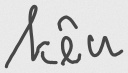


--- Sample 2 ---
Ground Truth: 'ngành'
Prediction:   'nghinh'
CER: 0.4000 ❌


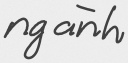


--- Sample 3 ---
Ground Truth: 'điều'
Prediction:   '# 词根'
CER: 1.0000 ❌


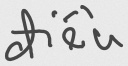


--- Sample 4 ---
Ground Truth: 'nghiêm'
Prediction:   'magnium'
CER: 0.6667 ❌


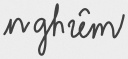


--- Sample 5 ---
Ground Truth: 'biển'
Prediction:   '\[ 6! = 1!^6 \]'
CER: 3.7500 ❌


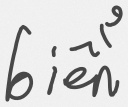


--- Sample 6 ---
Ground Truth: 'làm'
Prediction:   '\[\underline{lem}\]'
CER: 5.6667 ❌


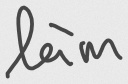


--- Sample 7 ---
Ground Truth: 'có'
Prediction:   'co'
CER: 0.5000 ❌


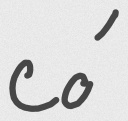


--- Sample 8 ---
Ground Truth: 'trong'
Prediction:   'بوم'
CER: 1.0000 ❌


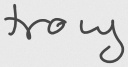


--- Sample 9 ---
Ground Truth: 'thể'
Prediction:   '\[ \text{What is?} \]'
CER: 6.3333 ❌


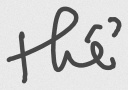


--- Sample 10 ---
Ground Truth: 'lấy'
Prediction:   'lay'
CER: 0.3333 ❌


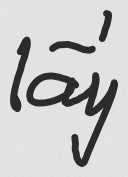

In [10]:
import random
from IPython.display import display

# Show random samples
num_samples = 10
sample_indices = random.sample(range(len(predictions)), min(num_samples, len(predictions)))

print("\n🔍 Sample Predictions:\n")
for i, idx in enumerate(sample_indices, 1):
    print(f"\n--- Sample {i} ---")
    print(f"Ground Truth: '{ground_truths[idx]}'")
    print(f"Prediction:   '{predictions[idx]}'")
    
    # Calculate CER for this sample
    sample_cer = calculate_cer([predictions[idx]], [ground_truths[idx]])
    match = "✅" if predictions[idx] == ground_truths[idx] else "❌"
    print(f"CER: {sample_cer:.4f} {match}")
    
    # Display image
    img_path = test_dataset[idx]['image_path']
    img = Image.open(img_path)
    display(img)

## 10. Detailed Error Analysis

In [11]:
# Calculate per-sample CER
sample_cers = []
exact_matches = 0

for pred, ref in zip(predictions, ground_truths):
    sample_cer = calculate_cer([pred], [ref])
    sample_cers.append(sample_cer)
    if pred == ref:
        exact_matches += 1

# Statistics
import numpy as np

print("\n📊 DETAILED ANALYSIS")
print("="*50)
print(f"\n✓ Exact matches: {exact_matches}/{len(predictions)} ({exact_matches/len(predictions)*100:.2f}%)")
print(f"\n📈 CER Statistics:")
print(f"  - Mean CER: {np.mean(sample_cers):.4f}")
print(f"  - Median CER: {np.median(sample_cers):.4f}")
print(f"  - Min CER: {np.min(sample_cers):.4f}")
print(f"  - Max CER: {np.max(sample_cers):.4f}")
print(f"  - Std Dev: {np.std(sample_cers):.4f}")

# CER distribution
print(f"\n📊 CER Distribution:")
perfect = sum(1 for c in sample_cers if c == 0.0)
low = sum(1 for c in sample_cers if 0.0 < c <= 0.1)
medium = sum(1 for c in sample_cers if 0.1 < c <= 0.3)
high = sum(1 for c in sample_cers if c > 0.3)

print(f"  - Perfect (CER = 0.0): {perfect} ({perfect/len(sample_cers)*100:.2f}%)")
print(f"  - Low (0.0 < CER ≤ 0.1): {low} ({low/len(sample_cers)*100:.2f}%)")
print(f"  - Medium (0.1 < CER ≤ 0.3): {medium} ({medium/len(sample_cers)*100:.2f}%)")
print(f"  - High (CER > 0.3): {high} ({high/len(sample_cers)*100:.2f}%)")


📊 DETAILED ANALYSIS

✓ Exact matches: 85/2881 (2.95%)

📈 CER Statistics:
  - Mean CER: 2.0887
  - Median CER: 1.0000
  - Min CER: 0.0000
  - Max CER: 370.0000
  - Std Dev: 9.2007

📊 CER Distribution:
  - Perfect (CER = 0.0): 85 (2.95%)
  - Low (0.0 < CER ≤ 0.1): 0 (0.00%)
  - Medium (0.1 < CER ≤ 0.3): 144 (5.00%)
  - High (CER > 0.3): 2652 (92.05%)


## 11. Show Worst Predictions

Identify and display samples with highest CER for error analysis.


❌ Top 5 Worst Predictions:


--- Worst #1 (CER: 370.0000) ---
Ground Truth: 'Á'
Prediction:   '{
 "Line": {
  "line": [
   "(-10.0, -1.0) -- (-6.0, -1.0) -- (-2.0, -1.0) -- (2.0, -1.0) -- (6.0, -1.0) -- (8.0, -1.0)",
   "(-7.0, -2.0) -- (-3.0, -2.0) -- (1.0, -2.0) -- (5.0, -2.0) -- (8.0, -2.0)",
   "(0.0, 1.0) -- (0.0, -2.0) -- (0.0, -2.0)",
   "(0.0, 1.0) -- (3.0, 3.64) -- (6.0, 6.28) -- (8.0, 8.0)"
  ],
  "line_type": [
   "-",
   "-",
   "-",
   "-"
  ]
 }
}'


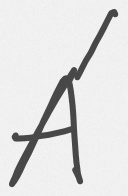


--- Worst #2 (CER: 218.0000) ---
Ground Truth: 'Độ'
Prediction:   '{
 "Line": {
  "line": [
   "(-8.0, 3.0) -- (-4.99, 0.35) -- (-2.99, -1.5)",
   "(-8.0, 3.0) -- (-4.0, 3.0) -- (0.0, 3.0) -- (4.0, 3.0) -- (7.0, 3.0)",
   "(-2.99, -1.5) -- (-1.88, 2.34) -- (-0.77, 6.18) -- (-0.47, 7.24)",
   "(-2.99, -1.5) -- (0.51, 0.42) -- (4.0, 2.35) -- (7.0, 3.83)",
   "(3.99, 3.0) -- (7.0, 3.83)"
  ],
  "line_type": [
   "-",
   "-",
   "-",
   "-",
   "-"
  ],
  "line_endpoint": [
   "C: (3.99, 3.0)"
  ]
 }
}'


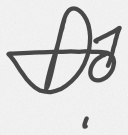


--- Worst #3 (CER: 215.5000) ---
Ground Truth: 'Ấn'
Prediction:   '{
 "Line": {
  "line": [
   "(-5.0, -0.99) -- (-2.5, 2.13) -- (-0.01, 5.25) -- (-0.01, 5.26)",
   "(-5.0, -0.99) -- (-1.0, -0.99) -- (3.0, -0.99) -- (5.0, -0.99)",
   "(-5.0, -0.99) -- (-1.0, -0.99) -- (3.0, -0.99)",
   "(-0.01, 5.26) -- (0.0, 1.26) -- (0.0, -0.99)",
   "(5.0, -0.99) -- (5.0, 3.01) -- (5.0, 5.25)"
  ],
  "line_type": [
   "-",
   "-",
   "-",
   "-",
   "-"
  ],
  "line_endpoint": [
   "N: (5.0, -0.99)"
  ]
 }
}'


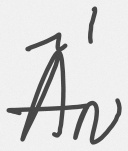


--- Worst #4 (CER: 46.6667) ---
Ground Truth: 'Xây'
Prediction:   'X  
X  
X  
X  
X  
X  
X  
X  
X  
X  
X  
X  
X  
X  
X  
X  
X  
X  
Y  
Y  
Y  
Y  
Y  
Y  
Y  
Y  
Y  
Y  
Y  
Y  
Y  
Y  
Y  
Y  
Y  
Y'


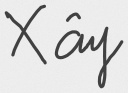


--- Worst #5 (CER: 23.6667) ---
Ground Truth: 'trở'
Prediction:   '?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?'


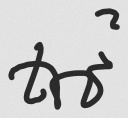

In [12]:
# Find worst predictions
sorted_indices = np.argsort(sample_cers)[::-1]
worst_n = 5

print(f"\n❌ Top {worst_n} Worst Predictions:\n")
for i, idx in enumerate(sorted_indices[:worst_n], 1):
    print(f"\n--- Worst #{i} (CER: {sample_cers[idx]:.4f}) ---")
    print(f"Ground Truth: '{ground_truths[idx]}'")
    print(f"Prediction:   '{predictions[idx]}'")
    
    # Display image
    img_path = test_dataset[idx]['image_path']
    img = Image.open(img_path)
    display(img)

## 12. Save Results

Save evaluation results for later analysis.

In [13]:
import pandas as pd

# Create results dataframe
results_df = pd.DataFrame({
    'image_path': [test_dataset[i]['image_path'] for i in range(len(predictions))],
    'ground_truth': ground_truths,
    'prediction': predictions,
    'cer': sample_cers
})

# Setup save path based on environment
if not IS_KAGGLE:
    RESULTS_PATH = f"/content/drive/MyDrive/evaluation_results_{MODEL_TYPE}.csv"
    print(f"💾 Colab: Saving results to Google Drive...")
else:
    RESULTS_PATH = f"/kaggle/working/evaluation_results_{MODEL_TYPE}.csv"
    print(f"💾 Kaggle: Saving results to working directory...")

# Save results
results_df.to_csv(RESULTS_PATH, index=False, encoding='utf-8')
print(f"✅ Results saved to: {RESULTS_PATH}")

# Display summary
print("\n📋 Results Summary:")
print(results_df.head(10))

# Save summary statistics
summary = {
    'model_type': MODEL_TYPE,
    'overall_cer': overall_cer,
    'total_samples': len(predictions),
    'exact_matches': exact_matches,
    'accuracy': 1 - overall_cer,
    'mean_cer': np.mean(sample_cers),
    'median_cer': np.median(sample_cers),
    'std_cer': np.std(sample_cers)
}

summary_path = RESULTS_PATH.replace('.csv', '_summary.json')
with open(summary_path, 'w', encoding='utf-8') as f:
    json.dump(summary, f, indent=2, ensure_ascii=False)

print(f"✅ Summary saved to: {summary_path}")

💾 Kaggle: Saving results to working directory...
✅ Results saved to: /kaggle/working/evaluation_results_baseline.csv

📋 Results Summary:
                                          image_path ground_truth  \
0  /kaggle/input/uit-hwdb-word/UIT_HWDB_word/test...          Thứ   
1  /kaggle/input/uit-hwdb-word/UIT_HWDB_word/test...       trưởng   
2  /kaggle/input/uit-hwdb-word/UIT_HWDB_word/test...           Bộ   
3  /kaggle/input/uit-hwdb-word/UIT_HWDB_word/test...          Tài   
4  /kaggle/input/uit-hwdb-word/UIT_HWDB_word/test...       nguyên   
5  /kaggle/input/uit-hwdb-word/UIT_HWDB_word/test...          môi   
6  /kaggle/input/uit-hwdb-word/UIT_HWDB_word/test...       trường   
7  /kaggle/input/uit-hwdb-word/UIT_HWDB_word/test...         Đặng   
8  /kaggle/input/uit-hwdb-word/UIT_HWDB_word/test...         Hùng   
9  /kaggle/input/uit-hwdb-word/UIT_HWDB_word/test...           Võ   

                          prediction       cer  
0                                Tha  0.333333  
1  \[

---

## Done! 🎉

You've successfully evaluated the model on Vietnamese handwriting test data.

**Summary:**
- ✅ Selected model type (baseline or finetuned)
- ✅ Loaded model and ran inference
- ✅ Calculated Character Error Rate (CER)
- ✅ Performed error analysis
- ✅ Saved detailed results

**Next steps:**
- Change `MODEL_TYPE` to evaluate the other model
- Compare baseline vs finetuned performance
- Try different inference parameters (base_size, crop_mode)
- Evaluate on full test set